In [21]:
sdss_general_path = "/media/lrikozavr/0402A64D02A64390/Users/lrik/Work/"
sdss_filename_fits = "specObj-dr17.fits"
sdss_filename_origin = f"{sdss_general_path}sdssdr17.csv"
sdss_filename_class_sample = f"{sdss_general_path}SDSS.csv"

In [3]:
import wget
sdssdr17_url = "https://data.sdss.org/sas/dr17/sdss/spectro/redux/specObj-dr17.fits"
wget.download(sdssdr17_url, 'specObj-dr17.fits')

'C:\\Users\\lrik\\Work\\specObj-dr17.fits'

In [3]:
import pandas as pd
import numpy as np
import os

In [31]:
from astropy.io import fits
fits_file = fits.open(sdss_filename_fits)
hdr = fits_file[1].header
#['SURVEY' 'PLATEQUALITY' 'SOURCETYPE' 'PLUG_RA' 'PLUG_DEC' 'CLASS' 'SUBCLASS' 'Z' 'Z_ERR' 'ZWARNING' 'Z_NOQSO' 'Z_ERR_NOQSO' 'ZWARNING_NOQSO' 'CLASS_NOQSO' 'SUBCLASS_NOQSO']
columns = [hdr[14],hdr[19],hdr[50],hdr[80],hdr[81],hdr[82],hdr[83],hdr[84],hdr[85],hdr[103],hdr[135],hdr[136],hdr[137],hdr[138],hdr[139]]
#ax1_count = hdr[3]
ax2_count = hdr[4] #count
data = fits_file[1].data
f = open(sdss_filename_origin,"w")
f.write(','.join(columns) + "\n")
for i in range(int(ax2_count)):
	f.write(f"{str(data[i][0])},{str(data[i][5])},{str(data[i][36])},{str(data[i][66])},{str(data[i][67])},{str(data[i][68])},{str(data[i][69])},{str(data[i][70])},{str(data[i][71])},{str(data[i][89])},{str(data[i][121])},{str(data[i][122])},{str(data[i][123])},{str(data[i][124])},{str(data[i][125])}\n")
f.close()
fits_file.close()

del data, f, fits_file, i, columns, ax2_count #ax1_count

In [28]:
data = pd.read_csv(sdss_filename_origin, header=0, sep=",")

/tmp/ipykernel_53468/3876214978.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sdss_filename_origin, header=0, sep=",")


<h1>PreClassification<h1>

Classification

In [29]:
class_name_column = "class_name"

data.loc[(data["CLASS"] == "QSO") & ((data["SUBCLASS"].str.contains("STAR", na=True)) | (data["SUBCLASS"] == "BROADLINE")), class_name_column] = "qso"
#
data.loc[((data["CLASS"] == "QSO") | (data["CLASS"] == "GALAXY")) & (data["SUBCLASS"].str.contains("AGN", na=False)), class_name_column] = "agn"
#
data.loc[(data["CLASS"] == "GALAXY") & (data["SUBCLASS"].str.contains("STARBURST", na=False)), class_name_column] = "sbg"
#
data.loc[(data["CLASS"] == "GALAXY") & (data["SUBCLASS"].str.contains("STARFORMING", na=False)), class_name_column] = "sfg"
#
data.loc[(data["CLASS"] == "GALAXY") & ((data["SUBCLASS"].str.contains("NaN",na=True) | (data["SUBCLASS"] == "BROADLINE"))), class_name_column] = "gal"
#
data.loc[data["CLASS"] == "STAR", class_name_column] = "star"


In [30]:
data = data.rename(columns={"PLUG_RA": "RA", "PLUG_DEC": "DEC", "Z": "z", "Z_ERR": "z_err"})

Redshift cut off

In [31]:
data = data[(data["ZWARNING"] == 0) & (0.1 > abs(data["z_err"]/data["z"])) & (data["z"] <= 4.0)]

In [32]:
data = data.sort_values(by=["DEC"], ascending=True)
data

SURVEY PLATEQUALITY SOURCETYPE         RA        DEC CLASS SUBCLASS   
1609086  segue1         good  NONLEGACY   7.715366 -19.702714  STAR       F5  \
1609083  segue1         good  NONLEGACY   7.679973 -19.641483  STAR       F5   
1609048  segue1         good  NONLEGACY   8.139904 -19.639879  STAR       G2   
1609043  segue1         good  NONLEGACY   8.163993 -19.615857  STAR       A0   
1609205  segue1         good  NONLEGACY   7.132664 -19.603615  STAR       F9   
...         ...          ...        ...        ...        ...   ...      ...   
1451450  segue1         good  NONLEGACY  98.019854  84.791898  STAR       F5   
1455880  segue1         good  NONLEGACY  97.666877  84.793093  STAR       F2   
1451418  segue1         good  NONLEGACY  92.883648  84.794836  STAR       F9   
1455809  segue1         good  NONLEGACY  94.478598  84.837773  STAR       F9   
1451411  segue1         good  NONLEGACY  95.375494  84.852144  STAR       F5   

                z     z_err  ZWARNING  Z_NOQSO  Z_ERR_NOQSO  ZWARNING_NOQSO   
1609086  0.000248  0.000022         0      0.0          0.0               0  \
1609083 -0.000613  0.000022         0      0.0          0.0               0   
1609048 -0.000164  0.000014         0      0.0          0.0               0   
1609043  0.000249  0.000010         0      0.0          0.0               0   
1609205 -0.000164  0.000009         0      0.0          0.0               0   
...           ...       ...       ...      ...          ...             ...   
1451450 -0.000761  0.000009         0      0.0          0.0               0   
1455880 -0.000391  0.000023         0      0.0          0.0               0   
1451418 -0.000158  0.000009         0      0.0          0.0               0   
1455809 -0.000321  0.000017         0      0.0          0.0               0   
1451411 -0.001215  0.000010         0      0.0          0.0               0   

        CLASS_NOQSO SUBCLASS_NOQSO class_name  
1609086         NaN            NaN       star  
1609083         NaN            NaN       star  
1609048         NaN            NaN       star  
1609043         NaN            NaN       star  
1609205         NaN            NaN       star  
...             ...            ...        ...  
1451450         NaN            NaN       star  
1455880         NaN            NaN       star  
1451418         NaN            NaN       star  
1455809         NaN            NaN       star  
1451411         NaN            NaN       star  

[4254432 rows x 16 columns]

In [33]:
data.to_csv(sdss_filename_class_sample, index=False)

In [34]:
del class_name_column

<h1>MAIN</h1>

In [1]:
import json

class Config():

    def __init__(self,fconfig):
        config = json.load(fconfig)
        self.name_main_sample = config['name_sample']
        self.name_sample = config['name_sample'] + config['additional_name']
        self.general_path = config['general_path']
        self.data_path = config['data_path']
        self.prediction_path = config['prediction_path']
        self.test_path = config['test_path'] ############
        self.flags = config['flags']
        self.hyperparam = config['hyperparam']
        self.features = config['features']
        self.name_class = config['name_class']
        self.name_class_column = config["name_class_column"]
        self.base = config["base"]
        self.picture = config['picture']
        self.statistic = config['statistic']
        #
        self.path_ml_data = f'{self.general_path}/ml/data'
        self.path_ml = f'{self.general_path}/ml'
        self.path_sample = f'{self.general_path}/sample'
        self.path_pic = f'{self.general_path}/ml/picture'
        self.path_stat = f'{self.general_path}/statistic'
        #
        self.path_model = f"{self.path_ml}/model/mod_{self.name_sample}"
        self.path_weight = f"{self.path_ml}/model/weight_{self.name_sample}"
        self.path_eval = f"{self.path_ml}/eval/{self.name_sample}"
        self.path_predict = f"{self.path_ml}/prediction/{self.name_sample}"
        #
        columns = []
        columns_prob = []
        for col in self.name_class:
            columns.append(f"{col}_cls")
            columns_prob.append(f"{col}_cls_prob")
        self.name_class_cls = columns
        self.name_class_prob = columns_prob

<h1>Read config<h1>

In [2]:
fconfig = open('config_agn_sdss.json')
config = Config(fconfig)
fconfig.close()
del fconfig

<h1>Create file system<h1>

In [5]:
def dir(save_path,name):
    dir_name = f"{save_path}/{name}"
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)

if not os.path.isdir(config.general_path):
    os.mkdir(config.general_path)

dir(config.general_path,'sample')
dir(config.general_path,'statistic')
dir(config.general_path,'ml')
dir(config.path_ml,'data')
dir(config.path_ml,'model')
dir(config.path_ml,'eval')
dir(config.path_ml,'prediction')
dir(config.path_ml,'picture')

<h1>Downloading&Cross-match<h1>

In [37]:
from data_download import Download
config_base = dict(name_class=config.name_class,
                   base=config.base,
                   features=config.features["data"],
                   path_sample=config.path_sample)
#print(config_base["features"])
dow = Download(config_spec=config.flags["data_downloading"],config_base=config_base)

In [38]:
dow.diff_class(config.data_path,config.name_class_column)

qso 		 942881.0
agn 		 36172.0
sbg 		 99385.0
sfg 		 287806.0
gal 		 2444919.0
star 		 443269.0


In [39]:
dow.all_class_download(config.path_stat)

del dow

cut to slice start for  /home/lrikozavr/ML_work/agn_sdss/sample/qso_origin.csv
Origin catalog columns:	 ['RA', 'DEC', 'z', 'z_err']
cut to slice finish with  9  slices
total count of lines is  942881
/home/lrikozavr/ML_work/agn_sdss/sample/qso_origin/0_catwise.csv
{'astrometry': ['angDist', 'PQSO', 'PGal', 'PSS'], 'flux': ['nW1', 'FW1pm', 'e_FW1pm', 'nW2', 'FW2pm', 'e_FW2pm', 'o_Gmag', 'FG', 'e_FG', 'o_BPmag', 'FBP', 'e_FBP', 'o_RPmag', 'FRP', 'e_FRP'], 'photometry': ['W1mproPM', 'e_W1mproPM', 'W2mproPM', 'e_W2mproPM', 'Gmag', 'e_Gmag', 'BPmag', 'e_BPmag', 'RPmag', 'e_RPmag']}
[1, 2, 3, 4, 0, 15, 31, 32, 17, 33, 34, 35, 36, 37, 38]

/home/lrikozavr/ML_work/agn_sdss/sample/qso_origin/1_catwise.csv
{'astrometry': ['angDist', 'PQSO', 'PGal', 'PSS'], 'flux': ['nW1', 'FW1pm', 'e_FW1pm', 'nW2', 'FW2pm', 'e_FW2pm', 'o_Gmag', 'FG', 'e_FG', 'o_BPmag', 'FBP', 'e_FBP', 'o_RPmag', 'FRP', 'e_FRP'], 'photometry': ['W1mproPM', 'e_W1mproPM', 'W2mproPM', 'e_W2mproPM', 'Gmag', 'e_Gmag', 'BPmag', 'e_BPma

<h1>["PM","Plx","e_Plx","RUWE","pscol"] saga</h1>

Null value visualisation

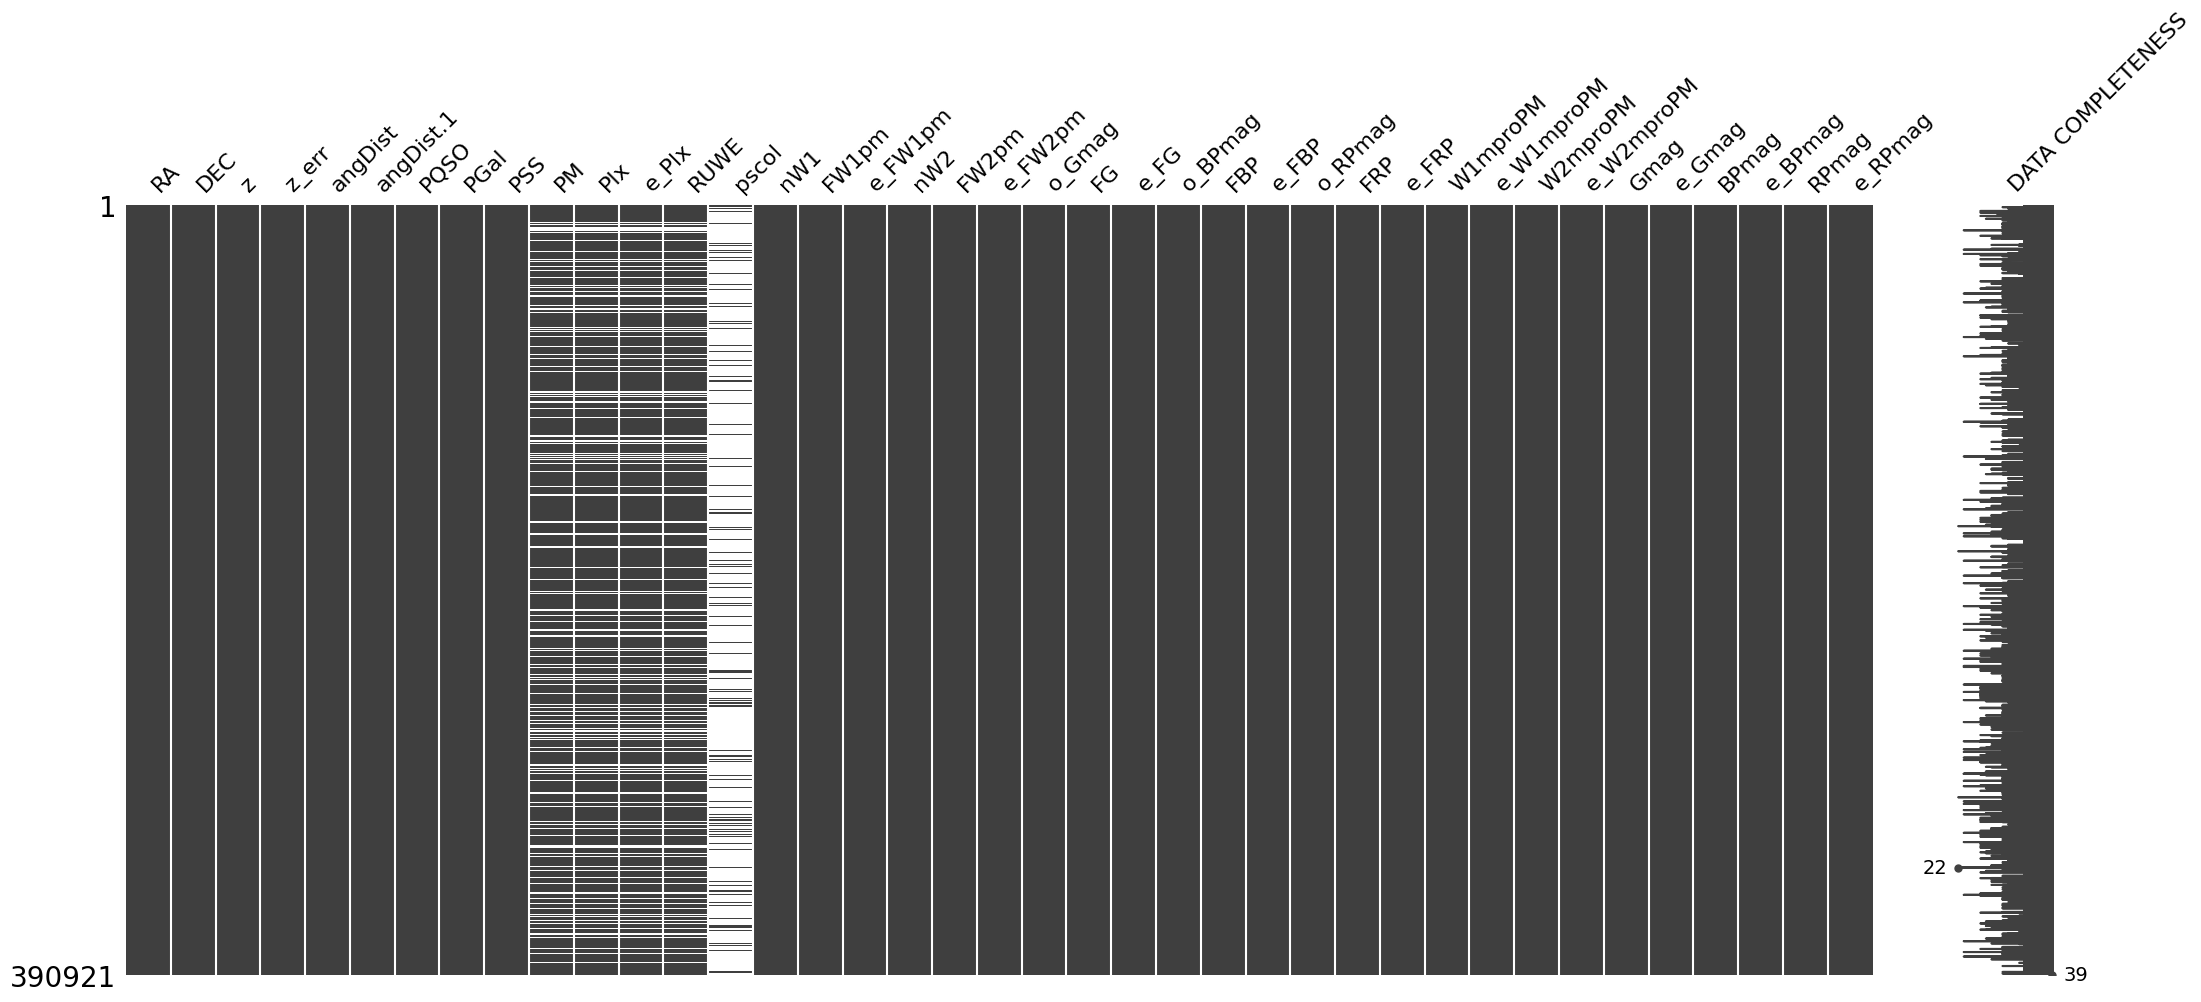

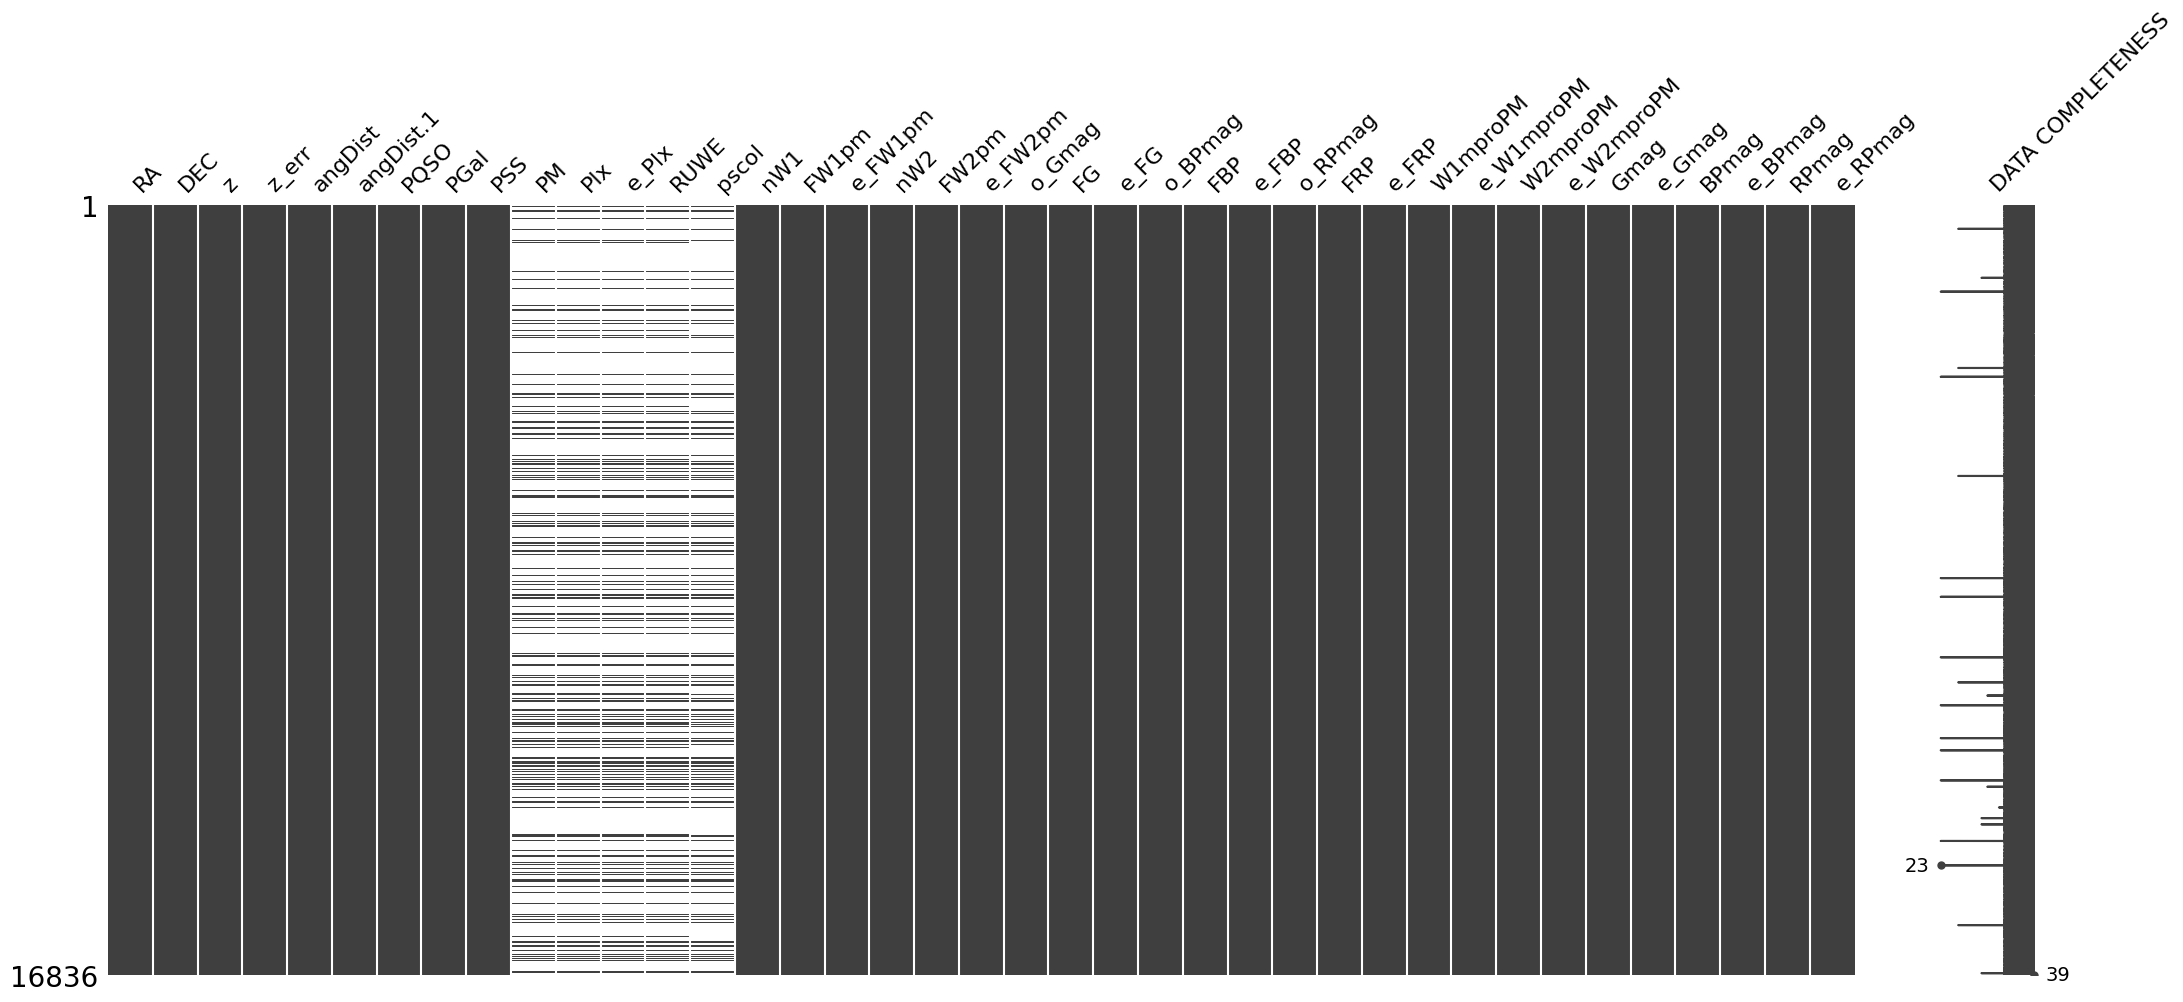

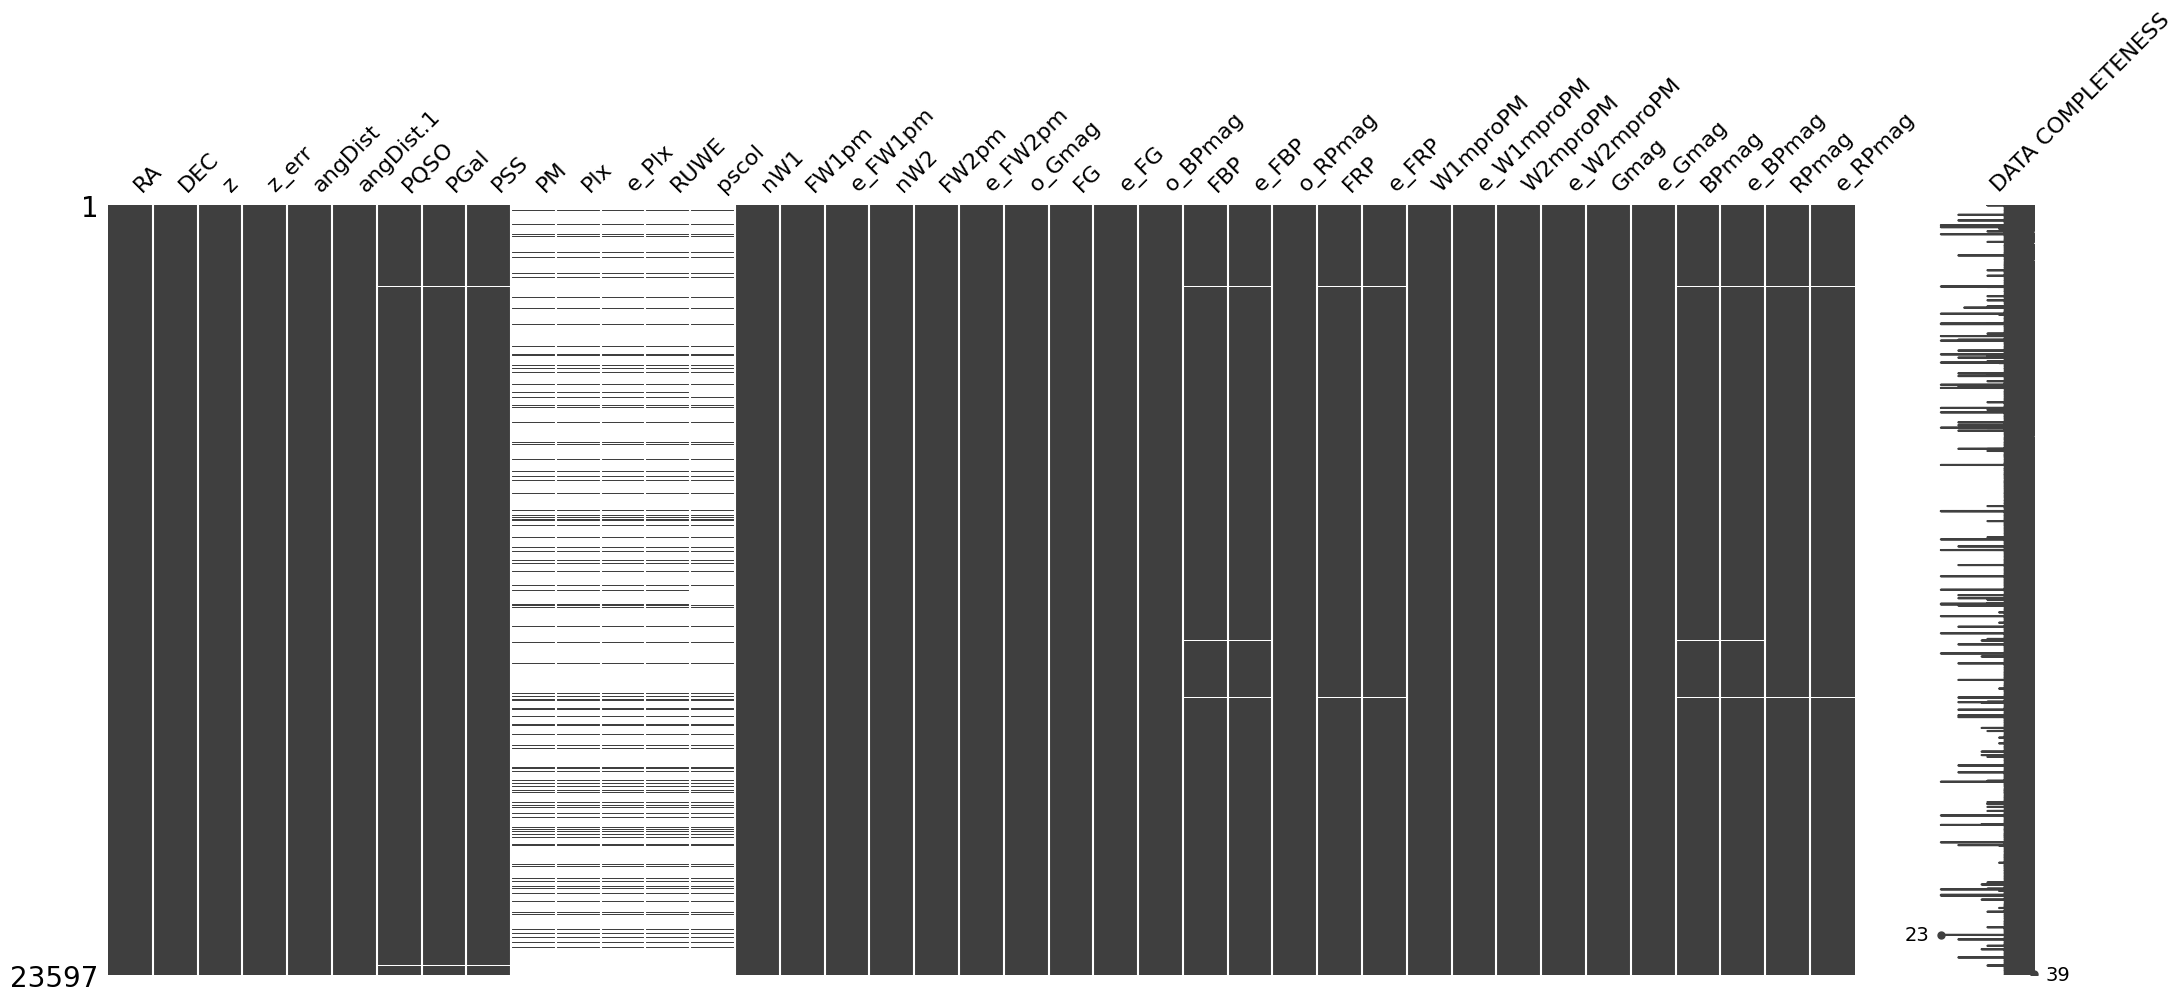

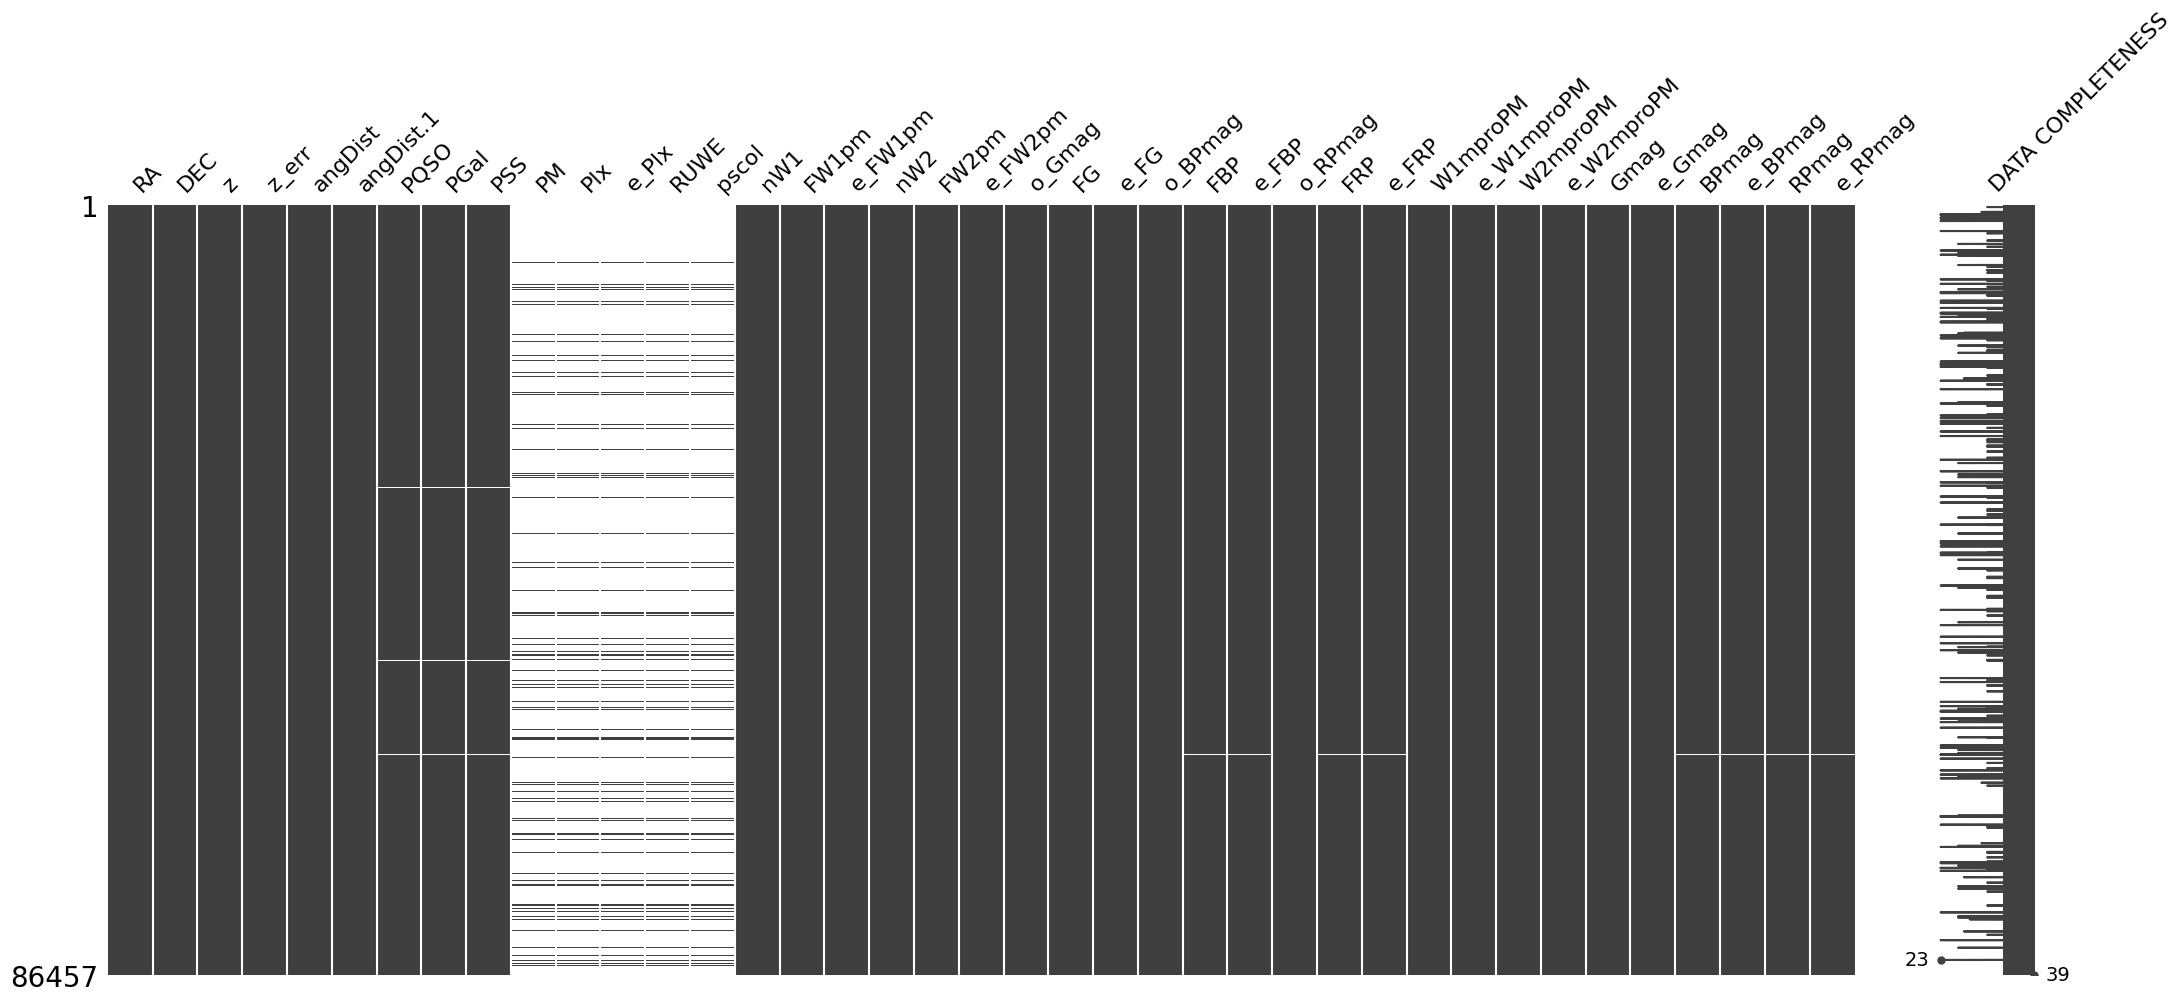

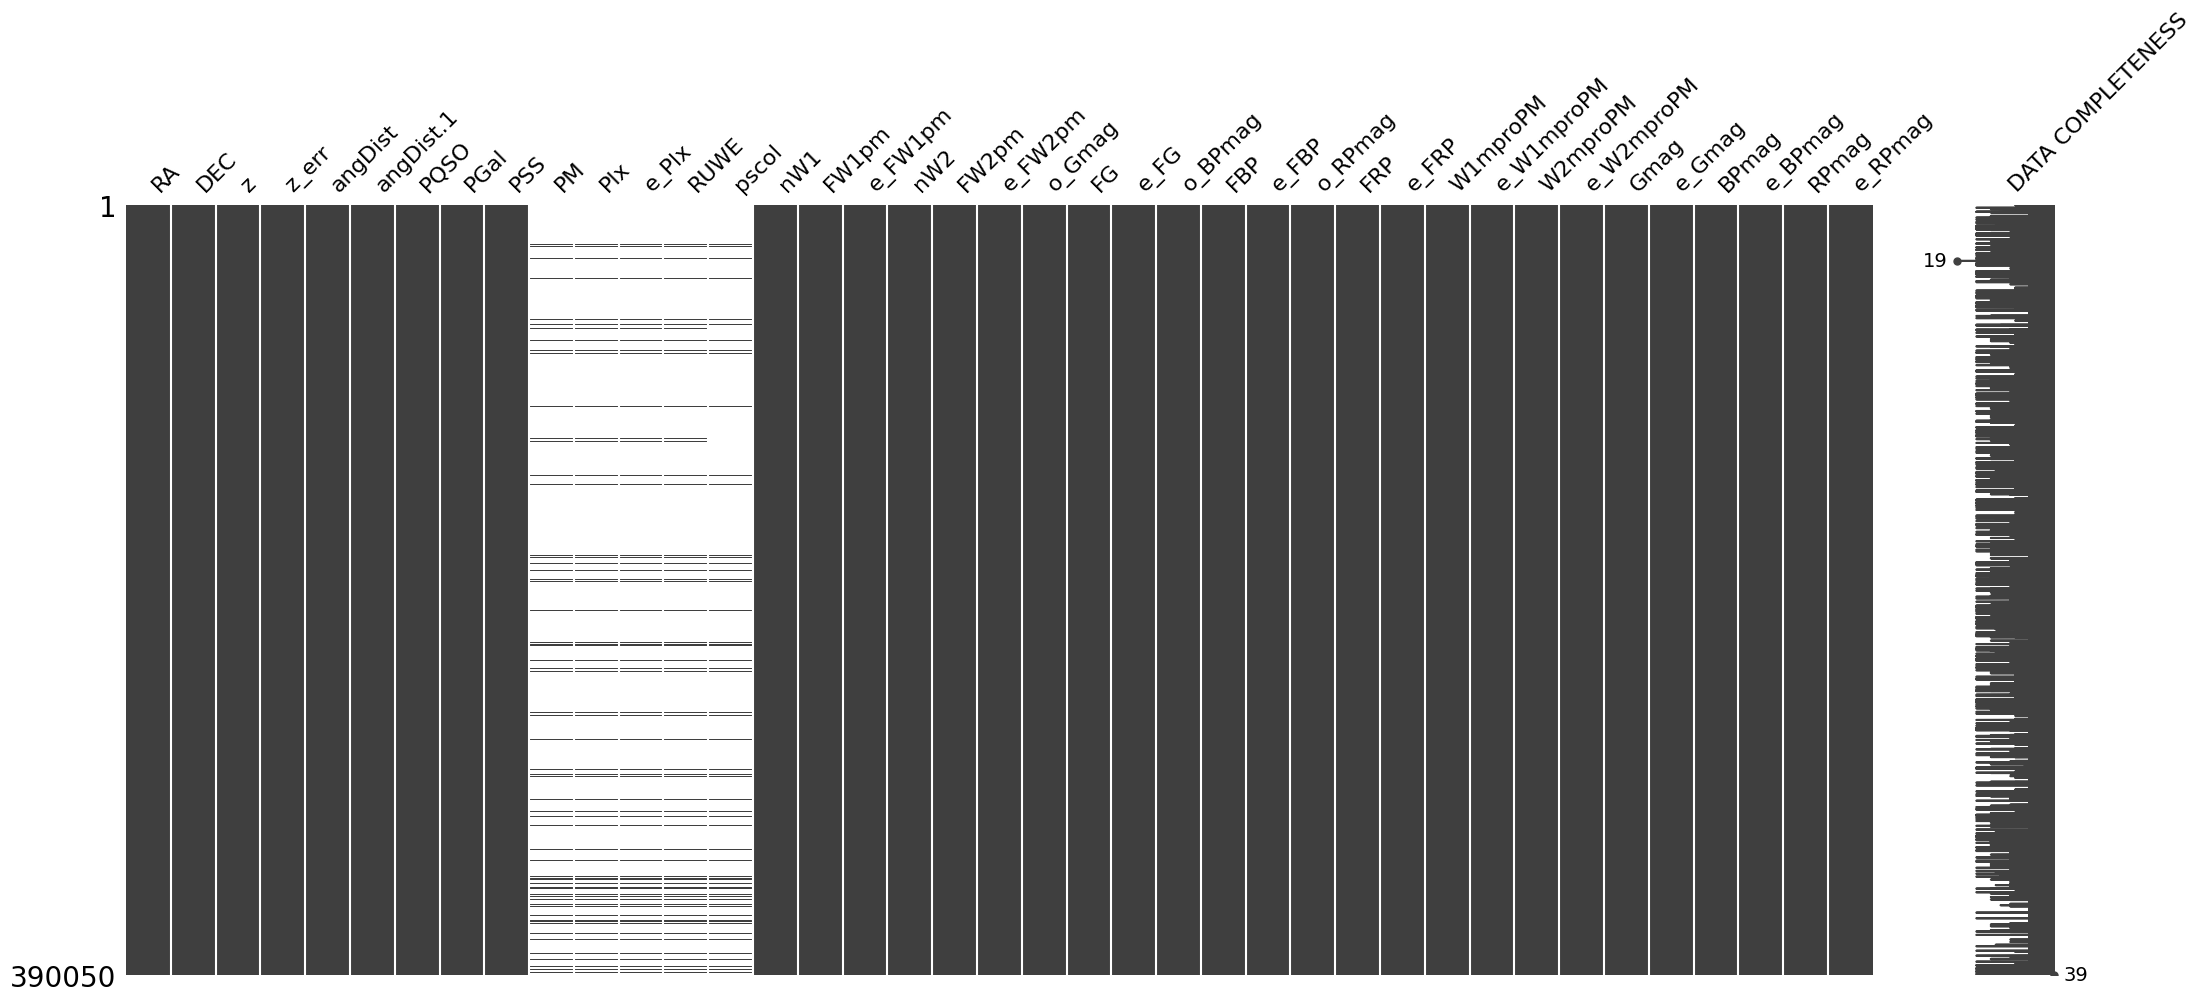

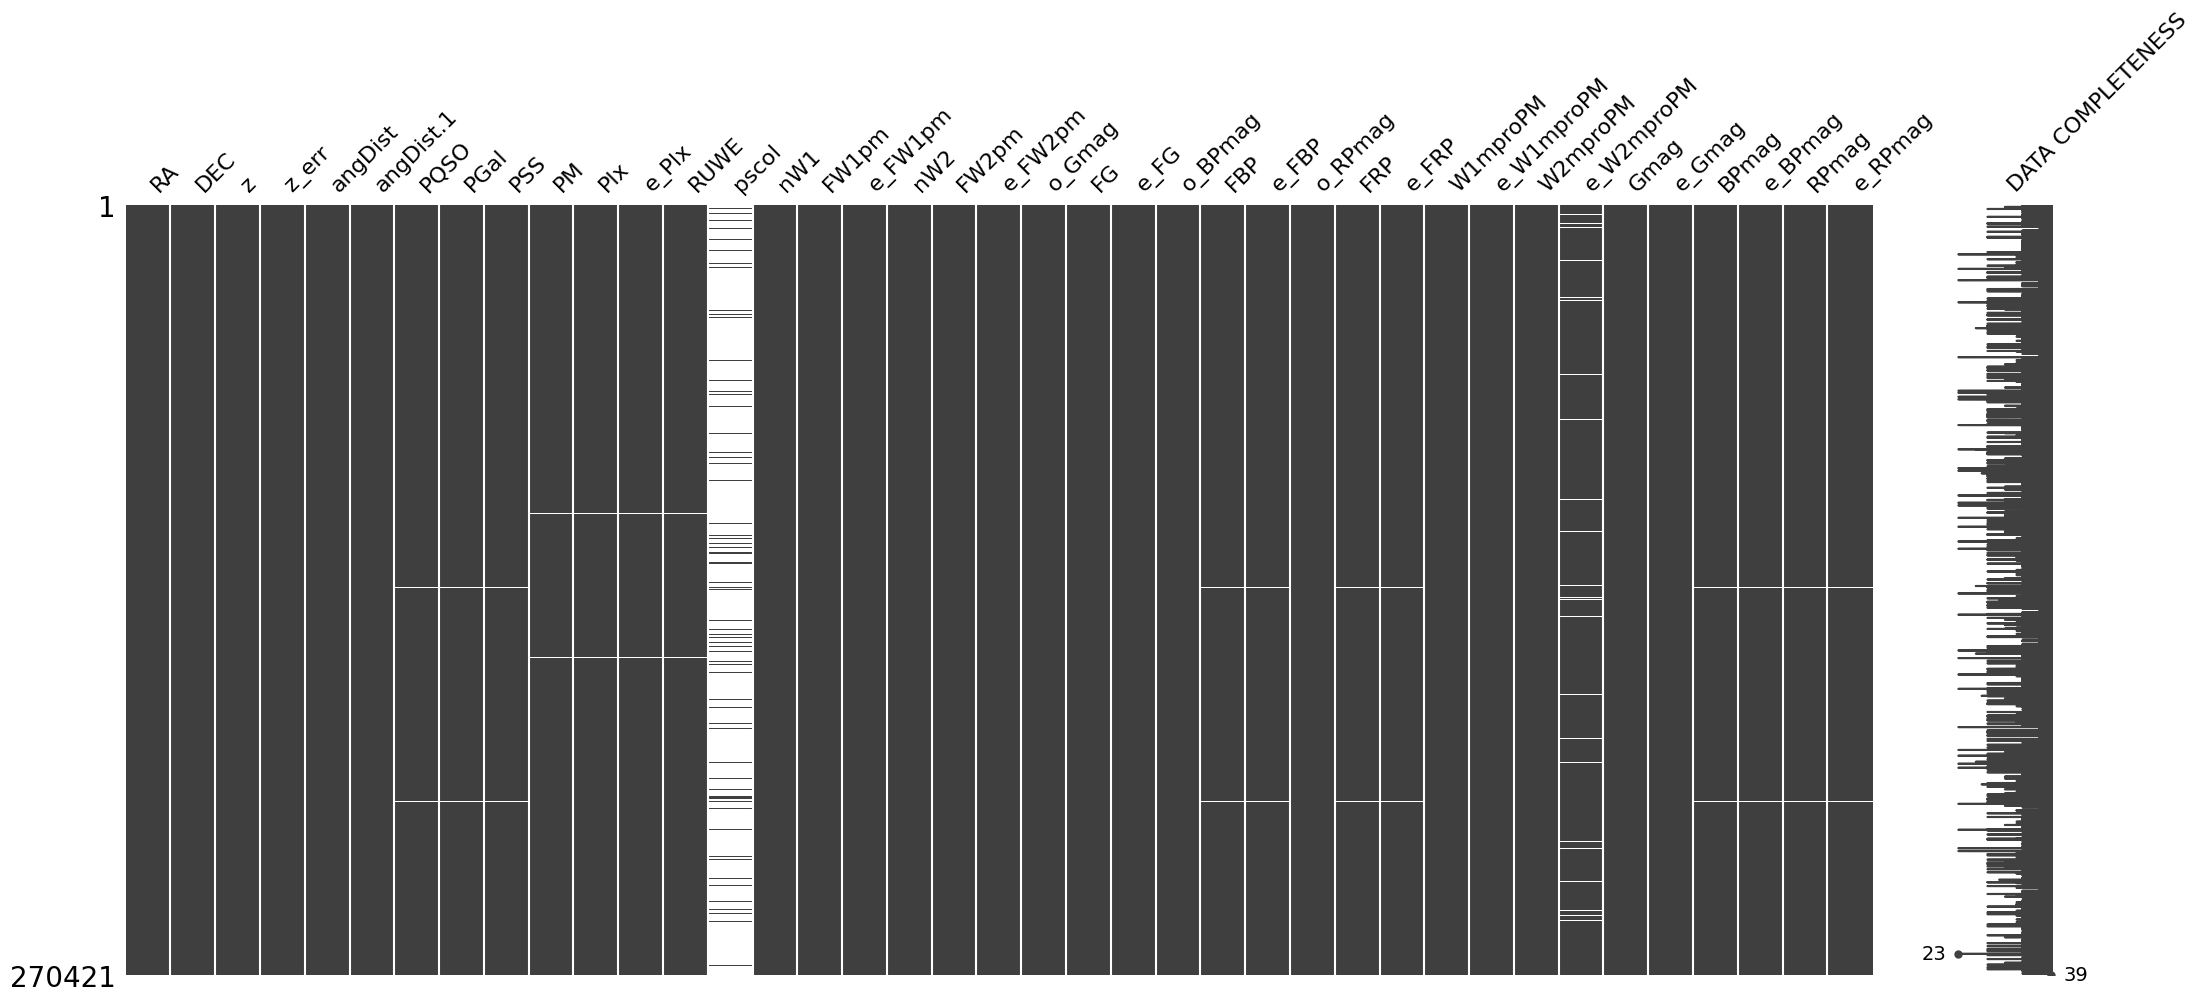

In [38]:
import missingno as msno

for name in config.name_class:
    data = pd.read_csv(f'/home/lrikozavr/ML_work/agn_sdss/sample/{name}.csv', header = 0, sep = ',')
    msno.matrix(data)

del data

Drop ["PM","Plx","e_Plx","RUWE","pscol"], because a lot of null value

In [47]:
for name in config.name_class:
    data = pd.read_csv(f'{config.path_sample}/{name}.csv', header = 0, sep = ',')
    data = data.drop(["PM","Plx","e_Plx","RUWE","pscol"], axis=1)
    data.to_csv(f'{config.path_sample}/{name}.csv', index=False)

Drop <b>NaN</b> data from sample and not zero <b>nW1&nW2</b>

In [40]:
columns = ['RA', 'DEC', 'z', 'z_err', 'angDist', 'angDist.1', 'PQSO', 'PGal', 'PSS', 
       'nW1', 'FW1pm', 'e_FW1pm', 'nW2', 'FW2pm', 'e_FW2pm',
       'o_Gmag', 'FG', 'e_FG', 'o_BPmag', 'FBP', 'e_FBP', 'o_RPmag', 'FRP', 'e_FRP', 
       'W1mproPM', 'e_W1mproPM', 'W2mproPM', 'e_W2mproPM',
       'Gmag', 'e_Gmag', 'BPmag', 'e_BPmag', 'RPmag', 'e_RPmag']

drop_stat = pd.DataFrame(np.zeros((len(config.name_class),len(columns))),columns=columns, index=config.name_class)

snr_stat = pd.DataFrame(np.zeros((len(config.name_class),2)),columns=["nW1","nW2"], index=config.name_class)

for name in config.name_class:
    data = pd.read_csv(f'{config.path_sample}/{name}.csv', header = 0, sep = ',')
    
    for cl in ["PQSO","PGal","PSS"]:
        data.loc[data[cl].fillna(9999.0) == 9999.0,cl] = 9999.0

    for name_ in data.columns.values:
        drop_stat.loc[name,name_] = data[data[name_].fillna("NaN") == "NaN"].shape[0]

    for nw in ["nW1","nW2"]:
        snr_stat.loc[name,nw] = data[data[nw] == 0].shape[0]
    
    data = data[(data["nW1"] > 0) & (data["nW2"] > 0)]

    data.dropna().reset_index(drop=True).to_csv(f'{config.path_sample}/{name}.csv', index=False)

del data

In [41]:
drop_stat

RA  DEC    z  z_err  angDist  angDist.1  PQSO  PGal  PSS  nW1  ...   
qso   0.0  0.0  0.0    0.0      0.0        0.0   0.0   0.0  0.0  0.0  ...  \
agn   0.0  0.0  0.0    0.0      0.0        0.0   0.0   0.0  0.0  0.0  ...   
sbg   0.0  0.0  0.0    0.0      0.0        0.0   0.0   0.0  0.0  0.0  ...   
sfg   0.0  0.0  0.0    0.0      0.0        0.0   0.0   0.0  0.0  0.0  ...   
gal   0.0  0.0  0.0    0.0      0.0        0.0   0.0   0.0  0.0  0.0  ...   
star  0.0  0.0  0.0    0.0      0.0        0.0   0.0   0.0  0.0  0.0  ...   

      W1mproPM  e_W1mproPM  W2mproPM  e_W2mproPM   Gmag  e_Gmag  BPmag   
qso        0.0         6.0       0.0       101.0   60.0    60.0  466.0  \
agn        0.0         0.0       0.0         1.0    1.0     1.0   19.0   
sbg        0.0         0.0       0.0        15.0    4.0     4.0   74.0   
sfg        0.0         0.0       0.0         1.0   11.0    11.0  124.0   
gal        0.0         0.0       0.0        73.0  101.0   101.0  761.0   
star       0.0         3.0       0.0     10135.0    7.0     7.0  386.0   

      e_BPmag  RPmag  e_RPmag  
qso     466.0  412.0    412.0  
agn      19.0   16.0     16.0  
sbg      74.0   70.0     70.0  
sfg     124.0  109.0    109.0  
gal     761.0  487.0    487.0  
star    386.0  380.0    380.0  

[6 rows x 34 columns]

In [42]:
snr_stat

nW1      nW2
qso   178.0   1027.0
agn     7.0      8.0
sbg    28.0    128.0
sfg    40.0     49.0
gal   264.0    412.0
star  250.0  25762.0

<h1>Preprocessing pipeline<h1>

In [14]:
data = pd.read_csv(f'{config.path_ml_data}/{config.name_main_sample}_all.csv', header = 0, sep = ',')
data

RA        DEC         z     z_err   angDist  angDist.1   
0      196.489330  20.950693  0.000142  0.000008  0.152763   0.145158  \
1       36.638439   5.191581 -0.000123  0.000011  0.137806   0.144821   
2      237.351300  48.382178  0.072008  0.000008  0.175280   0.112525   
3       14.550918  -0.291682  0.284606  0.000011  0.044743   0.142238   
4      229.768260  21.847622  0.068384  0.000011  0.105086   0.214437   
...           ...        ...       ...       ...       ...        ...   
96505  192.683350  59.784562 -0.000513  0.000012  0.145743   0.210138   
96506  242.736910   4.036614  0.063739  0.000009  0.025573   0.135328   
96507  137.044030  38.819690  0.000125  0.000007  0.111381   0.595354   
96508  176.240900  30.439956  0.031277  0.000008  0.182336   0.447904   
96509  203.905170   3.014184  0.114305  0.000004  0.047711   0.611005   

           PQSO      PGal       PSS  nW1  ...     mcd_d     mcd_g  fuzzy_err   
0      0.000000  0.000000  0.999934   12  ...  0.580173  0.259972   0.706535  \
1      0.000000  0.000000  0.999954   13  ...  1.026963  0.319823   0.643860   
2      0.064078  0.935922  0.000000   13  ...  1.480401  0.404861   0.655277   
3      0.001752  0.000631  0.996260   13  ...  1.837756  0.429245   0.645076   
4      0.000000  1.000000  0.000000   13  ...  1.428526  0.374926   0.692601   
...         ...       ...       ...  ...  ...       ...       ...        ...   
96505  0.000000  0.000000  0.999793   12  ...  1.421451  0.340330   0.648938   
96506  0.000000  1.000000  0.000000   12  ...  1.820384  0.429494   0.682867   
96507  0.000000  0.000000  0.999981   12  ...  2.009478  0.302558   0.685271   
96508  0.000000  0.039645  0.960355   12  ...  1.649126  0.423947   0.628732   
96509  0.000000  1.000000  0.000000   13  ...  1.484146  0.409479   0.628622   

       fuzzy_dist  qso_cls  agn_cls  sbg_cls  sfg_cls  gal_cls  star_cls  
0        0.920630        0        0        0        0        0         1  
1        0.850127        0        0        0        0        0         1  
2        0.774744        0        0        1        0        0         0  
3        0.613941        0        0        1        0        0         0  
4        0.835787        0        1        0        0        0         0  
...           ...      ...      ...      ...      ...      ...       ...  
96505    0.920982        0        0        0        0        0         1  
96506    0.827495        0        0        1        0        0         0  
96507    0.779207        0        0        0        0        0         1  
96508    0.677525        0        0        1        0        0         0  
96509    0.875100        0        0        0        1        0         0  

[96510 rows x 70 columns]

In [5]:
data = pd.read_csv(f'/media/lrikozavr/0402A64D02A64390/Users/lrik/Work/SDSS.csv', header = 0, sep = ',')
data

/tmp/ipykernel_21694/763466918.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'/media/lrikozavr/0402A64D02A64390/Users/lrik/Work/SDSS.csv', header = 0, sep = ',')


SURVEY PLATEQUALITY SOURCETYPE         RA        DEC CLASS SUBCLASS   
0        segue1         good  NONLEGACY   7.715366 -19.702714  STAR       F5  \
1        segue1         good  NONLEGACY   7.487451 -19.669474  STAR       F9   
2        segue1         good  NONLEGACY   7.259242 -19.656897  STAR       M0   
3        segue1         good  NONLEGACY   7.679973 -19.641483  STAR       F5   
4        segue1         good  NONLEGACY   8.139904 -19.639879  STAR       G2   
...         ...          ...        ...        ...        ...   ...      ...   
4854986  segue1         good  NONLEGACY  98.019854  84.791898  STAR       F5   
4854987  segue1         good  NONLEGACY  97.666877  84.793093  STAR       F2   
4854988  segue1         good  NONLEGACY  92.883648  84.794836  STAR       F9   
4854989  segue1         good  NONLEGACY  94.478598  84.837773  STAR       F9   
4854990  segue1         good  NONLEGACY  95.375494  84.852144  STAR       F5   

                z     z_err  ZWARNING  Z_NOQSO  Z_ERR_NOQSO  ZWARNING_NOQSO   
0        0.000248  0.000022         0      0.0          0.0               0  \
1        0.000093  0.000010         0      0.0          0.0               0   
2        0.000038  0.000008         0      0.0          0.0               0   
3       -0.000613  0.000022         0      0.0          0.0               0   
4       -0.000164  0.000014         0      0.0          0.0               0   
...           ...       ...       ...      ...          ...             ...   
4854986 -0.000761  0.000009         0      0.0          0.0               0   
4854987 -0.000391  0.000023         0      0.0          0.0               0   
4854988 -0.000158  0.000009         0      0.0          0.0               0   
4854989 -0.000321  0.000017         0      0.0          0.0               0   
4854990 -0.001215  0.000010         0      0.0          0.0               0   

        CLASS_NOQSO SUBCLASS_NOQSO class_name  
0               NaN            NaN       star  
1               NaN            NaN       star  
2               NaN            NaN       star  
3               NaN            NaN       star  
4               NaN            NaN       star  
...             ...            ...        ...  
4854986         NaN            NaN       star  
4854987         NaN            NaN       star  
4854988         NaN            NaN       star  
4854989         NaN            NaN       star  
4854990         NaN            NaN       star  

[4854991 rows x 16 columns]

In [6]:
one_hot_layer = lambda x: np.array([1 if x==class_name else 0 for i, class_name in enumerate(config.name_class)])
data = pd.concat([data,pd.DataFrame(np.array(np.resize(np.concatenate(data.loc[:,"class_name"].apply(one_hot_layer).values,axis=0),(4854991,6))),columns=config.name_class_cls)],axis = 1)

data

SURVEY PLATEQUALITY SOURCETYPE         RA        DEC CLASS SUBCLASS   
0        segue1         good  NONLEGACY   7.715366 -19.702714  STAR       F5  \
1        segue1         good  NONLEGACY   7.487451 -19.669474  STAR       F9   
2        segue1         good  NONLEGACY   7.259242 -19.656897  STAR       M0   
3        segue1         good  NONLEGACY   7.679973 -19.641483  STAR       F5   
4        segue1         good  NONLEGACY   8.139904 -19.639879  STAR       G2   
...         ...          ...        ...        ...        ...   ...      ...   
4854986  segue1         good  NONLEGACY  98.019854  84.791898  STAR       F5   
4854987  segue1         good  NONLEGACY  97.666877  84.793093  STAR       F2   
4854988  segue1         good  NONLEGACY  92.883648  84.794836  STAR       F9   
4854989  segue1         good  NONLEGACY  94.478598  84.837773  STAR       F9   
4854990  segue1         good  NONLEGACY  95.375494  84.852144  STAR       F5   

                z     z_err  ZWARNING  ...  ZWARNING_NOQSO  CLASS_NOQSO   
0        0.000248  0.000022         0  ...               0          NaN  \
1        0.000093  0.000010         0  ...               0          NaN   
2        0.000038  0.000008         0  ...               0          NaN   
3       -0.000613  0.000022         0  ...               0          NaN   
4       -0.000164  0.000014         0  ...               0          NaN   
...           ...       ...       ...  ...             ...          ...   
4854986 -0.000761  0.000009         0  ...               0          NaN   
4854987 -0.000391  0.000023         0  ...               0          NaN   
4854988 -0.000158  0.000009         0  ...               0          NaN   
4854989 -0.000321  0.000017         0  ...               0          NaN   
4854990 -0.001215  0.000010         0  ...               0          NaN   

         SUBCLASS_NOQSO class_name qso_cls agn_cls  sbg_cls  sfg_cls  gal_cls   
0                   NaN       star       0       0        0        0        0  \
1                   NaN       star       0       0        0        0        0   
2                   NaN       star       0       0        0        0        0   
3                   NaN       star       0       0        0        0        0   
4                   NaN       star       0       0        0        0        0   
...                 ...        ...     ...     ...      ...      ...      ...   
4854986             NaN       star       0       0        0        0        0   
4854987             NaN       star       0       0        0        0        0   
4854988             NaN       star       0       0        0        0        0   
4854989             NaN       star       0       0        0        0        0   
4854990             NaN       star       0       0        0        0        0   

         star_cls  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
4854986         1  
4854987         1  
4854988         1  
4854989         1  
4854990         1  

[4854991 rows x 22 columns]

In [25]:
data_temp = data[0.1 <= abs(data["z_err"]/data["z"])]

In [26]:
data_temp

SURVEY PLATEQUALITY SOURCETYPE         RA        DEC CLASS SUBCLASS   
1        segue1         good  NONLEGACY   7.487451 -19.669474  STAR       F9  \
2        segue1         good  NONLEGACY   7.259242 -19.656897  STAR       M0   
5        segue1         good  NONLEGACY   7.754850 -19.633693  STAR       F9   
6        segue1         good  NONLEGACY   8.247421 -19.625737  STAR       K1   
8        segue1         good  NONLEGACY   7.365562 -19.614238  STAR       F9   
...         ...          ...        ...        ...        ...   ...      ...   
4854966  segue1         good  NONLEGACY  87.383295  84.662072  STAR       A0   
4854967  segue1         good  NONLEGACY  91.447261  84.669439  STAR       A0   
4854972  segue1         good  NONLEGACY  88.017529  84.703149  STAR       F5   
4854974  segue1         good  NONLEGACY  95.203985  84.718747  STAR       K1   
4854977  segue1         good  NONLEGACY  90.744513  84.734021  STAR       F9   

                z     z_err  ZWARNING  ...  ZWARNING_NOQSO  CLASS_NOQSO   
1        0.000093  0.000010         0  ...               0          NaN  \
2        0.000038  0.000008         0  ...               0          NaN   
5       -0.000053  0.000010         0  ...               0          NaN   
6        0.000030  0.000007         0  ...               0          NaN   
8       -0.000071  0.000008         0  ...               0          NaN   
...           ...       ...       ...  ...             ...          ...   
4854966 -0.000247  0.000091         0  ...               0          NaN   
4854967 -0.000260  0.000060         0  ...               0          NaN   
4854972 -0.000037  0.000009         0  ...               0          NaN   
4854974 -0.000014  0.000008         0  ...               0          NaN   
4854977 -0.000225  0.000028         0  ...               0          NaN   

         SUBCLASS_NOQSO class_name qso_cls agn_cls  sbg_cls  sfg_cls  gal_cls   
1                   NaN       star       0       0        0        0        0  \
2                   NaN       star       0       0        0        0        0   
5                   NaN       star       0       0        0        0        0   
6                   NaN       star       0       0        0        0        0   
8                   NaN       star       0       0        0        0        0   
...                 ...        ...     ...     ...      ...      ...      ...   
4854966             NaN       star       0       0        0        0        0   
4854967             NaN       star       0       0        0        0        0   
4854972             NaN       star       0       0        0        0        0   
4854974             NaN       star       0       0        0        0        0   
4854977             NaN       star       0       0        0        0        0   

         star_cls  
1               1  
2               1  
5               1  
6               1  
8               1  
...           ...  
4854966         1  
4854967         1  
4854972         1  
4854974         1  
4854977         1  

[593728 rows x 22 columns]

In [28]:
def count(data,col):
    print(col)
    for i in data[col].unique():
        print("\t",i,"\t\t",data[data[col] == i].shape[0])

count(data_temp,"PLATEQUALITY")
count(data_temp,"CLASS")
#count(data,"SUBCLASS")
count(data_temp,"CLASS_NOQSO")
count(data_temp,"agn_cls")


PLATEQUALITY
	 good 		 530602
	 bad 		 16429
	 marginal 		 46697
CLASS
	 STAR 		 579360
	 QSO 		 11831
	 GALAXY 		 2537
CLASS_NOQSO
	 nan 		 0
	 STAR 		 283978
	 GALAXY 		 8806
agn_cls
	 0 		 593722
	 1 		 6


In [18]:
from matplotlib import pyplot as plt
%matplotlib inline
def Histlog(ax,x,mag,label, bins=50, **kwargs):
    ax.set_xlabel(mag,fontsize=40)
    ax.set_ylabel("count",fontsize=40)
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    ax.set_yscale('log')
    #ax.set_title(name,fontsize = 50)
    ax.hist(x,bins=bins, label=label,**kwargs)

def Hist(ax,x,mag,label, bins=50, **kwargs):
    ax.set_xlabel(mag,fontsize=40)
    ax.set_ylabel("count",fontsize=40)
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    #ax.set_title(name,fontsize = 50)
    ax.hist(x,bins=bins, label=label,**kwargs)

bins_ = lambda data, binwidth: np.arange(min(data), max(data) + binwidth, step=binwidth)

In [33]:
config.name_class

['qso', 'agn', 'sfg', 'sbg', 'gal', 'star']

In [29]:
columns = "z_err"
def diff(data):
    mass_data_class = []
    count = np.zeros(len(config.name_class))
    for i, name_class in enumerate(config.name_class):
        if(name_class == "qso"):
            count[i] = data[((data[f"{name_class}_cls"] == 1)) & (data["z"] <= 4.0)].loc[:,[columns]].shape[0]
        #elif(not name_class == "star"):
        else:
            count[i] = data[(data[f"{name_class}_cls"] == 1)].loc[:,[columns]].shape[0]
    print(count)
    for i, name_class in enumerate(config.name_class):
        if(name_class == "qso"):
            mass_data_class.append(data[((data[f"{name_class}_cls"] == 1)) & (data["z"] <= 4.0)].loc[:,[columns]])
        #elif(not name_class == "star"):
        else:
            mass_data_class.append(data[(data[f"{name_class}_cls"] == 1)].loc[:,[columns]])
    return mass_data_class

mass_data_class = diff(data_temp)    

[1.1387e+04 6.0000e+00 8.0000e+00 9.0000e+00 2.5140e+03 5.7936e+05]


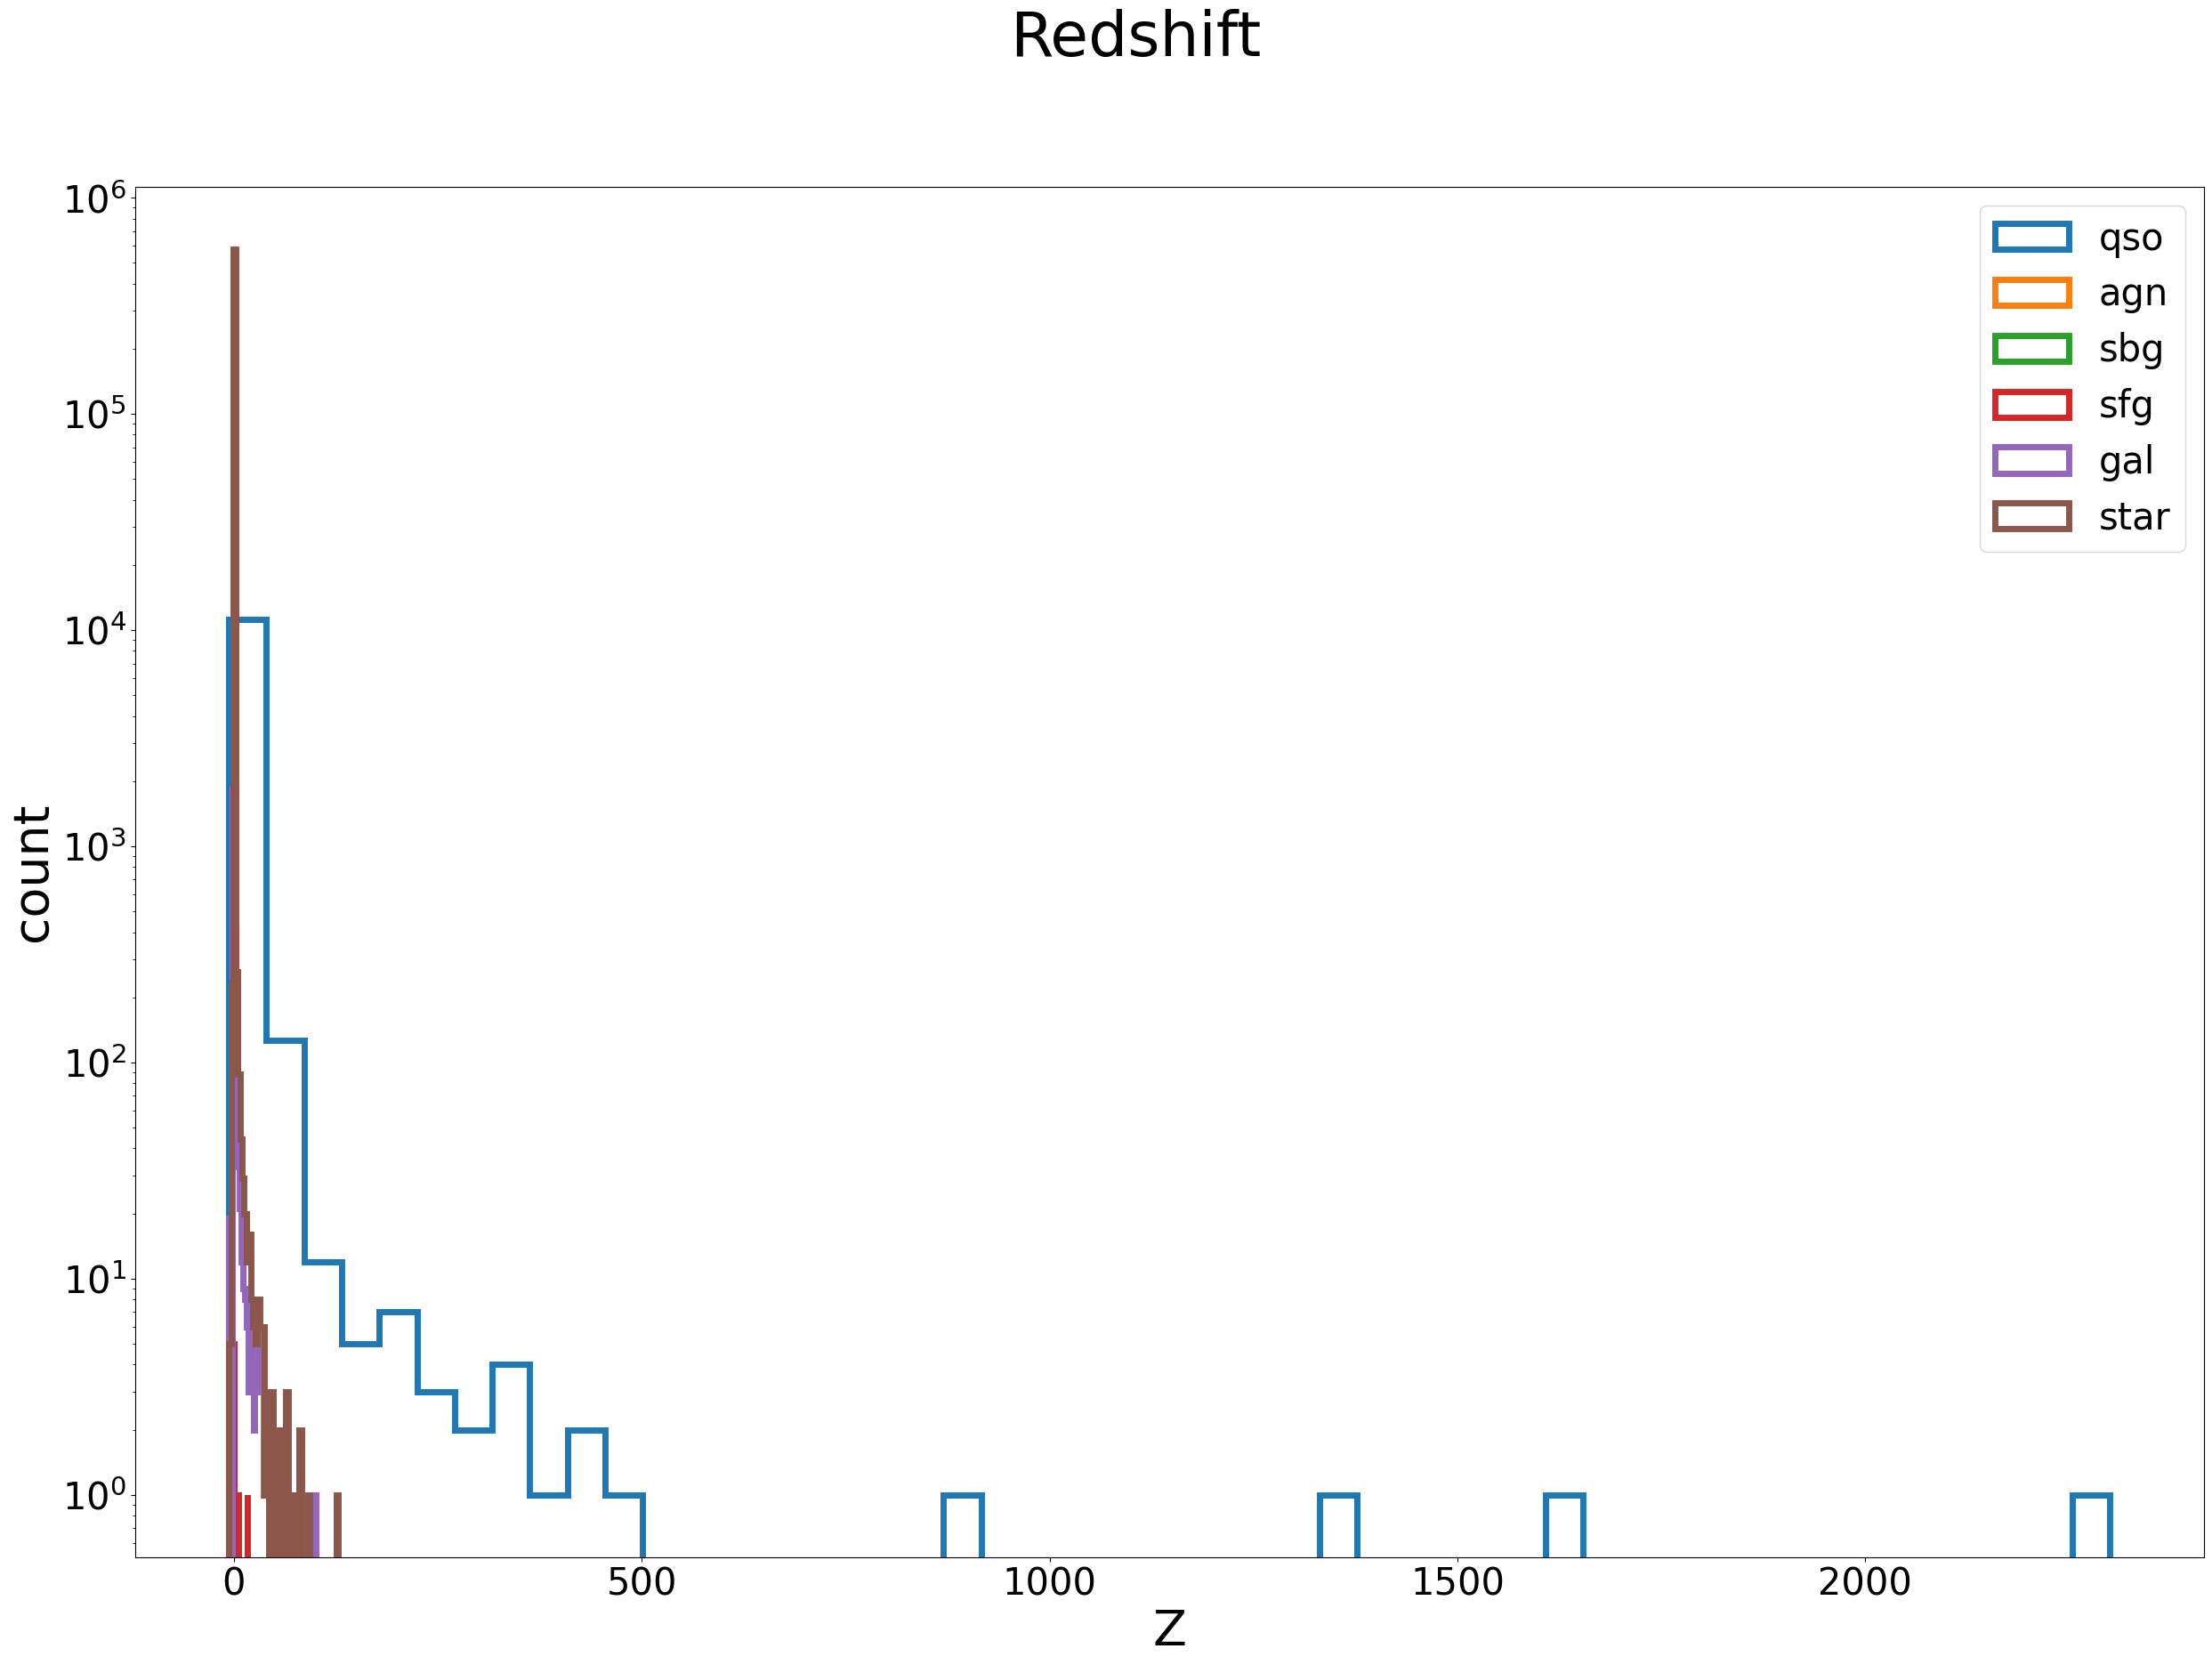

In [30]:

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
fig.suptitle("Redshift", fontsize=50)       
for i, name_class in enumerate(config.name_class):
    #if(not name_class == "star"):
    Histlog(ax,mass_data_class[i],'Z',name_class, histtype='step', fill=config.picture["hist"]["fill"], lw=5)
ax.legend(prop={'size': 30})
fig.set_size_inches(30,20)
#fig.savefig(f"{config.path_pic}/hist/{config.name_sample}_{class_name}_{col}_hist.png")
#fig.show()
plt.show()
#plt.close(fig)

<h1>Processing pipline</h1>

In [23]:
from data_process import data_preparation

data = data_preparation(config.path_ml_data,config.path_sample,config.name_class,config)

data have equal count of classes
qso count:	---	 358452
agn count:	---	 16056
sbg count:	---	 22557
sfg count:	---	 84026
gal count:	---	 376588
star count:	---	 232680
final sample:	---	 96336


In [16]:
data

RA        DEC         z     z_err   angDist  angDist.1   
0        342.072980 -10.263098  0.291488  0.000037  0.061041   0.054708  \
1        120.772000  39.375715  0.097506  0.000033  0.083181   0.111181   
2        130.621210  29.119503  1.542105  0.000269  0.023932   0.118827   
3        352.133480  21.939907  0.891643  0.000158  0.080560   0.091395   
4        174.474670  39.366068  0.124110  0.000019  0.047297   0.167029   
...             ...        ...       ...       ...       ...        ...   
1090354   37.167707   5.110048 -0.000142  0.000013  0.060224   0.899454   
1090355  252.129770  50.487641  1.831717  0.000975  0.070433   0.554785   
1090356  336.704660   0.821658  0.000443  0.000021  0.036997   0.530239   
1090357  225.413520  45.057668  0.801866  0.000104  0.037479   0.053272   
1090358   46.274446   6.111855 -0.000135  0.000010  0.161116   0.153040   

             PQSO      PGal       PSS  nW1  ...     mcd_d     mcd_g   
0        1.000000  0.000000  0.000000   12  ...  0.848174  0.265822  \
1        0.000000  1.000000  0.000000   11  ...  1.018508  0.309778   
2        0.999029  0.000006  0.000966   11  ...  2.992444  0.181902   
3        0.982813  0.000000  0.017187   13  ...  0.873197  0.272256   
4        0.000000  1.000000  0.000000   12  ...  2.179881  0.375662   
...           ...       ...       ...  ...  ...       ...       ...   
1090354  0.000000  0.000000  0.999980   13  ...  4.994312  0.010230   
1090355  0.999846  0.000000  0.000154   12  ...  1.063536  0.319500   
1090356  0.000000  0.000000  0.999989   12  ...  1.634111  0.287541   
1090357  1.000000  0.000000  0.000000   13  ...  0.835429  0.262536   
1090358  0.000000  0.000000  0.999994   13  ...  1.294101  0.288760   

         fuzzy_err  fuzzy_dist  qso_cls  agn_cls  sbg_cls  sfg_cls  gal_cls   
0         0.704851    0.811092        1        0        0        0        0  \
1         0.671669    0.895549        0        0        0        0        1   
2         0.685830    0.574906        1        0        0        0        0   
3         0.652850    0.925785        1        0        0        0        0   
4         0.699718    0.637164        0        0        0        0        1   
...            ...         ...      ...      ...      ...      ...      ...   
1090354   0.608975    0.603099        0        0        0        0        0   
1090355   0.644863    0.937322        1        0        0        0        0   
1090356   0.612366    0.972164        0        0        0        0        0   
1090357   0.684426    0.933404        1        0        0        0        0   
1090358   0.652226    0.940341        0        0        0        0        0   

         star_cls  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
1090354         1  
1090355         0  
1090356         1  
1090357         0  
1090358         1  

[1090359 rows x 70 columns]

<h1>PIPELINE</h1>

In [4]:
data = pd.read_csv(f'{config.path_sample}/qso.csv', header = 0, sep = ',')
data

RA        DEC         z     z_err   angDist  angDist.1   
0       166.53116 -17.520444  2.546282  0.000149  0.063532   0.069244  \
1       166.95578 -17.279537  2.706933  0.000162  0.037483   0.526276   
2         8.29727 -17.178208  2.906453  0.000079  0.047789   0.054932   
3       168.08451 -16.924625  2.807152  0.000094  0.082540   0.157929   
4       167.30094 -16.592488  2.311591  0.000203  0.141427   0.157660   
...           ...        ...       ...       ...       ...        ...   
387427  183.49273  67.869849  2.347018  0.000507  0.268947   0.245011   
387428  188.67065  67.870509  0.274328  0.000031  0.074282   0.120631   
387429  181.60952  67.874351  1.209410  0.000530  0.018842   0.125109   
387430  150.91964  67.875852  0.654613  0.000132  0.087496   0.039498   
387431  179.29461  67.878838  0.904611  0.000177  0.204578   0.227457   

            PQSO      PGal       PSS  nW1  ...  W1mproPM  e_W1mproPM   
0       0.999891  0.000000  0.000109   12  ...    14.433       0.016  \
1       0.376463  0.000000  0.623525   10  ...    17.344       0.071   
2       0.999996  0.000000  0.000004   13  ...    14.294       0.016   
3       1.000000  0.000000  0.000000   12  ...    15.575       0.022   
4       1.000000  0.000000  0.000000   12  ...    16.319       0.032   
...          ...       ...       ...  ...  ...       ...         ...   
387427  0.007657  0.000240  0.991072   12  ...    17.164       0.047   
387428  0.946483  0.053517  0.000000   12  ...    13.638       0.012   
387429  1.000000  0.000000  0.000000   12  ...    15.846       0.021   
387430  1.000000  0.000000  0.000000   11  ...    14.095       0.013   
387431  0.999994  0.000005  0.000001   12  ...    15.235       0.016   

        W2mproPM  e_W2mproPM       Gmag    e_Gmag      BPmag   e_BPmag   
0         12.828       0.010  17.481936  0.003047  17.743029  0.009197  \
1         16.607       0.124  20.259129  0.006588  20.425865  0.102585   
2         13.511       0.013  17.765369  0.003616  17.982643  0.015037   
3         14.692       0.025  18.956263  0.003671  19.161470  0.032866   
4         15.187       0.034  19.561516  0.007019  19.819702  0.061305   
...          ...         ...        ...       ...        ...       ...   
387427    16.028       0.049  20.842554  0.017973  20.894686  0.172916   
387428    12.735       0.009  18.656752  0.006298  18.323277  0.025215   
387429    14.471       0.015  19.470741  0.006899  19.595501  0.059338   
387430    12.977       0.009  18.324120  0.005217  18.388796  0.021689   
387431    14.177       0.013  19.884027  0.006913  20.240728  0.082877   

            RPmag   e_RPmag  
0       17.036100  0.010138  
1       19.970352  0.105972  
2       17.429415  0.015400  
3       18.661314  0.031291  
4       19.068604  0.055442  
...           ...       ...  
387427  20.200535  0.209909  
387428  17.542183  0.017575  
387429  19.218256  0.048722  
387430  17.924681  0.022136  
387431  19.368732  0.060396  

[387432 rows x 34 columns]

<h2>Deredded</h2>

In [5]:
from data_process import deredded

data_deredded = deredded(data,config)
data_deredded

['mags']
DEREDDED PROCESS
Input: 387432 | Output: 387300


RA        DEC         z     z_err   angDist  angDist.1   
0       166.53116 -17.520444  2.546282  0.000149  0.063532   0.069244  \
1       166.95578 -17.279537  2.706933  0.000162  0.037483   0.526276   
2         8.29727 -17.178208  2.906453  0.000079  0.047789   0.054932   
3       168.08451 -16.924625  2.807152  0.000094  0.082540   0.157929   
4       167.30094 -16.592488  2.311591  0.000203  0.141427   0.157660   
...           ...        ...       ...       ...       ...        ...   
387427  183.49273  67.869849  2.347018  0.000507  0.268947   0.245011   
387428  188.67065  67.870509  0.274328  0.000031  0.074282   0.120631   
387429  181.60952  67.874351  1.209410  0.000530  0.018842   0.125109   
387430  150.91964  67.875852  0.654613  0.000132  0.087496   0.039498   
387431  179.29461  67.878838  0.904611  0.000177  0.204578   0.227457   

            PQSO      PGal       PSS  nW1  ...  e_W1mproPM   W2mproPM   
0       0.999891  0.000000  0.000109   12  ...       0.016  12.821646  \
1       0.376463  0.000000  0.623525   10  ...       0.071  16.600179   
2       0.999996  0.000000  0.000004   13  ...       0.016  13.508201   
3       1.000000  0.000000  0.000000   12  ...       0.022  14.680604   
4       1.000000  0.000000  0.000000   12  ...       0.032  15.177342   
...          ...       ...       ...  ...  ...         ...        ...   
387427  0.007657  0.000240  0.991072   12  ...       0.047  16.024961   
387428  0.946483  0.053517  0.000000   12  ...       0.012  12.733135   
387429  1.000000  0.000000  0.000000   12  ...       0.021  14.468940   
387430  1.000000  0.000000  0.000000   11  ...       0.013  12.967437   
387431  0.999994  0.000005  0.000001   12  ...       0.016  14.175006   

        e_W2mproPM       Gmag    e_Gmag      BPmag   e_BPmag      RPmag   
0            0.010  17.373094  0.003047  17.604997  0.009197  16.956126  \
1            0.124  20.142283  0.006588  20.277682  0.102585  19.884497   
2            0.013  17.717413  0.003616  17.921826  0.015037  17.394179   
3            0.025  18.761048  0.003671  18.913900  0.032866  18.517875   
4            0.034  19.396063  0.007019  19.609876  0.061305  18.947034   
...            ...        ...       ...        ...       ...        ...   
387427       0.049  20.790503  0.017973  20.828675  0.172916  20.162289   
387428       0.009  18.624803  0.006298  18.282760  0.025215  17.518708   
387429       0.015  19.435444  0.006899  19.550738  0.059338  19.192321   
387430       0.009  18.160310  0.005217  18.181054  0.021689  17.804318   
387431       0.013  19.849865  0.006913  20.197405  0.082877  19.343631   

         e_RPmag    E(B-V)  
0       0.010138  0.046041  
1       0.105972  0.049427  
2       0.015400  0.020286  
3       0.031291  0.082578  
4       0.055442  0.069989  
...          ...       ...  
387427  0.209909  0.022018  
387428  0.017575  0.013515  
387429  0.048722  0.014931  
387430  0.022136  0.069294  
387431  0.060396  0.014451  

[387300 rows x 35 columns]

<b>E(B-V)</b> column values in <b><i>"cut": false</i></b> case

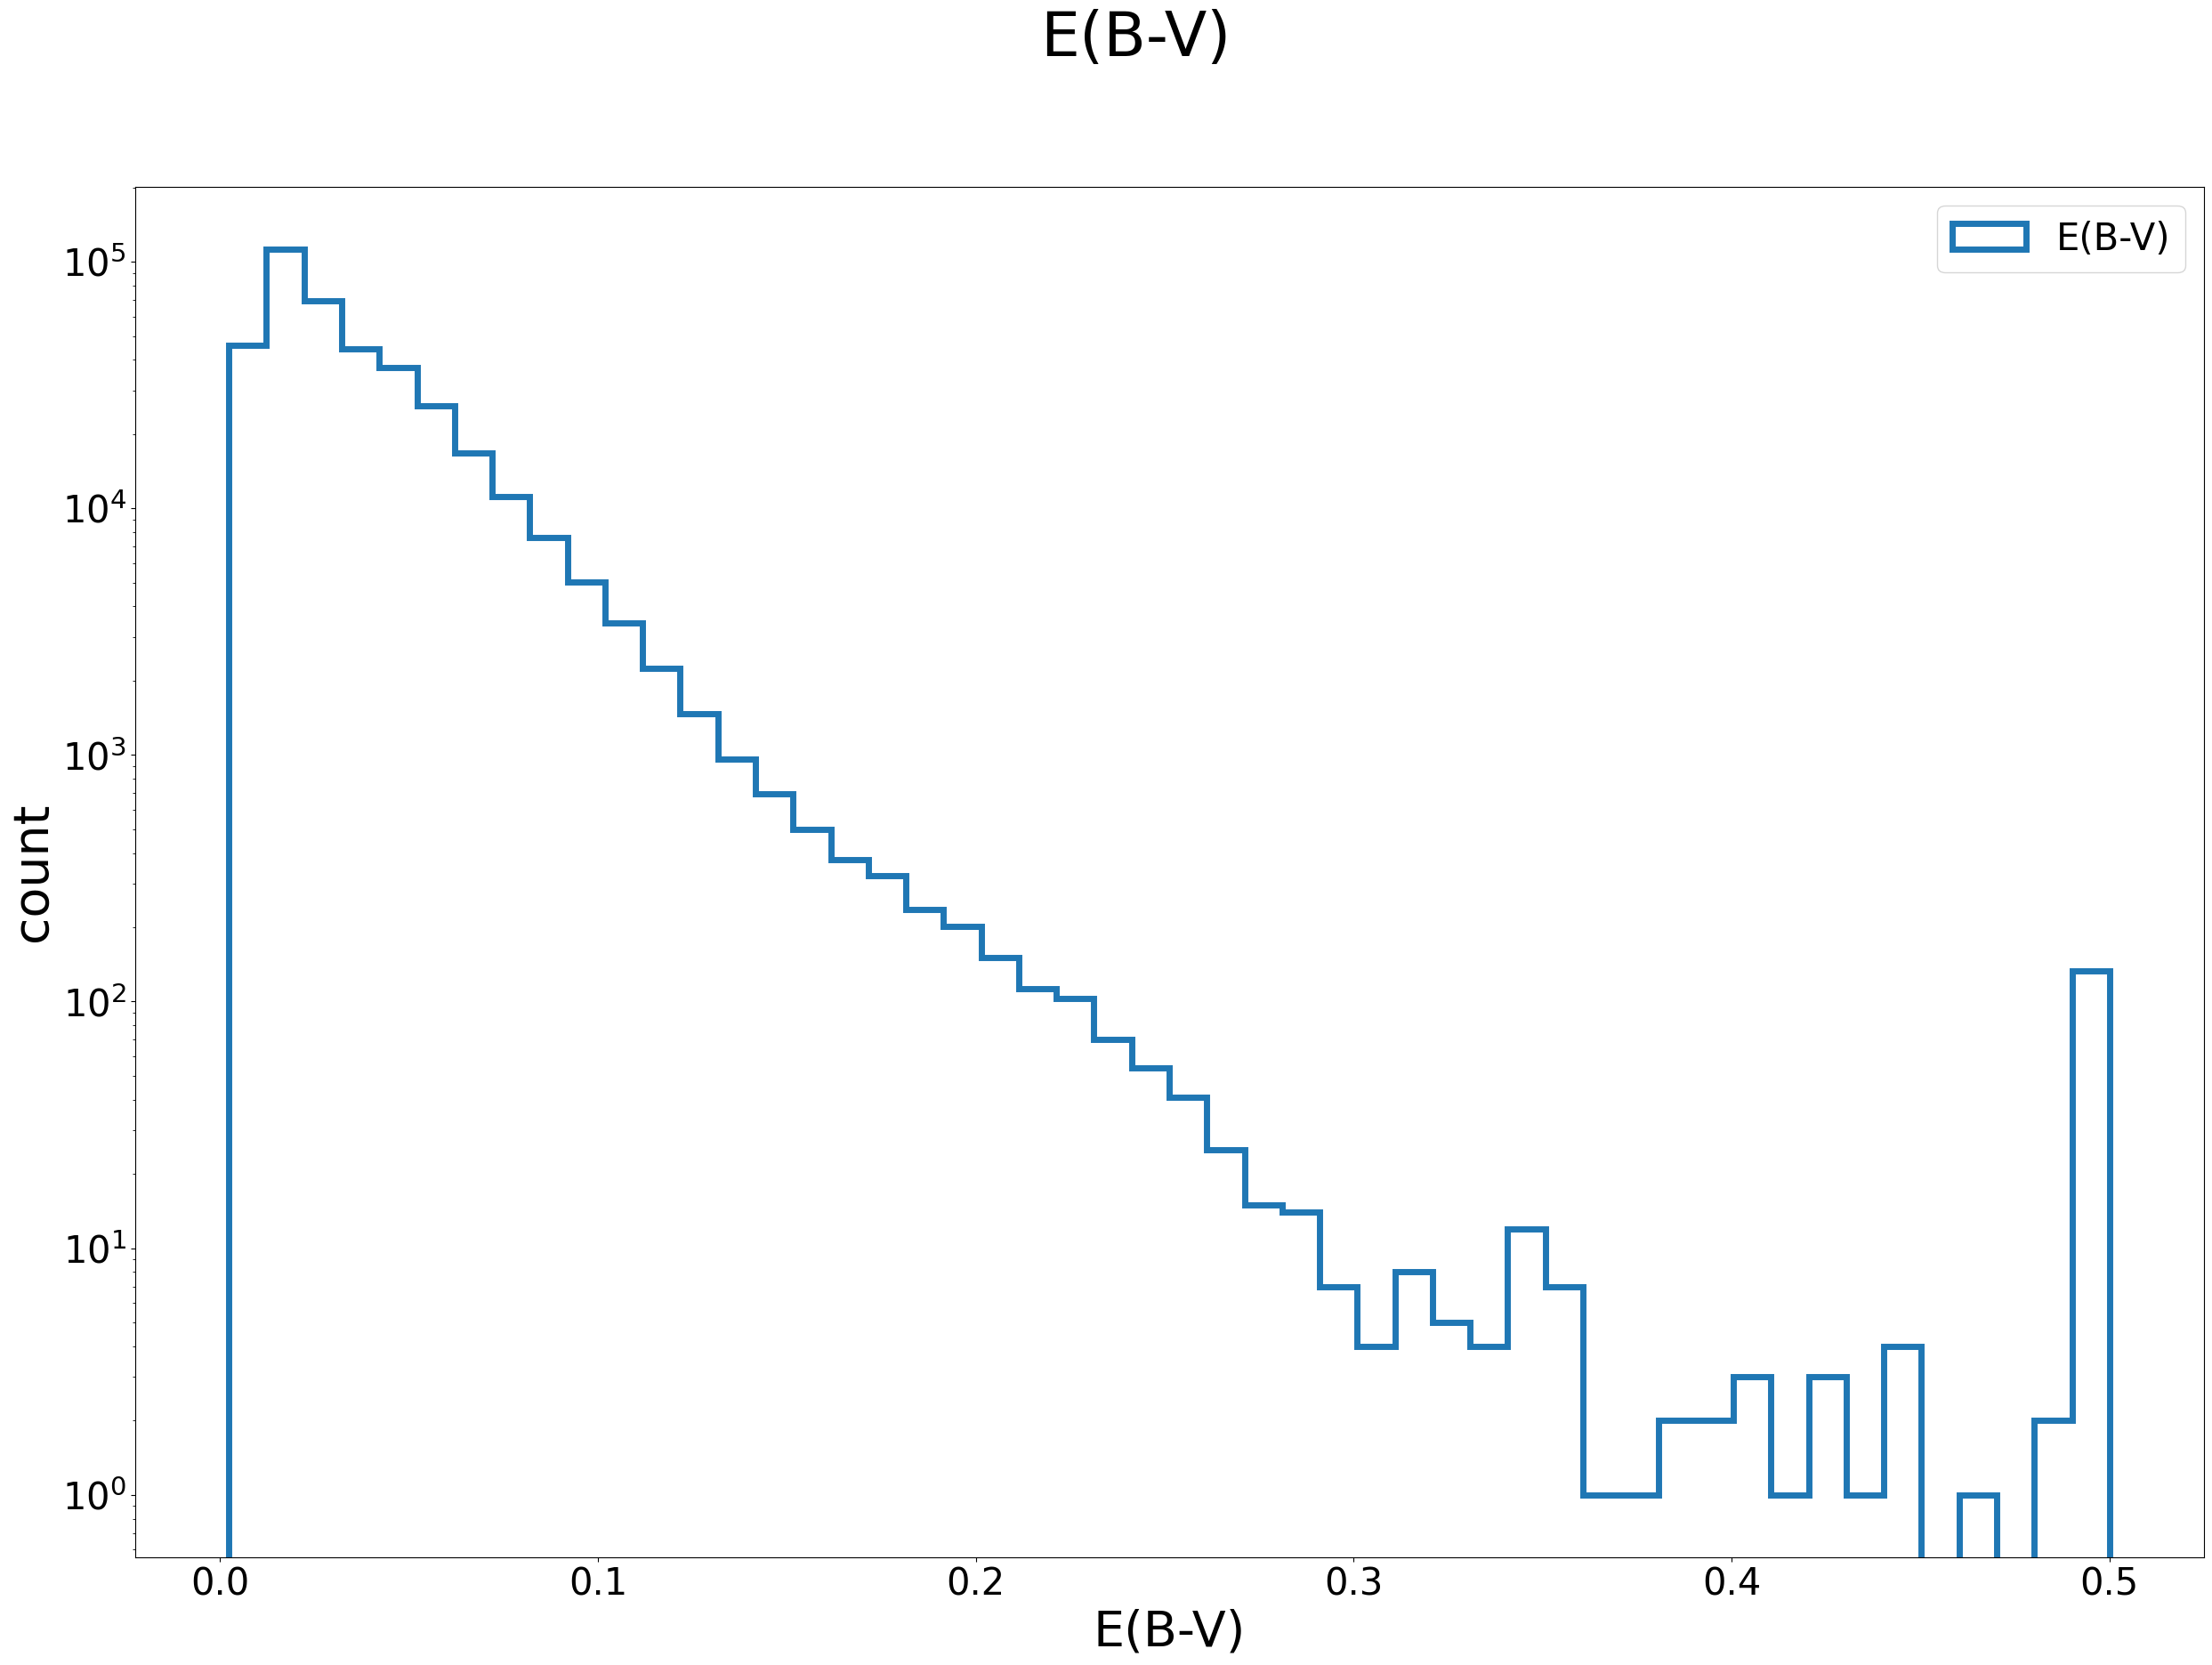

In [8]:

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
fig.suptitle("E(B-V)", fontsize=50)       
#for i, name_class in enumerate(config.name_class):
    #if(not name_class == "star"):
Histlog(ax,data_deredded["E(B-V)"],'E(B-V)',"E(B-V)", histtype='step', fill=config.picture["hist"]["fill"], lw=5)
ax.legend(prop={'size': 30})
fig.set_size_inches(30,20)
#fig.savefig(f"{config.path_pic}/hist/{config.name_sample}_{class_name}_{col}_hist.png")
#fig.show()
plt.show()
#plt.close(fig)

<h2>Range cut</h2>

In [8]:

def range_cut(data):
    features = get_features(["mags"],config)
    range_cut_pd = pd.DataFrame(columns=["qso"],index=features)
    for i in range(len(config.features["data"]["photometry"]) // 2):
        range_cut_pd.loc[features[i], "qso"] = data.shape[0]-data[(data[config.features["data"]["photometry"][i*2]] > config.features["range"]["photometry"][i][0]) & (data[config.features["data"]["photometry"][i*2]] < config.features["range"]["photometry"][i][1])].shape[0]
    for i in range(len(config.features["data"]["photometry"]) // 2):
        data = data[(data[config.features["data"]["photometry"][i*2]] > config.features["range"]["photometry"][i][0]) & (data[config.features["data"]["photometry"][i*2]] < config.features["range"]["photometry"][i][1])]
    print(range_cut_pd)
    data = data.reset_index(drop=True)
    return data

data_range_cut = range_cut(data_deredded)
data_range_cut

['mags']
            qso
W1mproPM     72
W2mproPM    315
Gmag         15
BPmag     21325
RPmag      1937


RA        DEC         z     z_err   angDist  angDist.1   
0       166.53116 -17.520444  2.546282  0.000149  0.063532   0.069244  \
1       166.95578 -17.279537  2.706933  0.000162  0.037483   0.526276   
2         8.29727 -17.178208  2.906453  0.000079  0.047789   0.054932   
3       168.08451 -16.924625  2.807152  0.000094  0.082540   0.157929   
4       167.30094 -16.592488  2.311591  0.000203  0.141427   0.157660   
...           ...        ...       ...       ...       ...        ...   
364540  183.49273  67.869849  2.347018  0.000507  0.268947   0.245011   
364541  188.67065  67.870509  0.274328  0.000031  0.074282   0.120631   
364542  181.60952  67.874351  1.209410  0.000530  0.018842   0.125109   
364543  150.91964  67.875852  0.654613  0.000132  0.087496   0.039498   
364544  179.29461  67.878838  0.904611  0.000177  0.204578   0.227457   

            PQSO      PGal       PSS  nW1  ...  e_W1mproPM   W2mproPM   
0       0.999891  0.000000  0.000109   12  ...       0.016  12.821646  \
1       0.376463  0.000000  0.623525   10  ...       0.071  16.600179   
2       0.999996  0.000000  0.000004   13  ...       0.016  13.508201   
3       1.000000  0.000000  0.000000   12  ...       0.022  14.680604   
4       1.000000  0.000000  0.000000   12  ...       0.032  15.177342   
...          ...       ...       ...  ...  ...         ...        ...   
364540  0.007657  0.000240  0.991072   12  ...       0.047  16.024961   
364541  0.946483  0.053517  0.000000   12  ...       0.012  12.733135   
364542  1.000000  0.000000  0.000000   12  ...       0.021  14.468940   
364543  1.000000  0.000000  0.000000   11  ...       0.013  12.967437   
364544  0.999994  0.000005  0.000001   12  ...       0.016  14.175006   

        e_W2mproPM       Gmag    e_Gmag      BPmag   e_BPmag      RPmag   
0            0.010  17.373094  0.003047  17.604997  0.009197  16.956126  \
1            0.124  20.142283  0.006588  20.277682  0.102585  19.884497   
2            0.013  17.717413  0.003616  17.921826  0.015037  17.394179   
3            0.025  18.761048  0.003671  18.913900  0.032866  18.517875   
4            0.034  19.396063  0.007019  19.609876  0.061305  18.947034   
...            ...        ...       ...        ...       ...        ...   
364540       0.049  20.790503  0.017973  20.828675  0.172916  20.162289   
364541       0.009  18.624803  0.006298  18.282760  0.025215  17.518708   
364542       0.015  19.435444  0.006899  19.550738  0.059338  19.192321   
364543       0.009  18.160310  0.005217  18.181054  0.021689  17.804318   
364544       0.013  19.849865  0.006913  20.197405  0.082877  19.343631   

         e_RPmag    E(B-V)  
0       0.010138  0.046041  
1       0.105972  0.049427  
2       0.015400  0.020286  
3       0.031291  0.082578  
4       0.055442  0.069989  
...          ...       ...  
364540  0.209909  0.022018  
364541  0.017575  0.013515  
364542  0.048722  0.014931  
364543  0.022136  0.069294  
364544  0.060396  0.014451  

[364545 rows x 35 columns]

<h3>Picture in <b>Gmag Є [14,21]</b> case</h3>

In [7]:
from data_process import get_features
features = get_features(["mags"],config)
features

['mags']


['W1mproPM', 'W2mproPM', 'Gmag', 'BPmag', 'RPmag']

<b>qso</b> range cut by photometry histogram

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

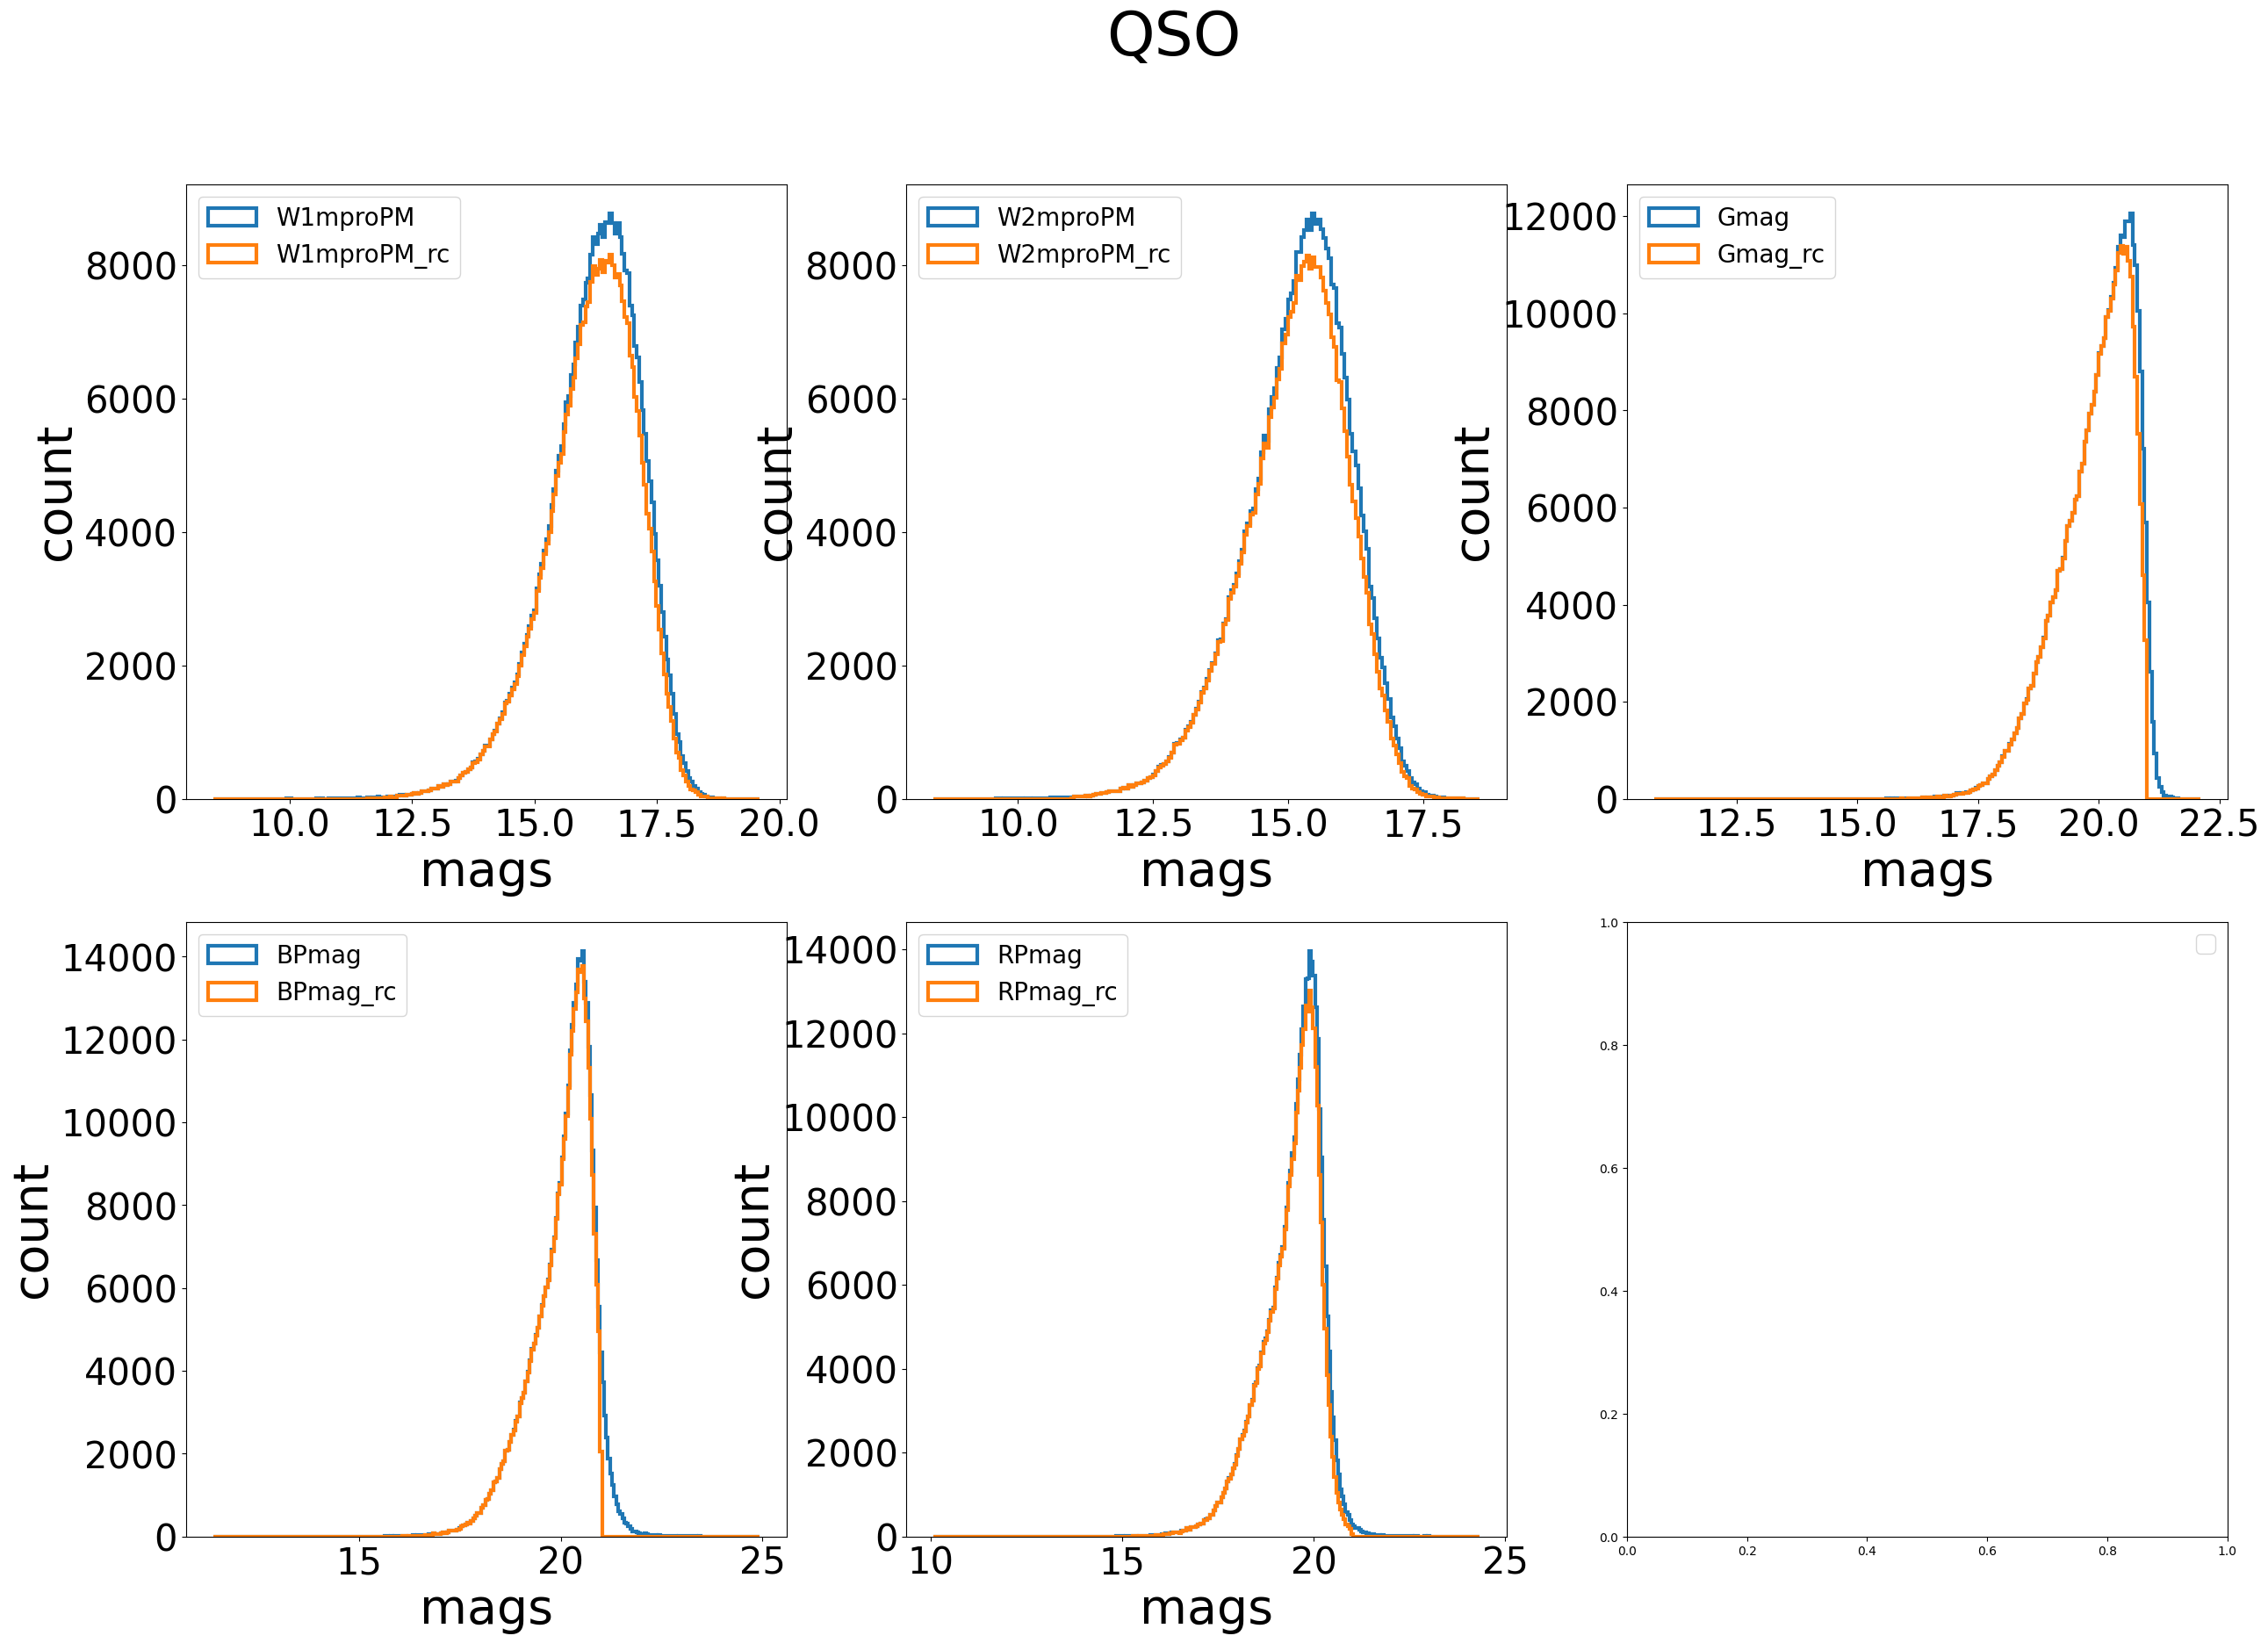

In [19]:
fig=plt.figure()
fig, axs = plt.subplots(2,3)

binwidth = 0.05

fig.suptitle("QSO", fontsize=50)       
for i in range(2):
    for j in range(3):
        if(i*3 + j < len(features)):
            Hist(axs[i,j],data_deredded[features[i*3+j]],"mags", features[i*3+j],
                bins=np.arange(min(data_deredded[features[i*3+j]]), max(data_deredded[features[i*3+j]]) + binwidth, step=binwidth),                
                histtype='step', fill=config.picture["hist"]["fill"], lw=3)
            Hist(axs[i,j],data_range_cut[features[i*3+j]],"mags", f"{features[i*3+j]}_rc",
                bins=np.arange(min(data_deredded[features[i*3+j]]), max(data_deredded[features[i*3+j]]) + binwidth, step=binwidth),
                histtype='step', fill=config.picture["hist"]["fill"], lw=3)

        axs[i,j].legend(prop={'size': 20})
fig.set_size_inches(30,20)
#fig.savefig(f"{config.path_pic}/hist/{config.name_sample}_{class_name}_{col}_hist.png")
#fig.show()
plt.show()

<b>sbg</b> range cut by photometry histogram

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

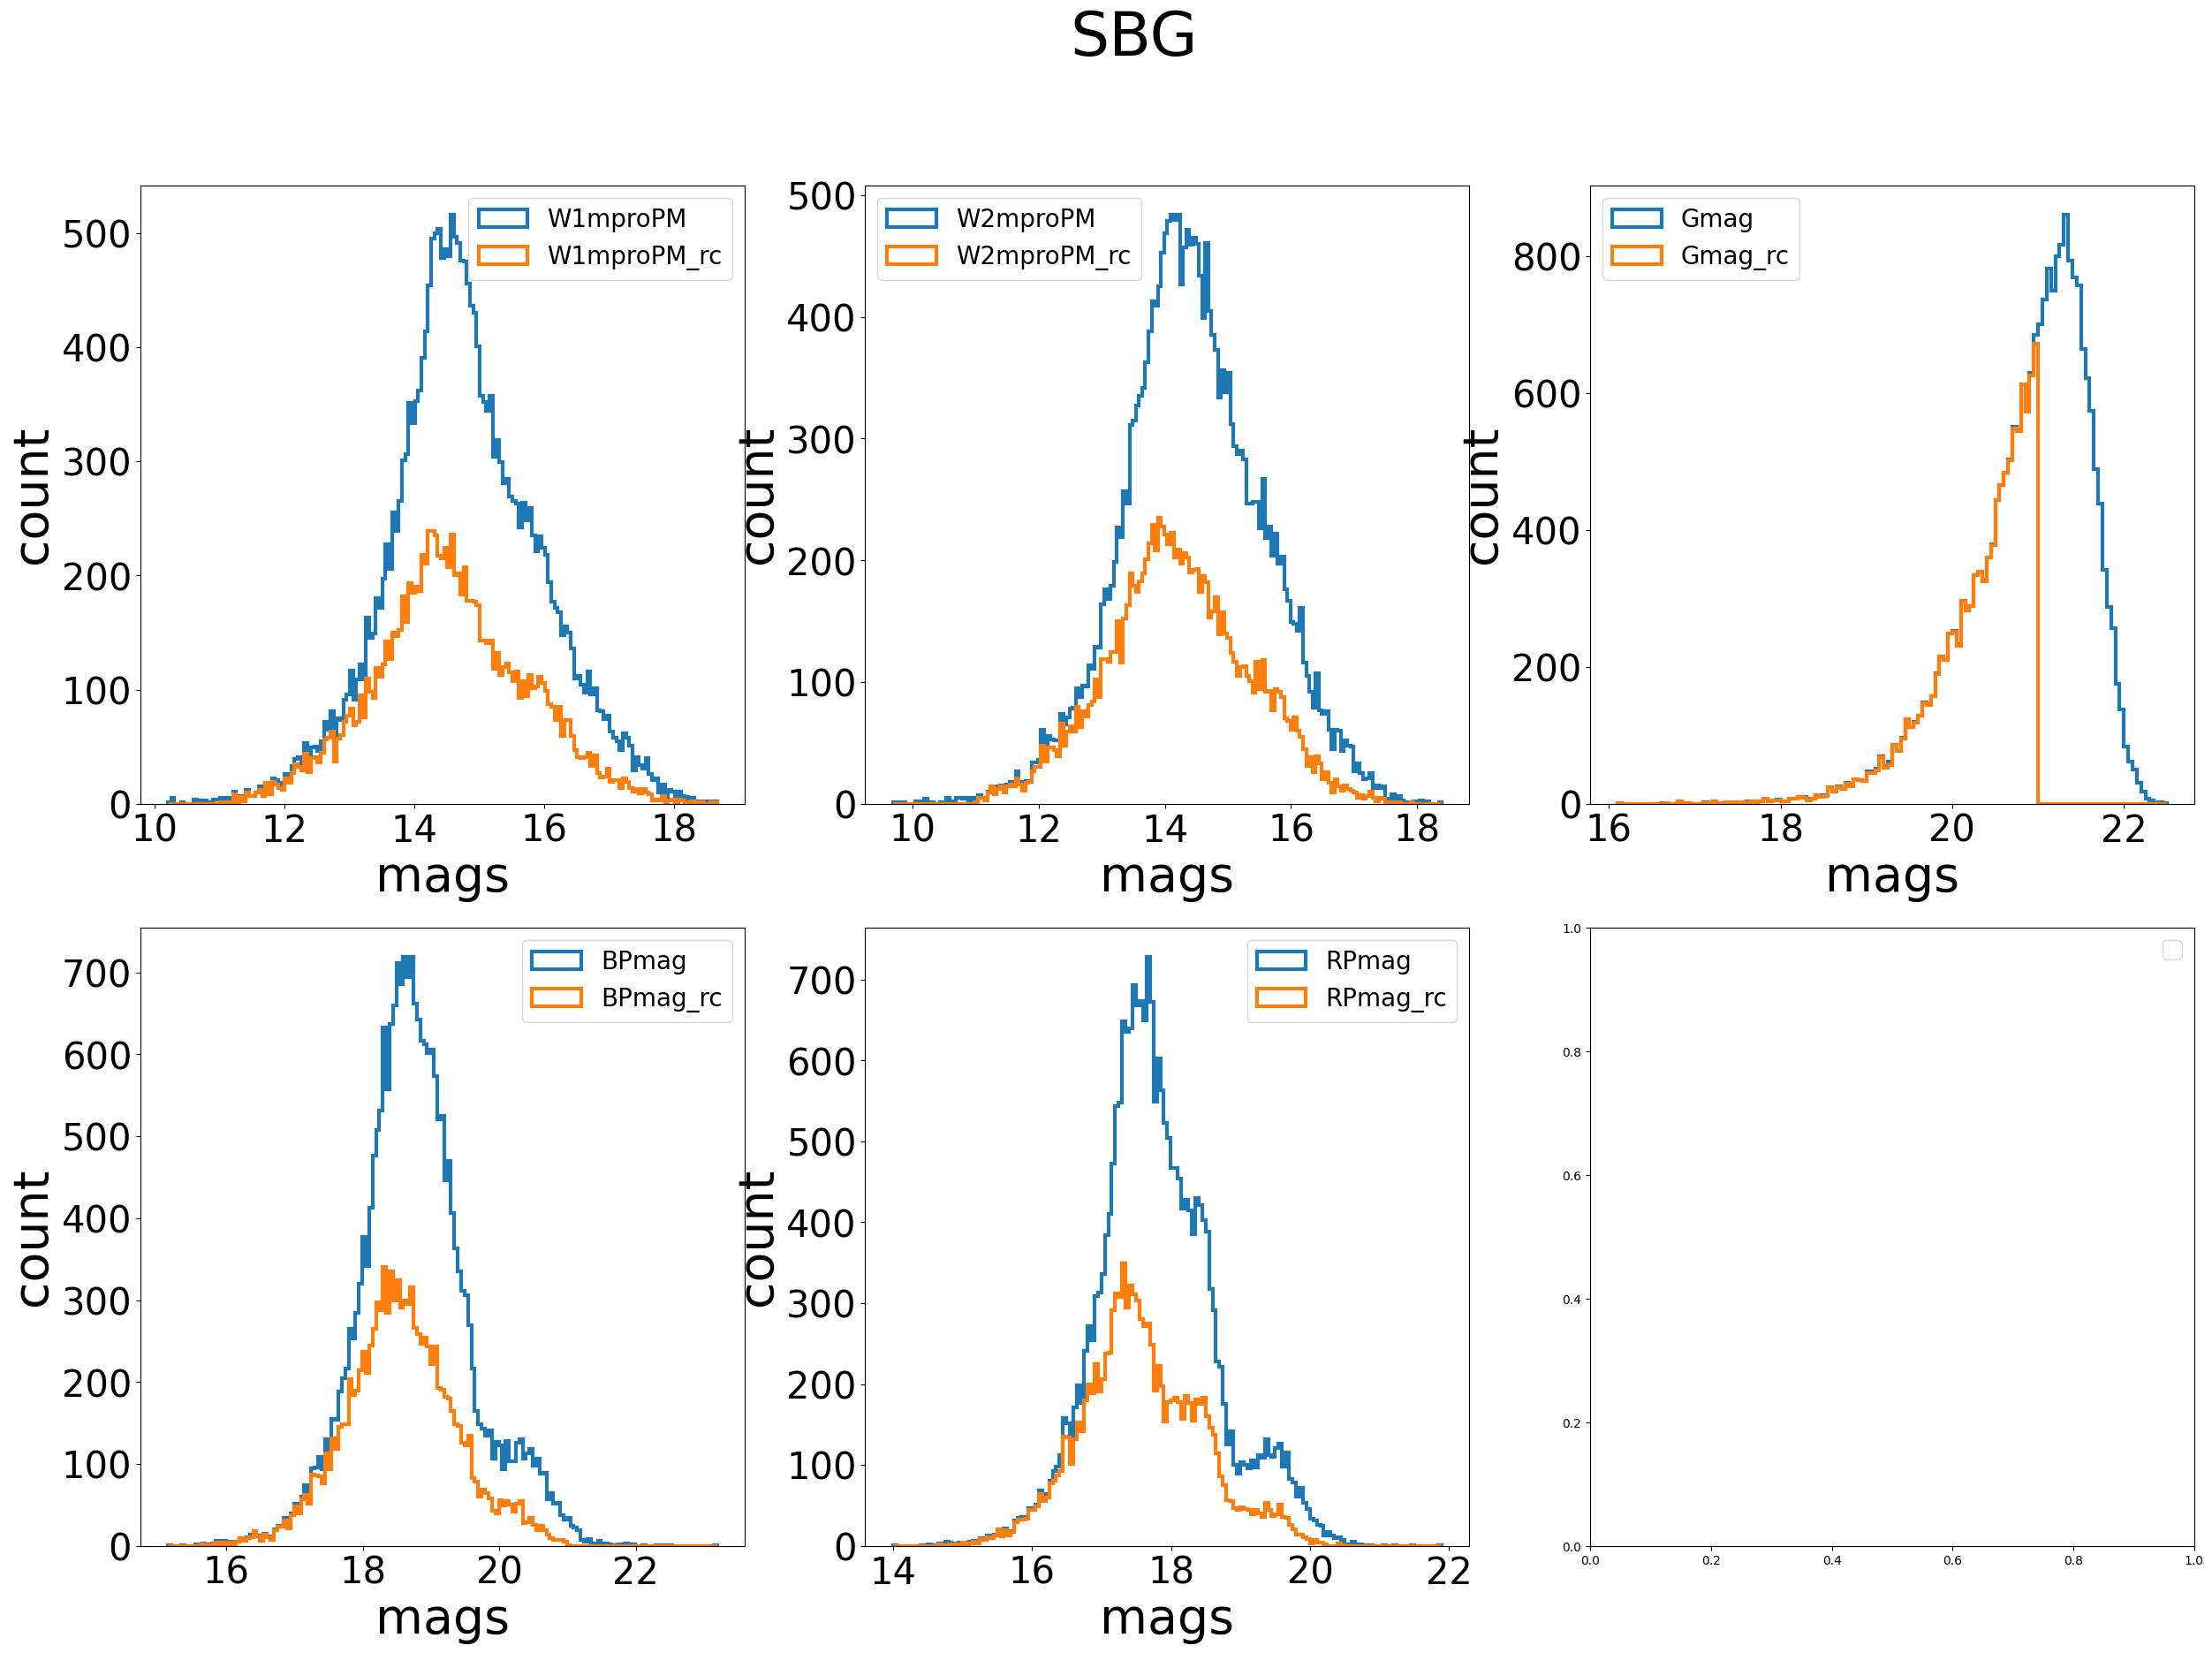

In [23]:
fig=plt.figure()
fig, axs = plt.subplots(2,3)

binwidth = 0.05

fig.suptitle("SBG", fontsize=50)       
for i in range(2):
    for j in range(3):
        if(i*3 + j < len(features)):
            Hist(axs[i,j],data_deredded[features[i*3+j]],"mags", features[i*3+j],
                bins=np.arange(min(data_deredded[features[i*3+j]]), max(data_deredded[features[i*3+j]]) + binwidth, step=binwidth),                
                histtype='step', fill=config.picture["hist"]["fill"], lw=3)
            Hist(axs[i,j],data_range_cut[features[i*3+j]],"mags", f"{features[i*3+j]}_rc",
                bins=np.arange(min(data_deredded[features[i*3+j]]), max(data_deredded[features[i*3+j]]) + binwidth, step=binwidth),
                histtype='step', fill=config.picture["hist"]["fill"], lw=3)

        axs[i,j].legend(prop={'size': 20})
fig.set_size_inches(30,20)
#fig.savefig(f"{config.path_pic}/hist/{config.name_sample}_{class_name}_{col}_hist.png")
#fig.show()
plt.show()

<b>sfg</b> range cut by photometry histogram

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

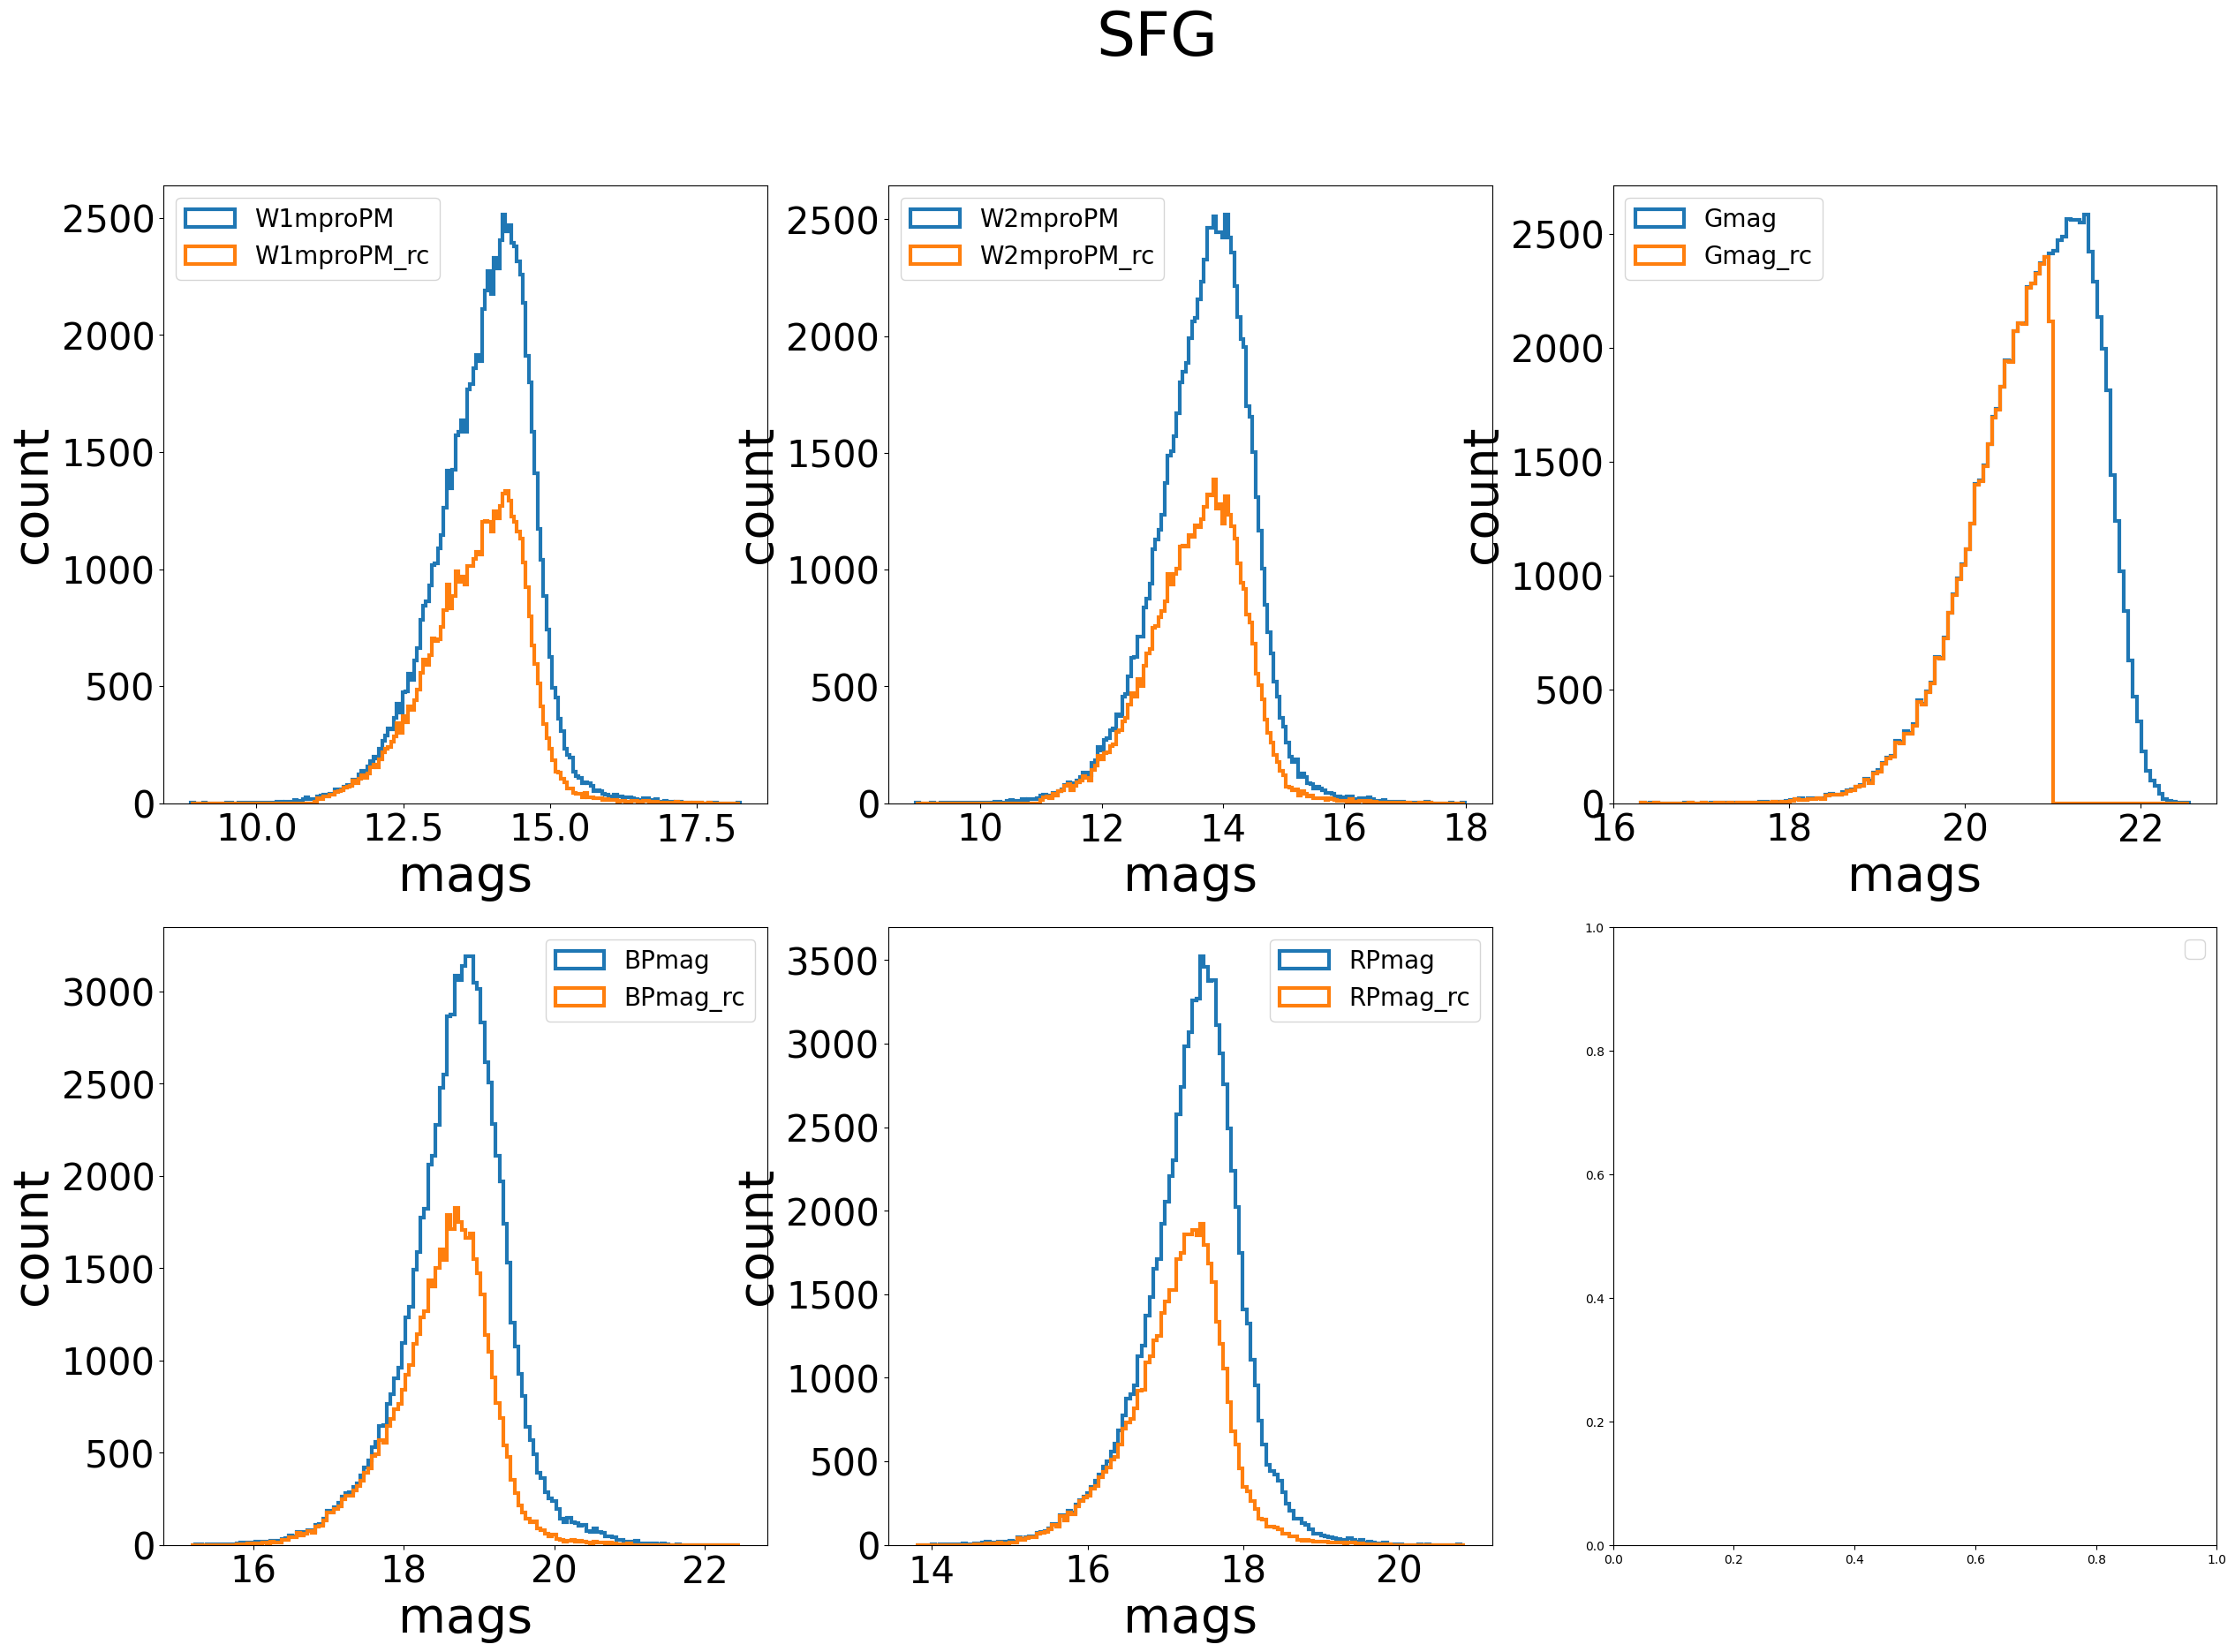

In [79]:
fig=plt.figure()
fig, axs = plt.subplots(2,3)

binwidth = 0.05

fig.suptitle("SFG", fontsize=50)       
for i in range(2):
    for j in range(3):
        if(i*3 + j < len(features)):
            Hist(axs[i,j],data_deredded[features[i*3+j]],"mags", features[i*3+j],
                bins=np.arange(min(data_deredded[features[i*3+j]]), max(data_deredded[features[i*3+j]]) + binwidth, step=binwidth),                
                histtype='step', fill=config.picture["hist"]["fill"], lw=3)
            Hist(axs[i,j],data_range_cut[features[i*3+j]],"mags", f"{features[i*3+j]}_rc",
                bins=np.arange(min(data_deredded[features[i*3+j]]), max(data_deredded[features[i*3+j]]) + binwidth, step=binwidth),
                histtype='step', fill=config.picture["hist"]["fill"], lw=3)

        axs[i,j].legend(prop={'size': 20})
fig.set_size_inches(30,20)
#fig.savefig(f"{config.path_pic}/hist/{config.name_sample}_{class_name}_{col}_hist.png")
#fig.show()
plt.show()

<b>gal</b> range cut by photometry histogram

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

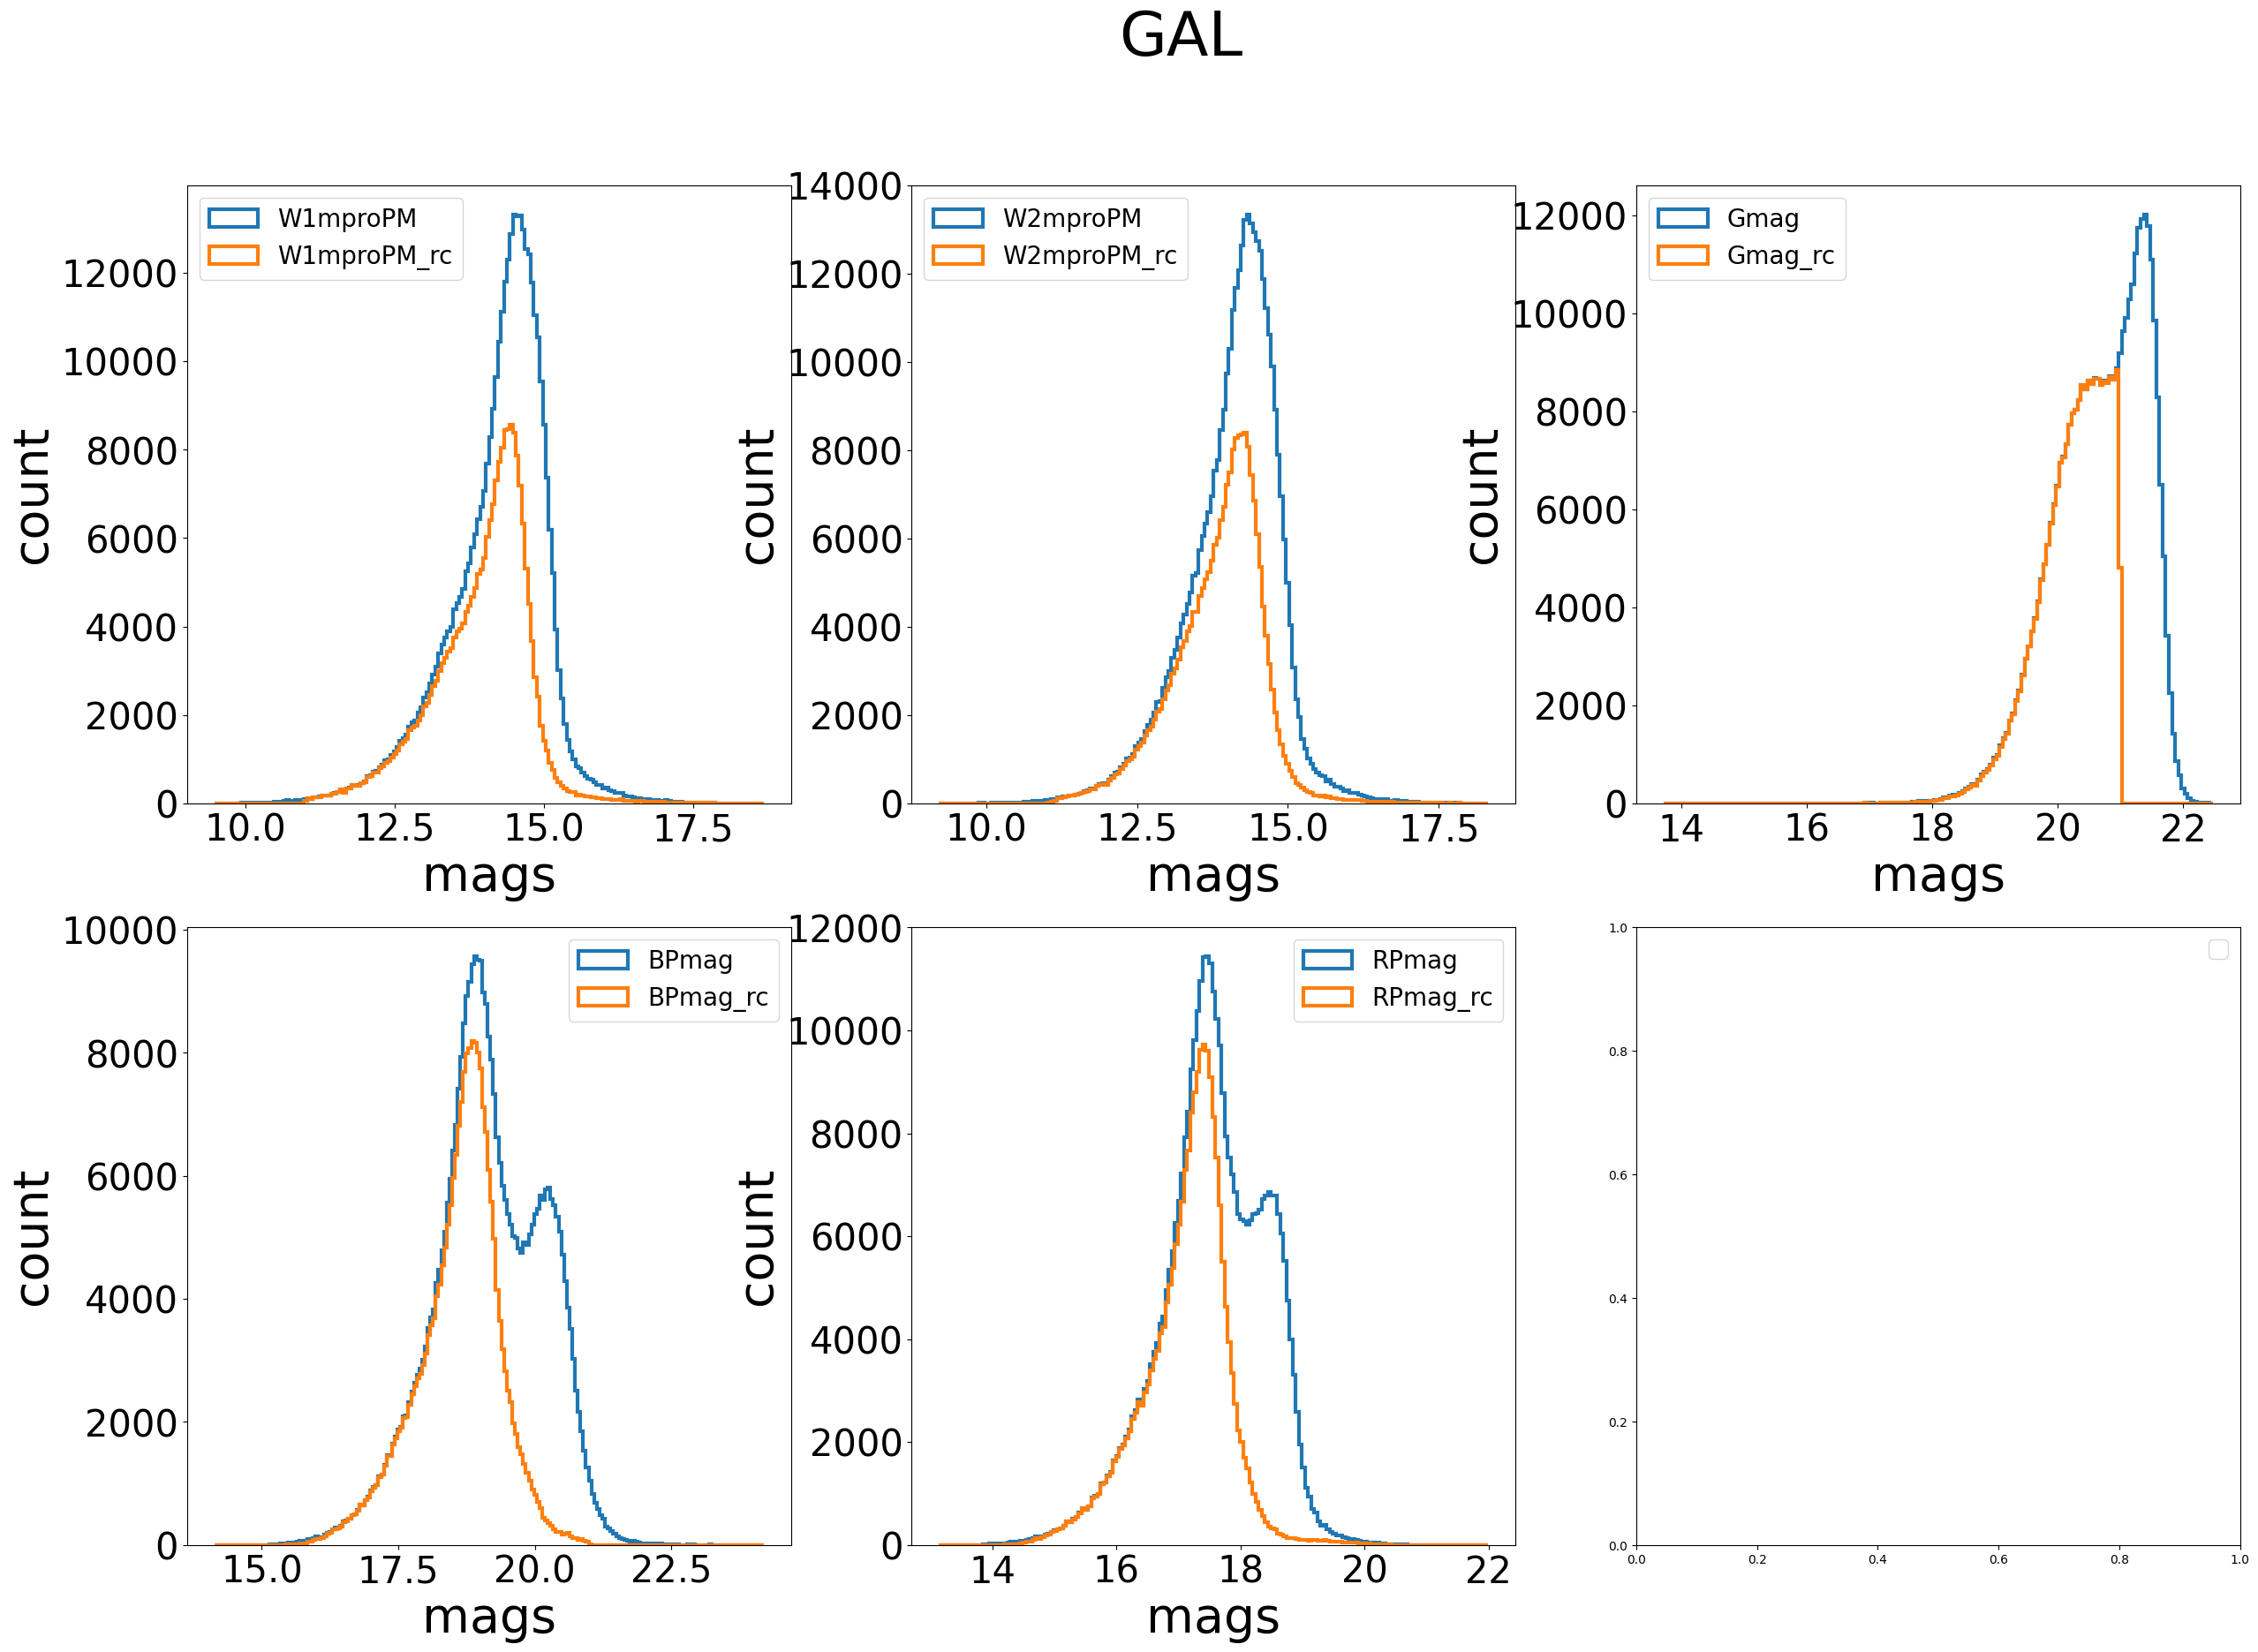

In [86]:
fig=plt.figure()
fig, axs = plt.subplots(2,3)

binwidth = 0.05

fig.suptitle("GAL", fontsize=50)       
for i in range(2):
    for j in range(3):
        if(i*3 + j < len(features)):
            Hist(axs[i,j],data_deredded[features[i*3+j]],"mags", features[i*3+j],
                bins=np.arange(min(data_deredded[features[i*3+j]]), max(data_deredded[features[i*3+j]]) + binwidth, step=binwidth),                
                histtype='step', fill=config.picture["hist"]["fill"], lw=3)
            Hist(axs[i,j],data_range_cut[features[i*3+j]],"mags", f"{features[i*3+j]}_rc",
                bins=np.arange(min(data_deredded[features[i*3+j]]), max(data_deredded[features[i*3+j]]) + binwidth, step=binwidth),
                histtype='step', fill=config.picture["hist"]["fill"], lw=3)

        axs[i,j].legend(prop={'size': 20})
fig.set_size_inches(30,20)
#fig.savefig(f"{config.path_pic}/hist/{config.name_sample}_{class_name}_{col}_hist.png")
#fig.show()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

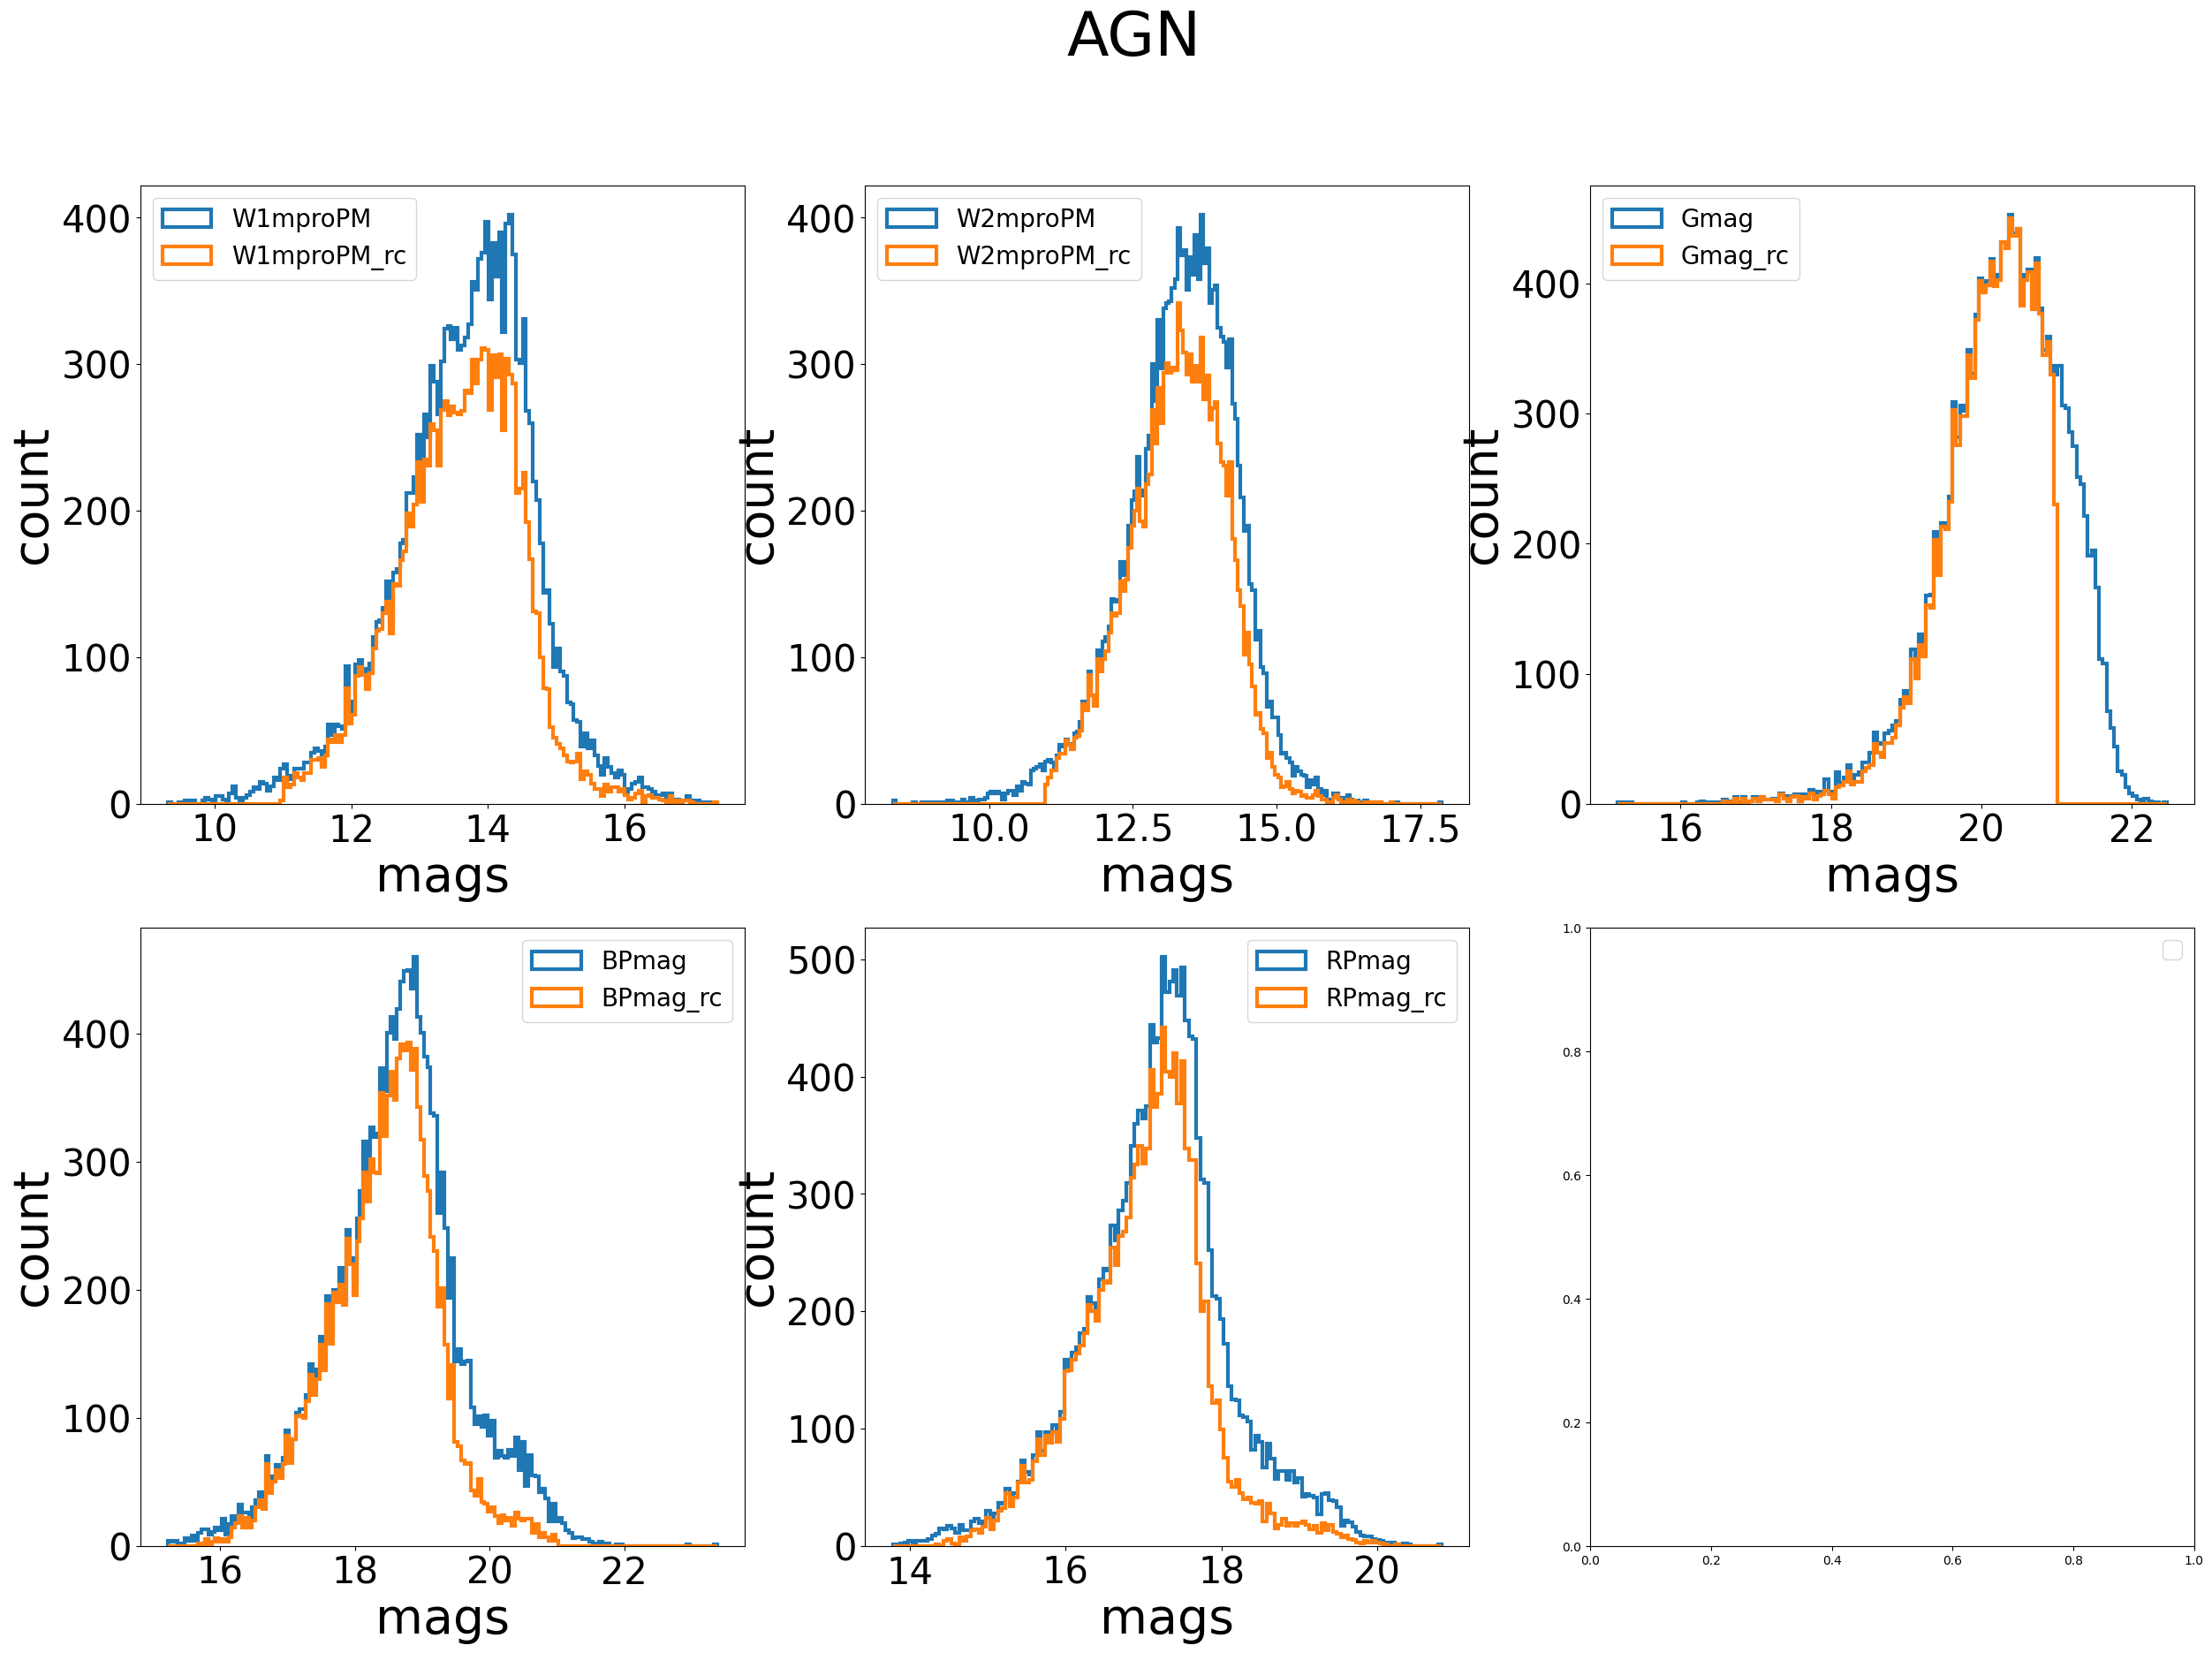

In [90]:
fig=plt.figure()
fig, axs = plt.subplots(2,3)

binwidth = 0.05

fig.suptitle("AGN", fontsize=50)       
for i in range(2):
    for j in range(3):
        if(i*3 + j < len(features)):
            Hist(axs[i,j],data_deredded[features[i*3+j]],"mags", features[i*3+j], 
                bins=np.arange(min(data_deredded[features[i*3+j]]), max(data_deredded[features[i*3+j]]) + binwidth, step=binwidth), 
                histtype='step', fill=config.picture["hist"]["fill"], lw=3)
            Hist(axs[i,j],data_range_cut[features[i*3+j]],"mags", f"{features[i*3+j]}_rc",
                bins=np.arange(min(data_deredded[features[i*3+j]]), max(data_deredded[features[i*3+j]]) + binwidth, step=binwidth),
                histtype='step', fill=config.picture["hist"]["fill"], lw=3)

        axs[i,j].legend(prop={'size': 20})
fig.set_size_inches(30,20)
#fig.savefig(f"{config.path_pic}/hist/{config.name_sample}_{class_name}_{col}_hist.png")
#fig.show()
plt.show()

<h2>Flux</h2>

In [9]:
from data_process import flux_var

def flux(data):
    data_flux_var, data_flux_color = flux_var(data[config.features["data"]["flux"]])
    if(config.flags['data_preprocessing']['main_sample']['flux']['var']):
        data = pd.concat([data,data_flux_var],axis=1)
    if(config.flags['data_preprocessing']['main_sample']['flux']['color']):
        data = pd.concat([data,data_flux_color],axis=1)
    
    return data

data_flux = flux(data_range_cut)
data_flux

RA        DEC         z     z_err   angDist  angDist.1   
0       166.53116 -17.520444  2.546282  0.000149  0.063532   0.069244  \
1       166.95578 -17.279537  2.706933  0.000162  0.037483   0.526276   
2         8.29727 -17.178208  2.906453  0.000079  0.047789   0.054932   
3       168.08451 -16.924625  2.807152  0.000094  0.082540   0.157929   
4       167.30094 -16.592488  2.311591  0.000203  0.141427   0.157660   
...           ...        ...       ...       ...       ...        ...   
364540  183.49273  67.869849  2.347018  0.000507  0.268947   0.245011   
364541  188.67065  67.870509  0.274328  0.000031  0.074282   0.120631   
364542  181.60952  67.874351  1.209410  0.000530  0.018842   0.125109   
364543  150.91964  67.875852  0.654613  0.000132  0.087496   0.039498   
364544  179.29461  67.878838  0.904611  0.000177  0.204578   0.227457   

            PQSO      PGal       PSS  nW1  ...      BPmag   e_BPmag   
0       0.999891  0.000000  0.000109   12  ...  17.604997  0.009197  \
1       0.376463  0.000000  0.623525   10  ...  20.277682  0.102585   
2       0.999996  0.000000  0.000004   13  ...  17.921826  0.015037   
3       1.000000  0.000000  0.000000   12  ...  18.913900  0.032866   
4       1.000000  0.000000  0.000000   12  ...  19.609876  0.061305   
...          ...       ...       ...  ...  ...        ...       ...   
364540  0.007657  0.000240  0.991072   12  ...  20.828675  0.172916   
364541  0.946483  0.053517  0.000000   12  ...  18.282760  0.025215   
364542  1.000000  0.000000  0.000000   12  ...  19.550738  0.059338   
364543  1.000000  0.000000  0.000000   11  ...  18.181054  0.021689   
364544  0.999994  0.000005  0.000001   12  ...  20.197405  0.082877   

            RPmag   e_RPmag    E(B-V)  var_FW1pm  var_FW2pm    var_FG   
0       16.956126  0.010138  0.046041   0.051244   0.033282  0.025687  \
1       19.884497  0.105972  0.049427   0.208985   0.228070  0.092881   
2       17.394179  0.015400  0.020286   0.052581   0.042095  0.034653   
3       18.517875  0.031291  0.082578   0.070576   0.080742  0.048241   
4       18.947034  0.055442  0.069989   0.102640   0.107095  0.099677   
...           ...       ...       ...        ...        ...       ...   
364540  20.162289  0.209909  0.022018   0.147734   0.160706  0.136859   
364541  17.518708  0.017575  0.013515   0.037503   0.028832  0.100191   
364542  19.192321  0.048722  0.014931   0.067169   0.048880  0.113119   
364543  17.804318  0.022136  0.069294   0.041818   0.028840  0.089198   
364544  19.343631  0.060396  0.014451   0.051639   0.042285  0.112167   

         var_FBP   var_FRP  
0       0.056502  0.059402  
1       0.508627  0.506839  
2       0.070714  0.070110  
3       0.213276  0.202297  
4       0.308945  0.283653  
...          ...       ...  
364540  0.421312  0.511428  
364541  0.144142  0.097447  
364542  0.345266  0.279397  
364543  0.134359  0.140620  
364544  0.451334  0.333108  

[364545 rows x 40 columns]

<h2>Color</h2>

In [10]:
from data_process import colors

def color(data):
    data_color, data_err = colors(data[config.features["data"]["photometry"]])
    if(config.flags['data_preprocessing']['main_sample']['color']['mags']):
        data = pd.concat([data,data_color],axis=1)
    if(config.flags['data_preprocessing']['main_sample']['color']['err']):
        data = pd.concat([data,data_err],axis=1)
    
    return data

data_color = color(data_flux)
data_color

RA        DEC         z     z_err   angDist  angDist.1   
0       166.53116 -17.520444  2.546282  0.000149  0.063532   0.069244  \
1       166.95578 -17.279537  2.706933  0.000162  0.037483   0.526276   
2         8.29727 -17.178208  2.906453  0.000079  0.047789   0.054932   
3       168.08451 -16.924625  2.807152  0.000094  0.082540   0.157929   
4       167.30094 -16.592488  2.311591  0.000203  0.141427   0.157660   
...           ...        ...       ...       ...       ...        ...   
364540  183.49273  67.869849  2.347018  0.000507  0.268947   0.245011   
364541  188.67065  67.870509  0.274328  0.000031  0.074282   0.120631   
364542  181.60952  67.874351  1.209410  0.000530  0.018842   0.125109   
364543  150.91964  67.875852  0.654613  0.000132  0.087496   0.039498   
364544  179.29461  67.878838  0.904611  0.000177  0.204578   0.227457   

            PQSO      PGal       PSS  nW1  ...  e_W1mproPM&e_W2mproPM   
0       0.999891  0.000000  0.000109   12  ...               0.018868  \
1       0.376463  0.000000  0.623525   10  ...               0.142888   
2       0.999996  0.000000  0.000004   13  ...               0.020616   
3       1.000000  0.000000  0.000000   12  ...               0.033302   
4       1.000000  0.000000  0.000000   12  ...               0.046690   
...          ...       ...       ...  ...  ...                    ...   
364540  0.007657  0.000240  0.991072   12  ...               0.067897   
364541  0.946483  0.053517  0.000000   12  ...               0.015000   
364542  1.000000  0.000000  0.000000   12  ...               0.025807   
364543  1.000000  0.000000  0.000000   11  ...               0.015811   
364544  0.999994  0.000005  0.000001   12  ...               0.020616   

        e_W1mproPM&e_Gmag  e_W1mproPM&e_BPmag  e_W1mproPM&e_RPmag   
0                0.016288            0.018455            0.018941  \
1                0.071305            0.124758            0.127558   
2                0.016404            0.021957            0.022207   
3                0.022304            0.039550            0.038251   
4                0.032761            0.069154            0.064014   
...                   ...                 ...                 ...   
364540           0.050319            0.179190            0.215106   
364541           0.013552            0.027925            0.021281   
364542           0.022104            0.062944            0.053055   
364543           0.014008            0.025287            0.025671   
364544           0.017430            0.084407            0.062479   

        e_W2mproPM&e_Gmag  e_W2mproPM&e_BPmag  e_W2mproPM&e_RPmag   
0                0.010454            0.013586            0.014240  \
1                0.124175            0.160934            0.163114   
2                0.013494            0.019877            0.020153   
3                0.025268            0.041294            0.040052   
4                0.034717            0.070102            0.065037   
...                   ...                 ...                 ...   
364540           0.052192            0.179725            0.215552   
364541           0.010985            0.026773            0.019745   
364542           0.016510            0.061205            0.050979   
364543           0.010403            0.023482            0.023896   
364544           0.014724            0.083890            0.061779   

        e_Gmag&e_BPmag  e_Gmag&e_RPmag  e_BPmag&e_RPmag  
0             0.009689        0.010586         0.013688  
1             0.102796        0.106177         0.147492  
2             0.015466        0.015819         0.021524  
3             0.033070        0.031506         0.045380  
4             0.061706        0.055885         0.082657  
...                ...             ...              ...  
364540        0.173848        0.210677         0.271959  
364541        0.025990        0.018669         0.030736  
364542        0.059738        0.049208         0.076778  
364543        0.022308 

<h4>need for config case</h4>

In [11]:
from data_process import get_features

def data_issue(check):
    match check:
        case 'err':
            if(config.flags['data_preprocessing']['main_sample']['color']['work']):
                return get_features(["err_color"],config)
            else:
                raise Exception('cant made outlire by err, \ncheck flags["data_preprocessing"]["main_sample"]["color"]["work"] in config')
        case 'color':
            if(config.flags['data_preprocessing']['main_sample']['color']['work']):
                return get_features(["color"],config)
            else:
                raise Exception('cant made outlire by color, \ncheck flags["data_preprocessing"]["main_sample"]["color"]["work"] in config')
        case 'features':
            return config.features["data"]["photometry"]
        case _:
            raise Exception('wrong value flags["data_preprocessing"]["main_sample"]["weight"]["value"]')

<h2>Fuzzy dist&error</h2>

In [32]:
from data_process import fuzzy_dist,fuzzy_err,Normali

def fuzz(data):
    index = config.flags['data_preprocessing']['main_sample']['weight']['method'].index('fuzzy_err')
    data['fuzzy_err'] = fuzzy_err(data[data_issue(config.flags['data_preprocessing']['main_sample']['weight']['value'][index])])
    #print(name," complite fuzzy_err")
    
    index = config.flags['data_preprocessing']['main_sample']['weight']['method'].index('fuzzy_dist')
    data_dist, max = fuzzy_dist(data[data_issue(config.flags['data_preprocessing']['main_sample']['weight']['value'][index])])
    data['fuzzy_dist'] = Normali(data_dist, max)
    #print(name," complite fuzzy_dist")

fuzz(data_color)

data_color

['color']


RA        DEC         z     z_err   angDist  angDist.1   
0       166.53116 -17.520444  2.546282  0.000149  0.063532   0.069244  \
1       166.95578 -17.279537  2.706933  0.000162  0.037483   0.526276   
2         8.29727 -17.178208  2.906453  0.000079  0.047789   0.054932   
3       168.08451 -16.924625  2.807152  0.000094  0.082540   0.157929   
4       167.30094 -16.592488  2.311591  0.000203  0.141427   0.157660   
...           ...        ...       ...       ...       ...        ...   
364540  183.49273  67.869849  2.347018  0.000507  0.268947   0.245011   
364541  188.67065  67.870509  0.274328  0.000031  0.074282   0.120631   
364542  181.60952  67.874351  1.209410  0.000530  0.018842   0.125109   
364543  150.91964  67.875852  0.654613  0.000132  0.087496   0.039498   
364544  179.29461  67.878838  0.904611  0.000177  0.204578   0.227457   

            PQSO      PGal       PSS  nW1  ...  e_W1mproPM&e_BPmag   
0       0.999891  0.000000  0.000109   12  ...            0.018455  \
1       0.376463  0.000000  0.623525   10  ...            0.124758   
2       0.999996  0.000000  0.000004   13  ...            0.021957   
3       1.000000  0.000000  0.000000   12  ...            0.039550   
4       1.000000  0.000000  0.000000   12  ...            0.069154   
...          ...       ...       ...  ...  ...                 ...   
364540  0.007657  0.000240  0.991072   12  ...            0.179190   
364541  0.946483  0.053517  0.000000   12  ...            0.027925   
364542  1.000000  0.000000  0.000000   12  ...            0.062944   
364543  1.000000  0.000000  0.000000   11  ...            0.025287   
364544  0.999994  0.000005  0.000001   12  ...            0.084407   

        e_W1mproPM&e_RPmag  e_W2mproPM&e_Gmag  e_W2mproPM&e_BPmag   
0                 0.018941           0.010454            0.013586  \
1                 0.127558           0.124175            0.160934   
2                 0.022207           0.013494            0.019877   
3                 0.038251           0.025268            0.041294   
4                 0.064014           0.034717            0.070102   
...                    ...                ...                 ...   
364540            0.215106           0.052192            0.179725   
364541            0.021281           0.010985            0.026773   
364542            0.053055           0.016510            0.061205   
364543            0.025671           0.010403            0.023482   
364544            0.062479           0.014724            0.083890   

        e_W2mproPM&e_RPmag  e_Gmag&e_BPmag  e_Gmag&e_RPmag  e_BPmag&e_RPmag   
0                 0.014240        0.009689        0.010586         0.013688  \
1                 0.163114        0.102796        0.106177         0.147492   
2                 0.020153        0.015466        0.015819         0.021524   
3                 0.040052        0.033070        0.031506         0.045380   
4                 0.065037        0.061706        0.055885         0.082657   
...                    ...             ...             ...              ...   
364540            0.215552        0.173848        0.210677         0.271959   
364541            0.019745        0.025990        0.018669         0.030736   
364542            0.050979        0.059738        0.049208         0.076778   
364543            0.023896        0.022308        0.022742         0.030991   
364544            0.061779        0.083165        0.060790         0.102549   

        fuzzy_err  fuzzy_dist  
0        0.711130    0.899605  
1        0.629051    0.822488  
2        0.706705    0.930559  
3        0.691942    0.904133  
4        0.676395    0.903264  
...           ...         ...  
364540   0.639494    0.972342  
364541   0.708013    0.839206  
364542   0.688617    0.945775  
364543   0.707399    0.925566  
364544   0.690699    0.828590  

[364545 rows x 62 columns]

<h2>MCD</h2>

In [12]:
from data_process import MCD

def mcd(data):
    data_count_input = data.shape[0]
    #
    mcd_d, gauss_d, outlire = MCD(data[data_issue(config.flags['data_preprocessing']['main_sample']['outlire']['value'])],0,config)
    #
    if(config.flags['data_preprocessing']['main_sample']['outlire']['add_param']['add']):
        mcd_d = pd.DataFrame(np.array(mcd_d), columns = ['mcd_d'])
        mcd_g = pd.DataFrame(np.array(gauss_d), columns = ['mcd_g'])
        data = pd.concat([data,mcd_d,mcd_g], axis=1)
    if(config.flags['data_preprocessing']['main_sample']['outlire']['cut']):
        data = data.drop(outlire)
    #
    print("MCD CUT PROCESS")
    print(f"Input: {data_count_input} | Output: {data.shape[0]}")
    
    return data

data_mcd = mcd(data_color)
data_mcd

['color']
M: 1.7548067890980283 | sigma: 0.9672043336182911
MCD CUT PROCESS
Input: 364545 | Output: 358452


RA        DEC         z     z_err   angDist  angDist.1   
0       166.53116 -17.520444  2.546282  0.000149  0.063532   0.069244  \
1       166.95578 -17.279537  2.706933  0.000162  0.037483   0.526276   
2         8.29727 -17.178208  2.906453  0.000079  0.047789   0.054932   
3       168.08451 -16.924625  2.807152  0.000094  0.082540   0.157929   
4       167.30094 -16.592488  2.311591  0.000203  0.141427   0.157660   
...           ...        ...       ...       ...       ...        ...   
364540  183.49273  67.869849  2.347018  0.000507  0.268947   0.245011   
364541  188.67065  67.870509  0.274328  0.000031  0.074282   0.120631   
364542  181.60952  67.874351  1.209410  0.000530  0.018842   0.125109   
364543  150.91964  67.875852  0.654613  0.000132  0.087496   0.039498   
364544  179.29461  67.878838  0.904611  0.000177  0.204578   0.227457   

            PQSO      PGal       PSS  nW1  ...  e_W1mproPM&e_BPmag   
0       0.999891  0.000000  0.000109   12  ...            0.018455  \
1       0.376463  0.000000  0.623525   10  ...            0.124758   
2       0.999996  0.000000  0.000004   13  ...            0.021957   
3       1.000000  0.000000  0.000000   12  ...            0.039550   
4       1.000000  0.000000  0.000000   12  ...            0.069154   
...          ...       ...       ...  ...  ...                 ...   
364540  0.007657  0.000240  0.991072   12  ...            0.179190   
364541  0.946483  0.053517  0.000000   12  ...            0.027925   
364542  1.000000  0.000000  0.000000   12  ...            0.062944   
364543  1.000000  0.000000  0.000000   11  ...            0.025287   
364544  0.999994  0.000005  0.000001   12  ...            0.084407   

        e_W1mproPM&e_RPmag  e_W2mproPM&e_Gmag  e_W2mproPM&e_BPmag   
0                 0.018941           0.010454            0.013586  \
1                 0.127558           0.124175            0.160934   
2                 0.022207           0.013494            0.019877   
3                 0.038251           0.025268            0.041294   
4                 0.064014           0.034717            0.070102   
...                    ...                ...                 ...   
364540            0.215106           0.052192            0.179725   
364541            0.021281           0.010985            0.026773   
364542            0.053055           0.016510            0.061205   
364543            0.025671           0.010403            0.023482   
364544            0.062479           0.014724            0.083890   

        e_W2mproPM&e_RPmag  e_Gmag&e_BPmag  e_Gmag&e_RPmag  e_BPmag&e_RPmag   
0                 0.014240        0.009689        0.010586         0.013688  \
1                 0.163114        0.102796        0.106177         0.147492   
2                 0.020153        0.015466        0.015819         0.021524   
3                 0.040052        0.033070        0.031506         0.045380   
4                 0.065037        0.061706        0.055885         0.082657   
...                    ...             ...             ...              ...   
364540            0.215552        0.173848        0.210677         0.271959   
364541            0.019745        0.025990        0.018669         0.030736   
364542            0.050979        0.059738        0.049208         0.076778   
364543            0.023896        0.022308        0.022742         0.030991   
364544            0.061779        0.083165        0.060790         0.102549   

           mcd_d     mcd_g  
0       2.640043  0.271325  
1       2.223549  0.366767  
2       1.532640  0.401730  
3       1.398720  0.385442  
4       1.133499  0.335573  
...          ...       ...  
364540  0.844047  0.264758  
364541  2.328627  0.345908  
364542  1.682448  0.411317  
364543  1.281949  0.366008  
364544  2.183685  0.373849  

[358452 rows x 62 columns]

gauss distribution

In [9]:
import math
gauss_func = lambda x,m,sigma: math.e**(-((x-m)**2)/(2*sigma**2))/(sigma*math.sqrt(2*math.pi))

<b>mcd_d</b> gauss distribution

In [29]:
m = data_mcd.loc[:,"mcd_d"].mean()
sigma = data_mcd.loc[:,"mcd_d"].std(ddof=0)

sigma_mass = np.zeros(10)
for i in range(10):
    sigma_mass[i] = gauss_func(m+sigma*i,m,sigma)

data_mcd_cut_mass = []
for i in range(10):
    data_mcd_cut_mass.append(data_mcd[data_mcd["mcd_g"] < sigma_mass[i]])


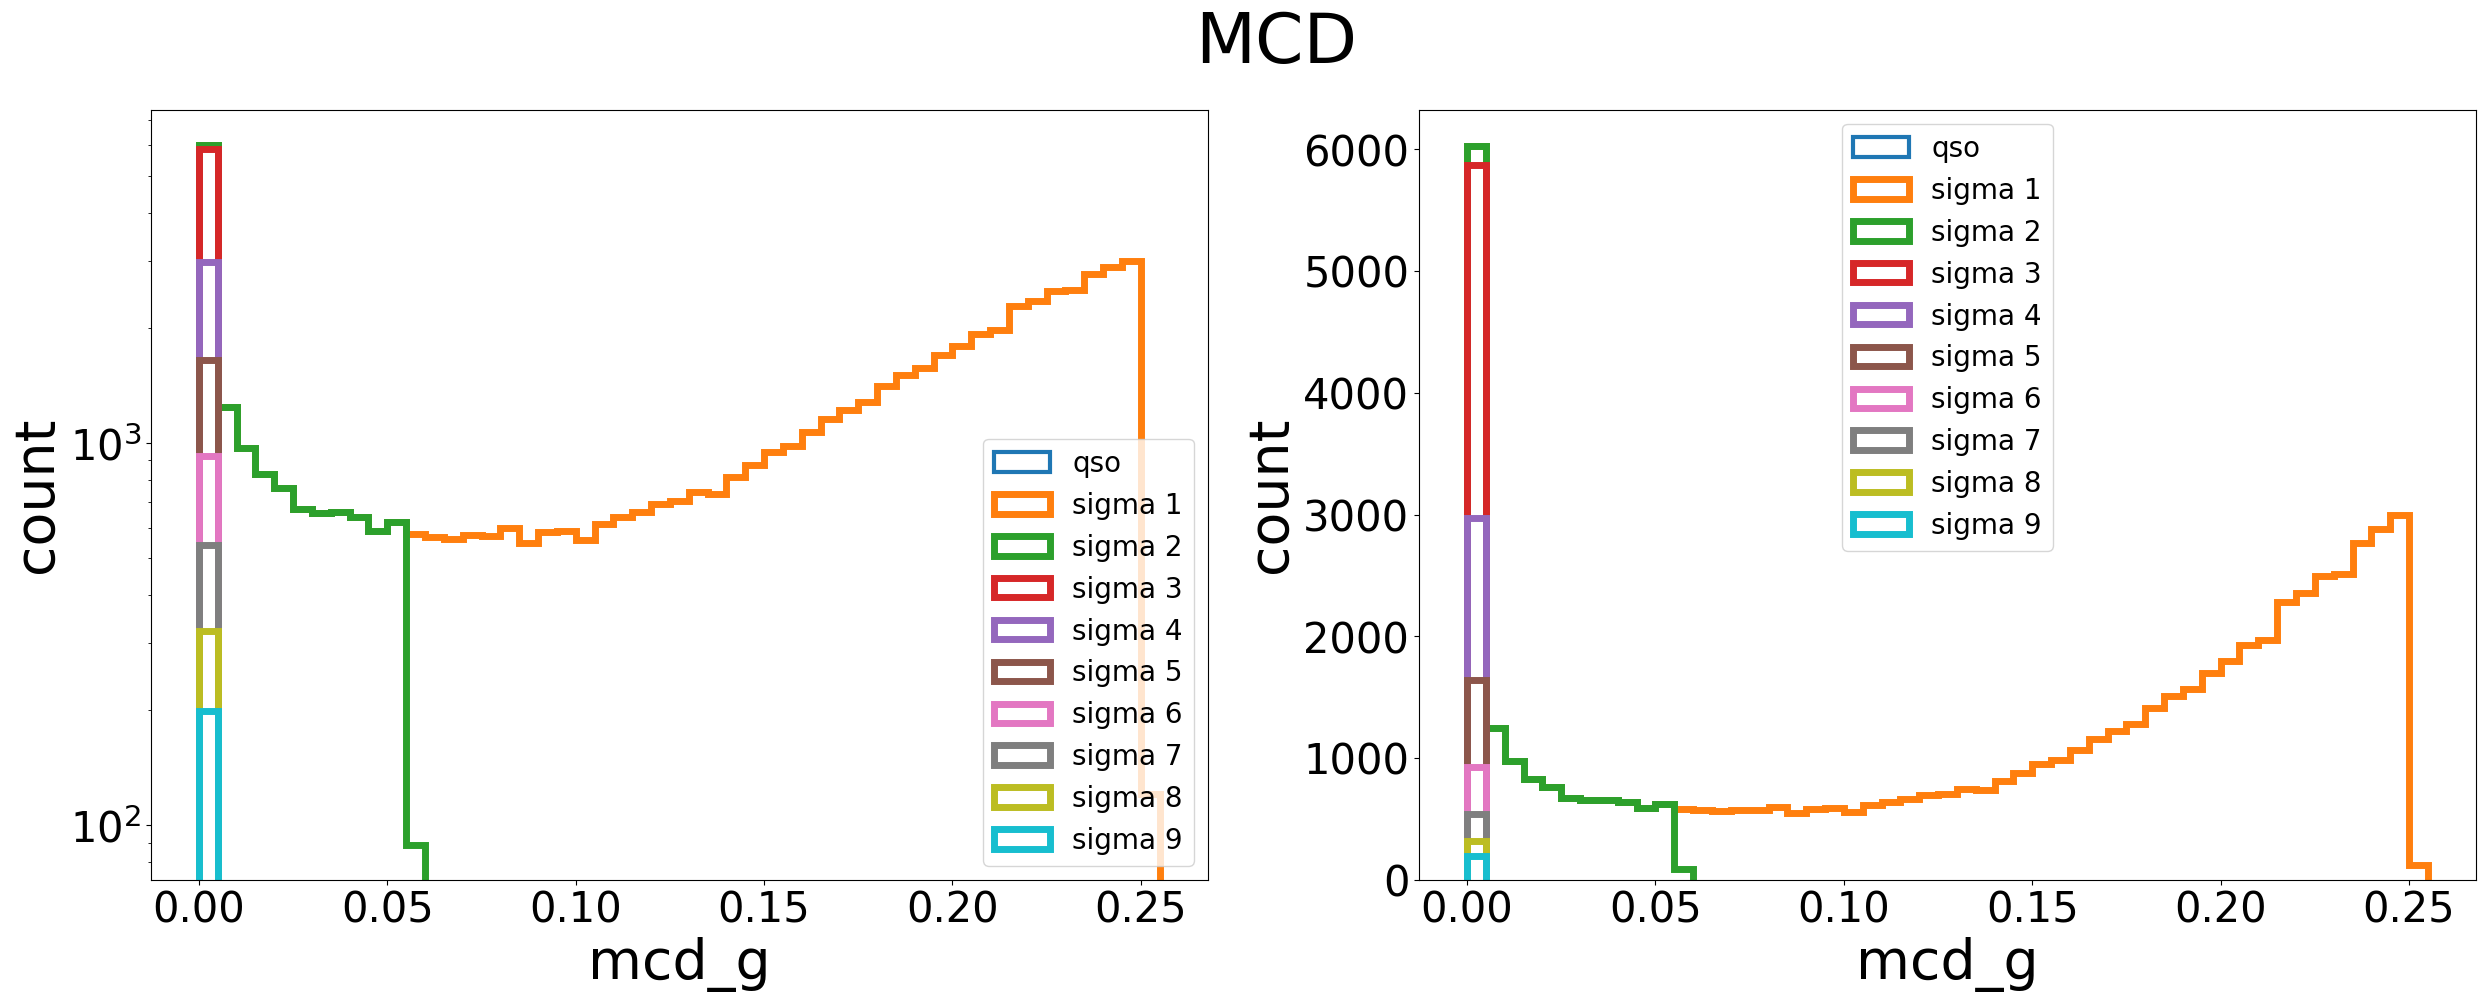

In [40]:
fig=plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
fig.suptitle("MCD", fontsize=50)       
binwidth = 0.005

Histlog(ax1,data_mcd["mcd_g"],'mcd_g',"qso", 
        bins=np.arange(min(data_mcd_cut_mass[i]["mcd_g"]), max(data_mcd_cut_mass[i]["mcd_g"]) + binwidth, step=binwidth),           
        histtype='step', fill=config.picture["hist"]["fill"], lw=3)
for i in range(1,10,1):
    Histlog(ax1,data_mcd_cut_mass[i]["mcd_g"],'mcd_g',f"sigma {i}", 
            bins=np.arange(min(data_mcd_cut_mass[i]["mcd_g"]), max(data_mcd_cut_mass[i]["mcd_g"]) + binwidth, step=binwidth),                
            histtype='step', fill=config.picture["hist"]["fill"], lw=5)    
ax1.legend(prop={'size': 20})

Hist(ax2,data_mcd["mcd_g"],'mcd_g',"qso",
            bins=np.arange(min(data_mcd_cut_mass[i]["mcd_g"]), max(data_mcd_cut_mass[i]["mcd_g"]) + binwidth, step=binwidth),   
            histtype='step', fill=config.picture["hist"]["fill"], lw=3)
for i in range(1,10,1):
    Hist(ax2,data_mcd_cut_mass[i]["mcd_g"],'mcd_g',f"sigma {i}",
        bins=np.arange(min(data_mcd_cut_mass[i]["mcd_g"]), max(data_mcd_cut_mass[i]["mcd_g"]) + binwidth, step=binwidth),            
        histtype='step', fill=config.picture["hist"]["fill"], lw=5)    
ax2.legend(prop={'size': 20})

fig.set_size_inches(30,10)
#fig.savefig(f"{config.path_pic}/hist/{config.name_sample}_{class_name}_{col}_hist.png")
#fig.show()
plt.show()
#plt.close(fig)

<b>mcd_d</b> gauss distribution | sigma step histogram on <b>mcd_d</b>

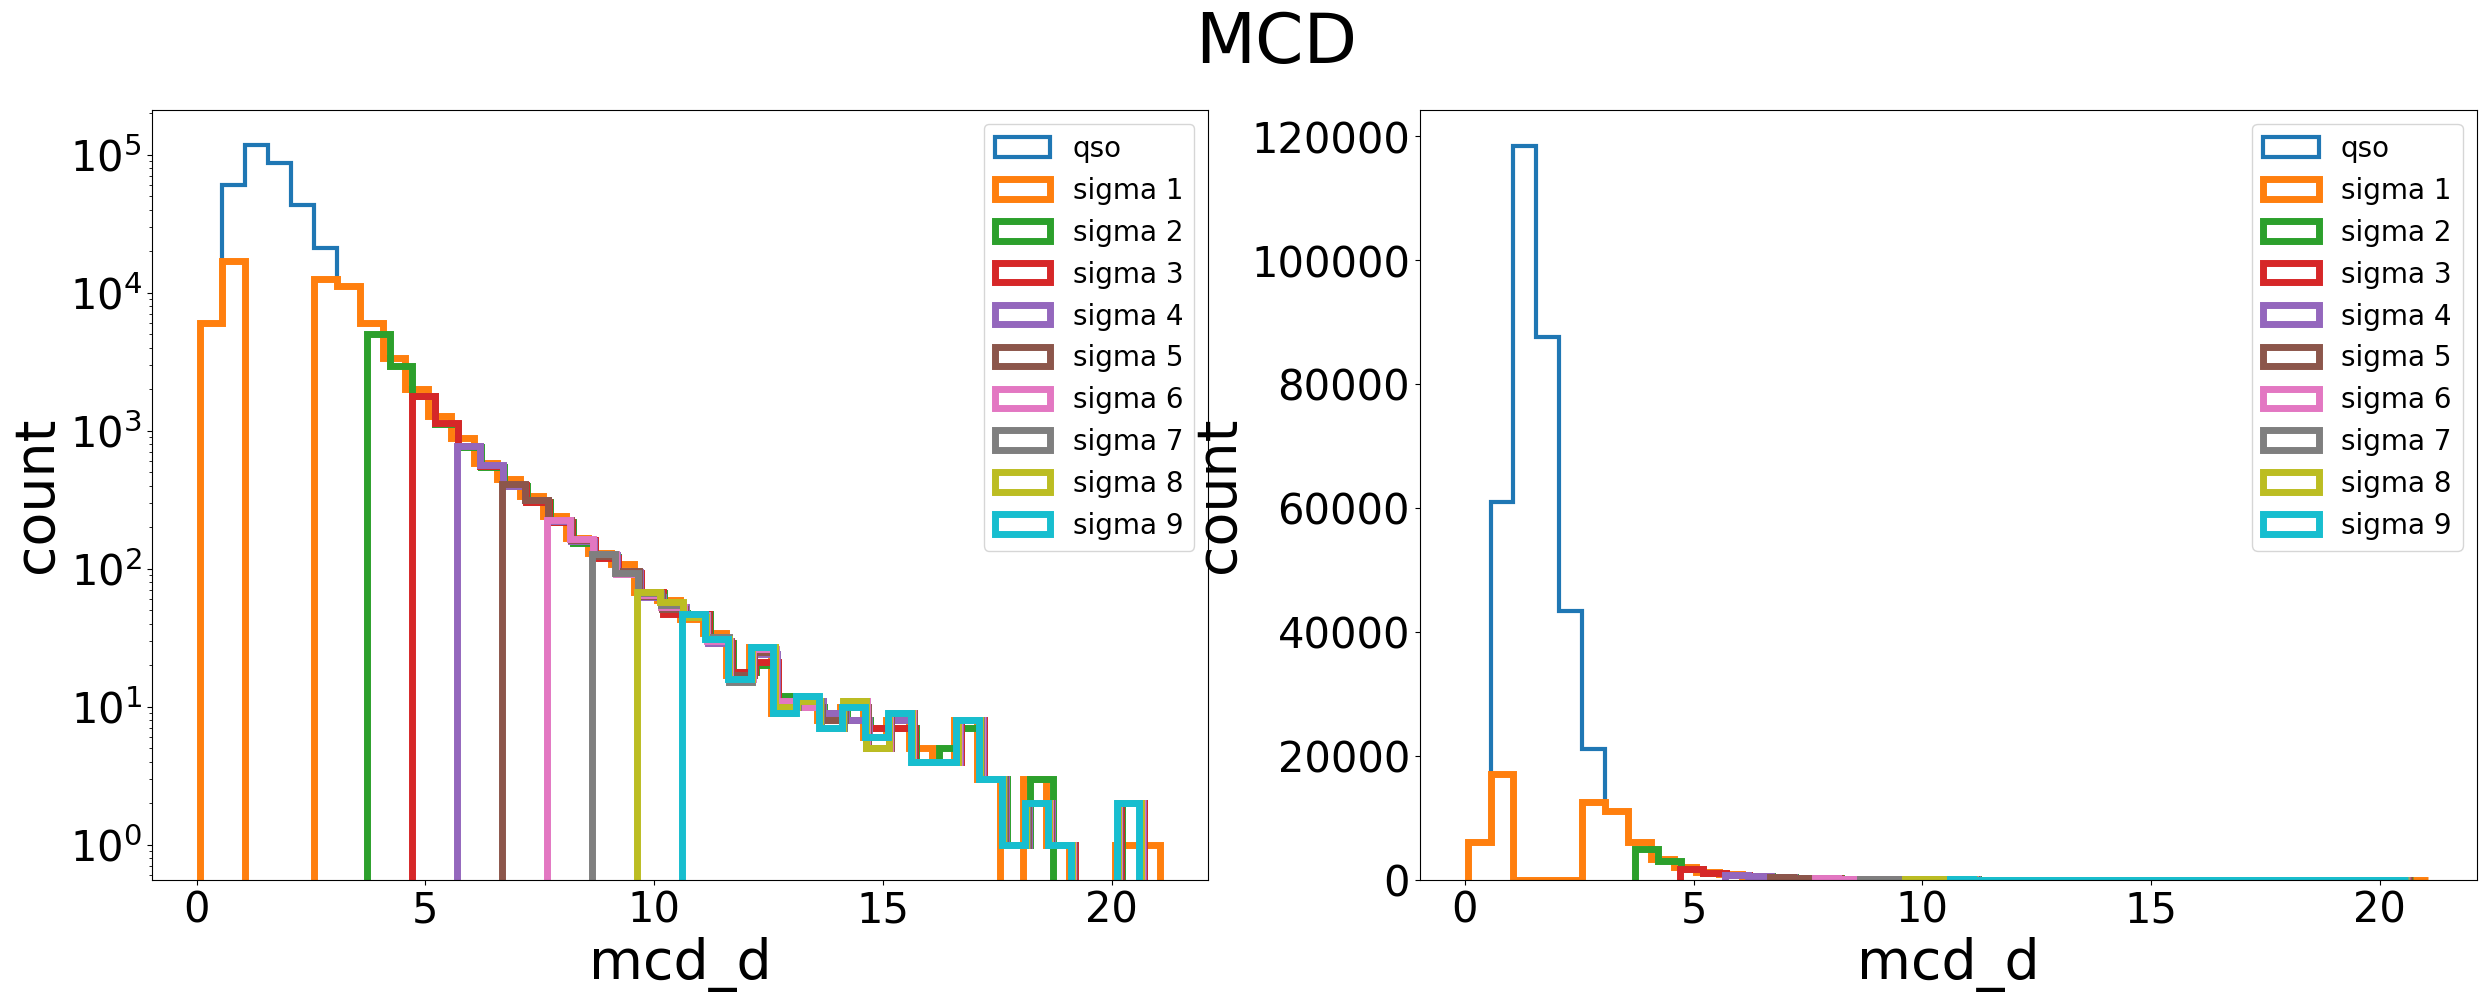

In [35]:
fig=plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
fig.suptitle("MCD", fontsize=50)       

binwidth = 0.5

Histlog(ax1,data_mcd["mcd_d"],'mcd_d',"qso",
        bins=bins_(data_mcd["mcd_d"],binwidth),                        
        histtype='step', fill=config.picture["hist"]["fill"], lw=3)
for i in range(1,10,1):
    Histlog(ax1,data_mcd_cut_mass[i]["mcd_d"],'mcd_d',f"sigma {i}",
            bins=bins_(data_mcd_cut_mass[i]["mcd_d"],binwidth),            
            histtype='step', fill=config.picture["hist"]["fill"], lw=5)    
ax1.legend(prop={'size': 20})

Hist(ax2,data_mcd["mcd_d"],'mcd_d',"qso",
    bins = bins_(data_mcd["mcd_d"],binwidth),
    histtype='step', fill=config.picture["hist"]["fill"], lw=3)
for i in range(1,10,1):
    Hist(ax2,data_mcd_cut_mass[i]["mcd_d"],'mcd_d', f"sigma {i}",
        bins = bins_(data_mcd_cut_mass[i]["mcd_d"],binwidth),
        histtype='step', fill=config.picture["hist"]["fill"], lw=5)    
ax2.legend(prop={'size': 20})

fig.set_size_inches(30,10)
#fig.savefig(f"{config.path_pic}/hist/{config.name_sample}_{class_name}_{col}_hist.png")
#fig.show()
plt.show()
#plt.close(fig)

<b>mcd_d</b> gauss distribution | sigma step histogram on <b>fuzzy_dist</b>

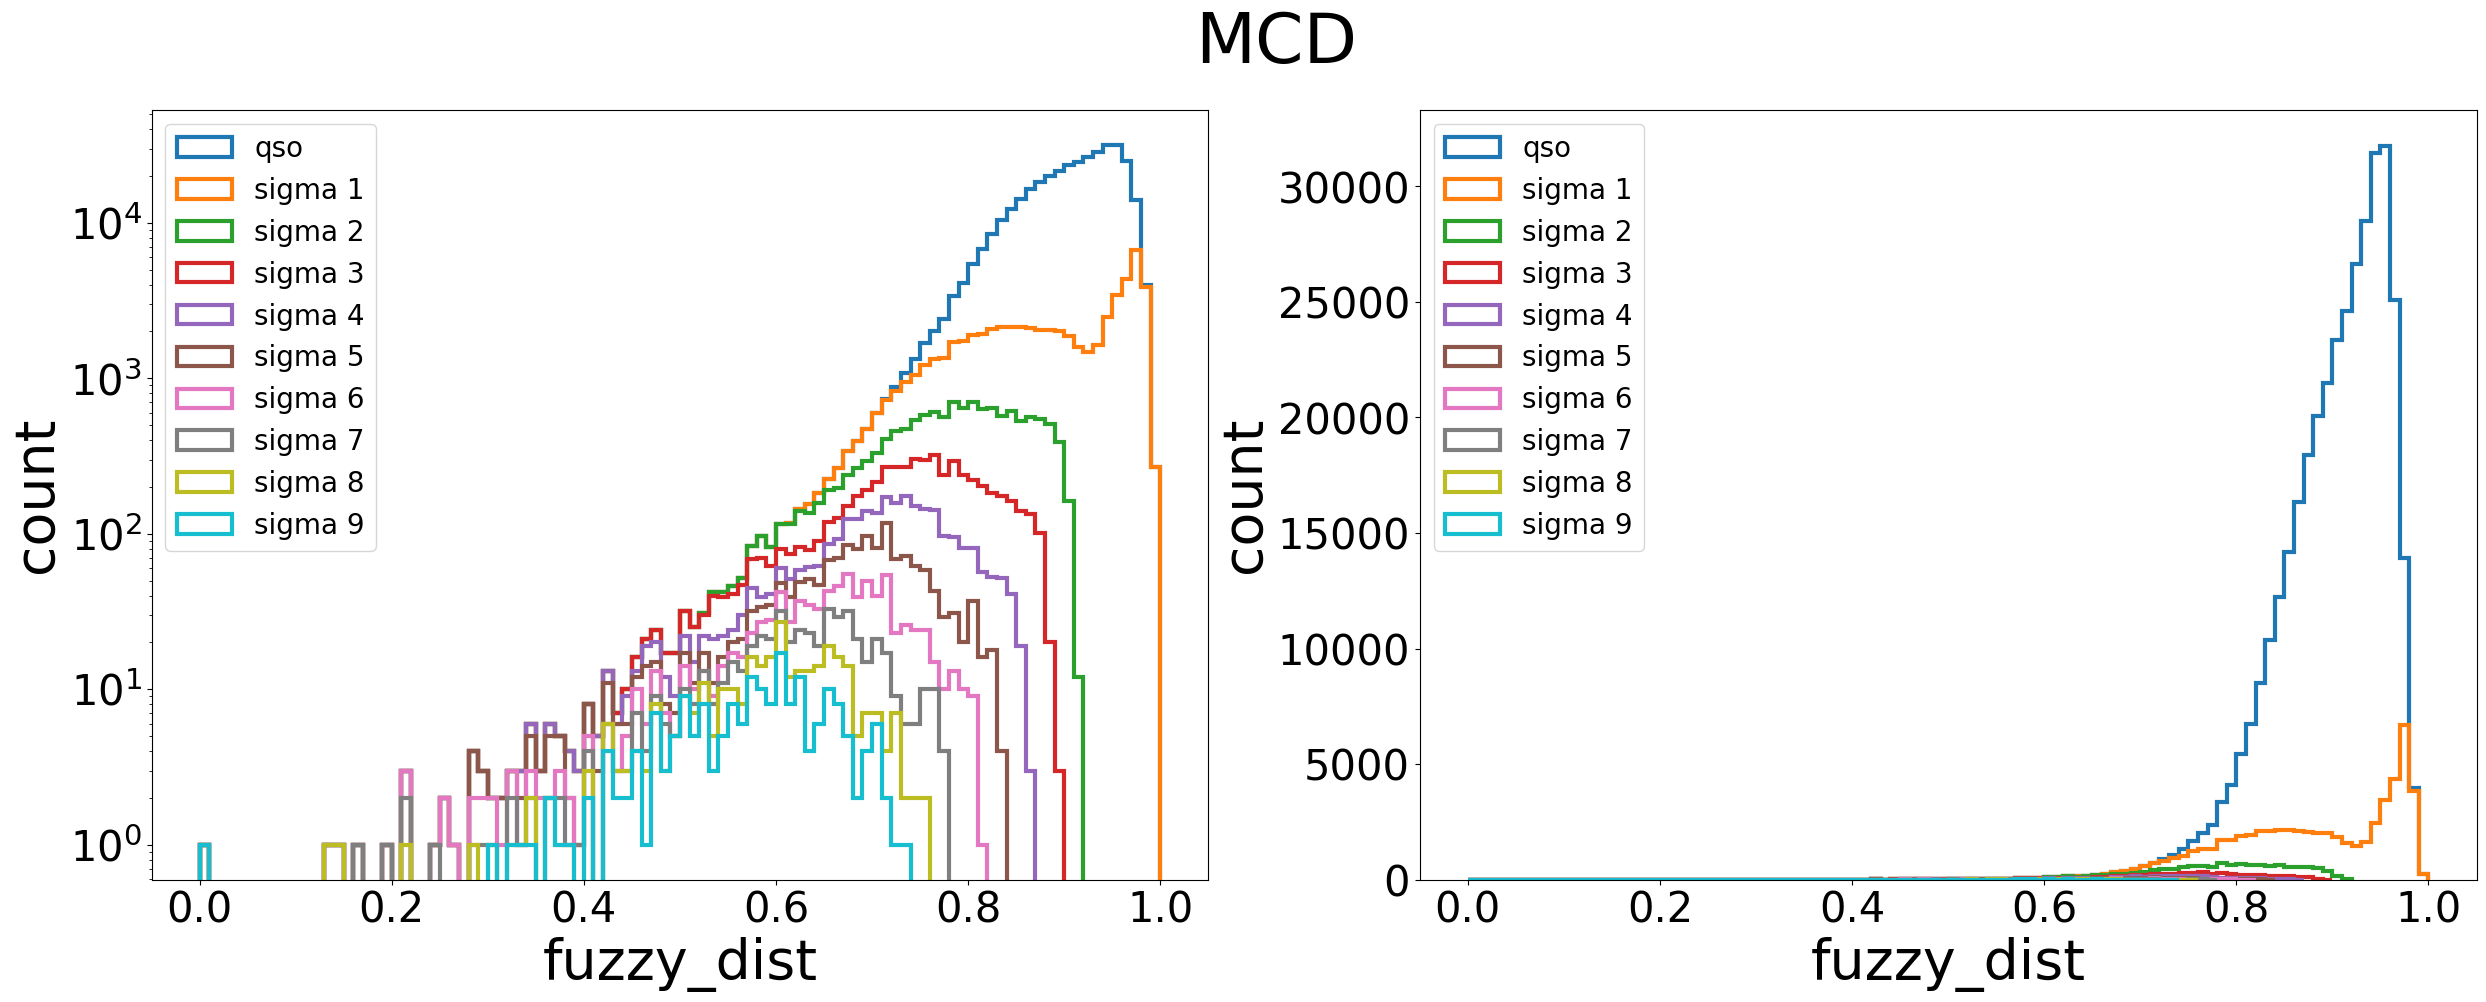

In [40]:
fig=plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
fig.suptitle("MCD", fontsize=50)

binwidth = 0.01

Histlog(ax1,data_mcd["fuzzy_dist"],'fuzzy_dist',"qso", 
        bins = bins_(data_mcd["fuzzy_dist"],binwidth),
        histtype='step', fill=config.picture["hist"]["fill"], lw=3)
for i in range(1,10,1):
    Histlog(ax1,data_mcd_cut_mass[i]["fuzzy_dist"],'fuzzy_dist',f"sigma {i}", 
            bins = bins_(data_mcd_cut_mass[i]["fuzzy_dist"],binwidth),
            histtype='step', fill=config.picture["hist"]["fill"], lw=3)    
ax1.legend(prop={'size': 20})

Hist(ax2,data_mcd["fuzzy_dist"],'fuzzy_dist',"qso", 
    bins = bins_(data_mcd["fuzzy_dist"],binwidth), 
    histtype='step', fill=config.picture["hist"]["fill"], lw=3)
for i in range(1,10,1):
    Hist(ax2,data_mcd_cut_mass[i]["fuzzy_dist"],'fuzzy_dist',f"sigma {i}", 
        bins = bins_(data_mcd_cut_mass[i]["fuzzy_dist"],binwidth), 
        histtype='step', fill=config.picture["hist"]["fill"], lw=3)    
ax2.legend(prop={'size': 20})

fig.set_size_inches(30,10)
#fig.savefig(f"{config.path_pic}/hist/{config.name_sample}_{class_name}_{col}_hist.png")
#fig.show()
plt.show()
#plt.close(fig)

<b>fuzzy_dist</b> gauss distribution

In [ ]:
fuzz_data = abs(data_mcd.loc[:,"fuzzy_dist"] - 1)

m = fuzz_data.mean()
sigma = fuzz_data.std(ddof=0)

sigma_mass = np.zeros(10)
for i in range(10):
    sigma_mass[i] = gauss_func(m+sigma*i,m,sigma)

fuzz_gauss = gauss_func(fuzz_data,m,sigma)

data_fuzz_cut_mass = []
for i in range(10):
    data_fuzz_cut_mass.append(data_mcd[fuzz_gauss < sigma_mass[i]])

<b>fuzzy_dist</b> gauss distribution | sigma step histogram on <b>fuzzy_dist</b>

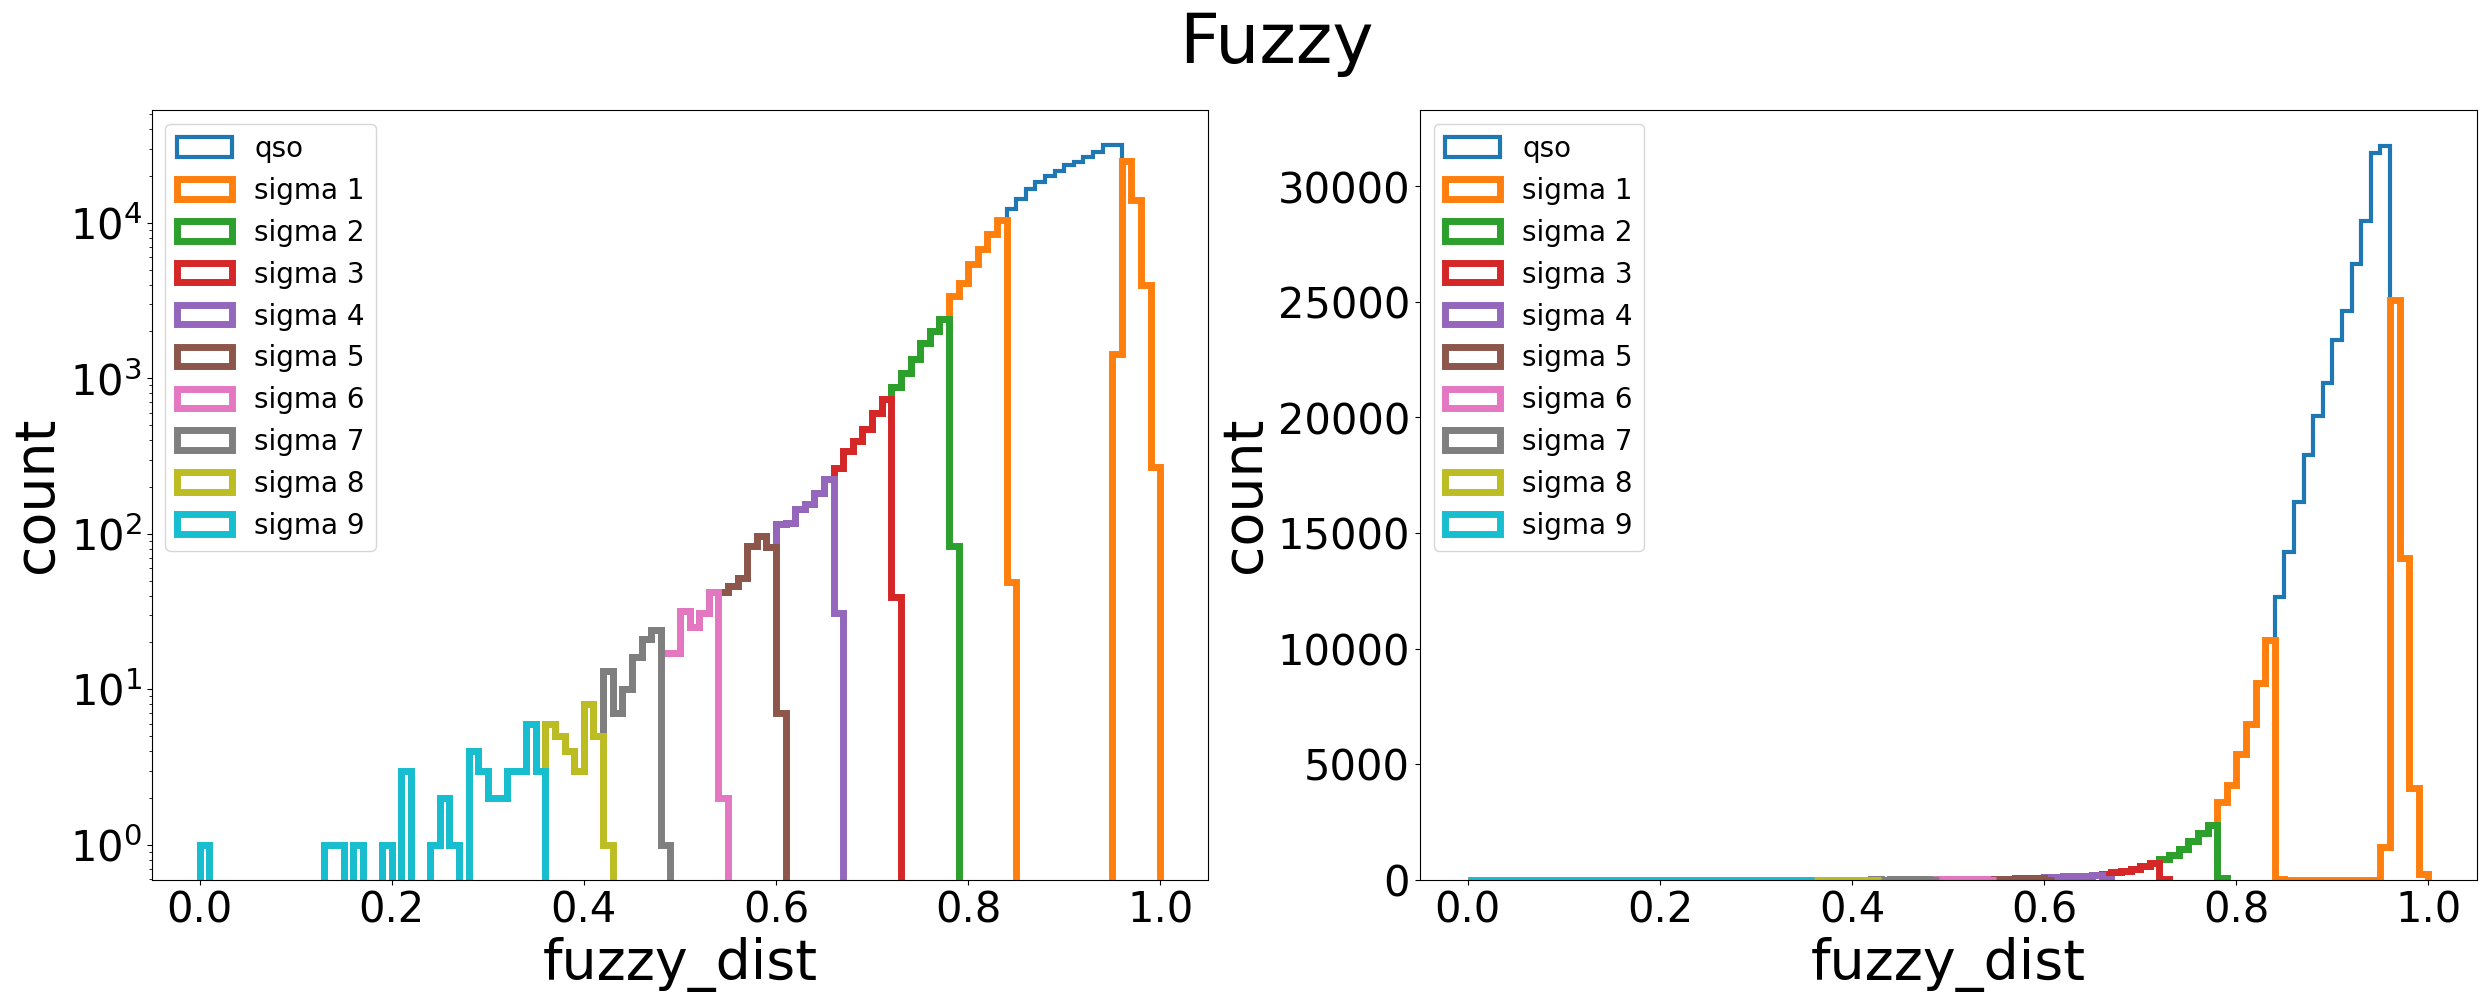

In [51]:
fig=plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
fig.suptitle("Fuzzy", fontsize=50)       
#for i, name_class in enumerate(config.name_class):
    #if(not name_class == "star"):
binwidth = 0.01

Histlog(ax1,data_mcd["fuzzy_dist"],'fuzzy_dist',"qso", 
        bins = bins_(data_mcd["fuzzy_dist"],binwidth),
        histtype='step', fill=config.picture["hist"]["fill"], lw=3)
for i in range(1,10,1):
    Histlog(ax1,data_fuzz_cut_mass[i]["fuzzy_dist"],'fuzzy_dist',f"sigma {i}", 
            bins = bins_(data_fuzz_cut_mass[i]["fuzzy_dist"],binwidth),
            histtype='step', fill=config.picture["hist"]["fill"], lw=5)    
ax1.legend(prop={'size': 20})

Hist(ax2,data_mcd["fuzzy_dist"],'fuzzy_dist',"qso", 
    bins = bins_(data_mcd["fuzzy_dist"],binwidth),
    histtype='step', fill=config.picture["hist"]["fill"], lw=3)
for i in range(1,10,1):
    Hist(ax2,data_fuzz_cut_mass[i]["fuzzy_dist"],'fuzzy_dist',f"sigma {i}", 
         bins = bins_(data_fuzz_cut_mass[i]["fuzzy_dist"],binwidth),
         histtype='step', fill=config.picture["hist"]["fill"], lw=5)    
ax2.legend(prop={'size': 20})

fig.set_size_inches(30,10)
#fig.savefig(f"{config.path_pic}/hist/{config.name_sample}_{class_name}_{col}_hist.png")
#fig.show()
plt.show()
#plt.close(fig)

<b>fuzzy_dist</b> gauss distribution | sigma step histogram on <b>mcd_d</b>

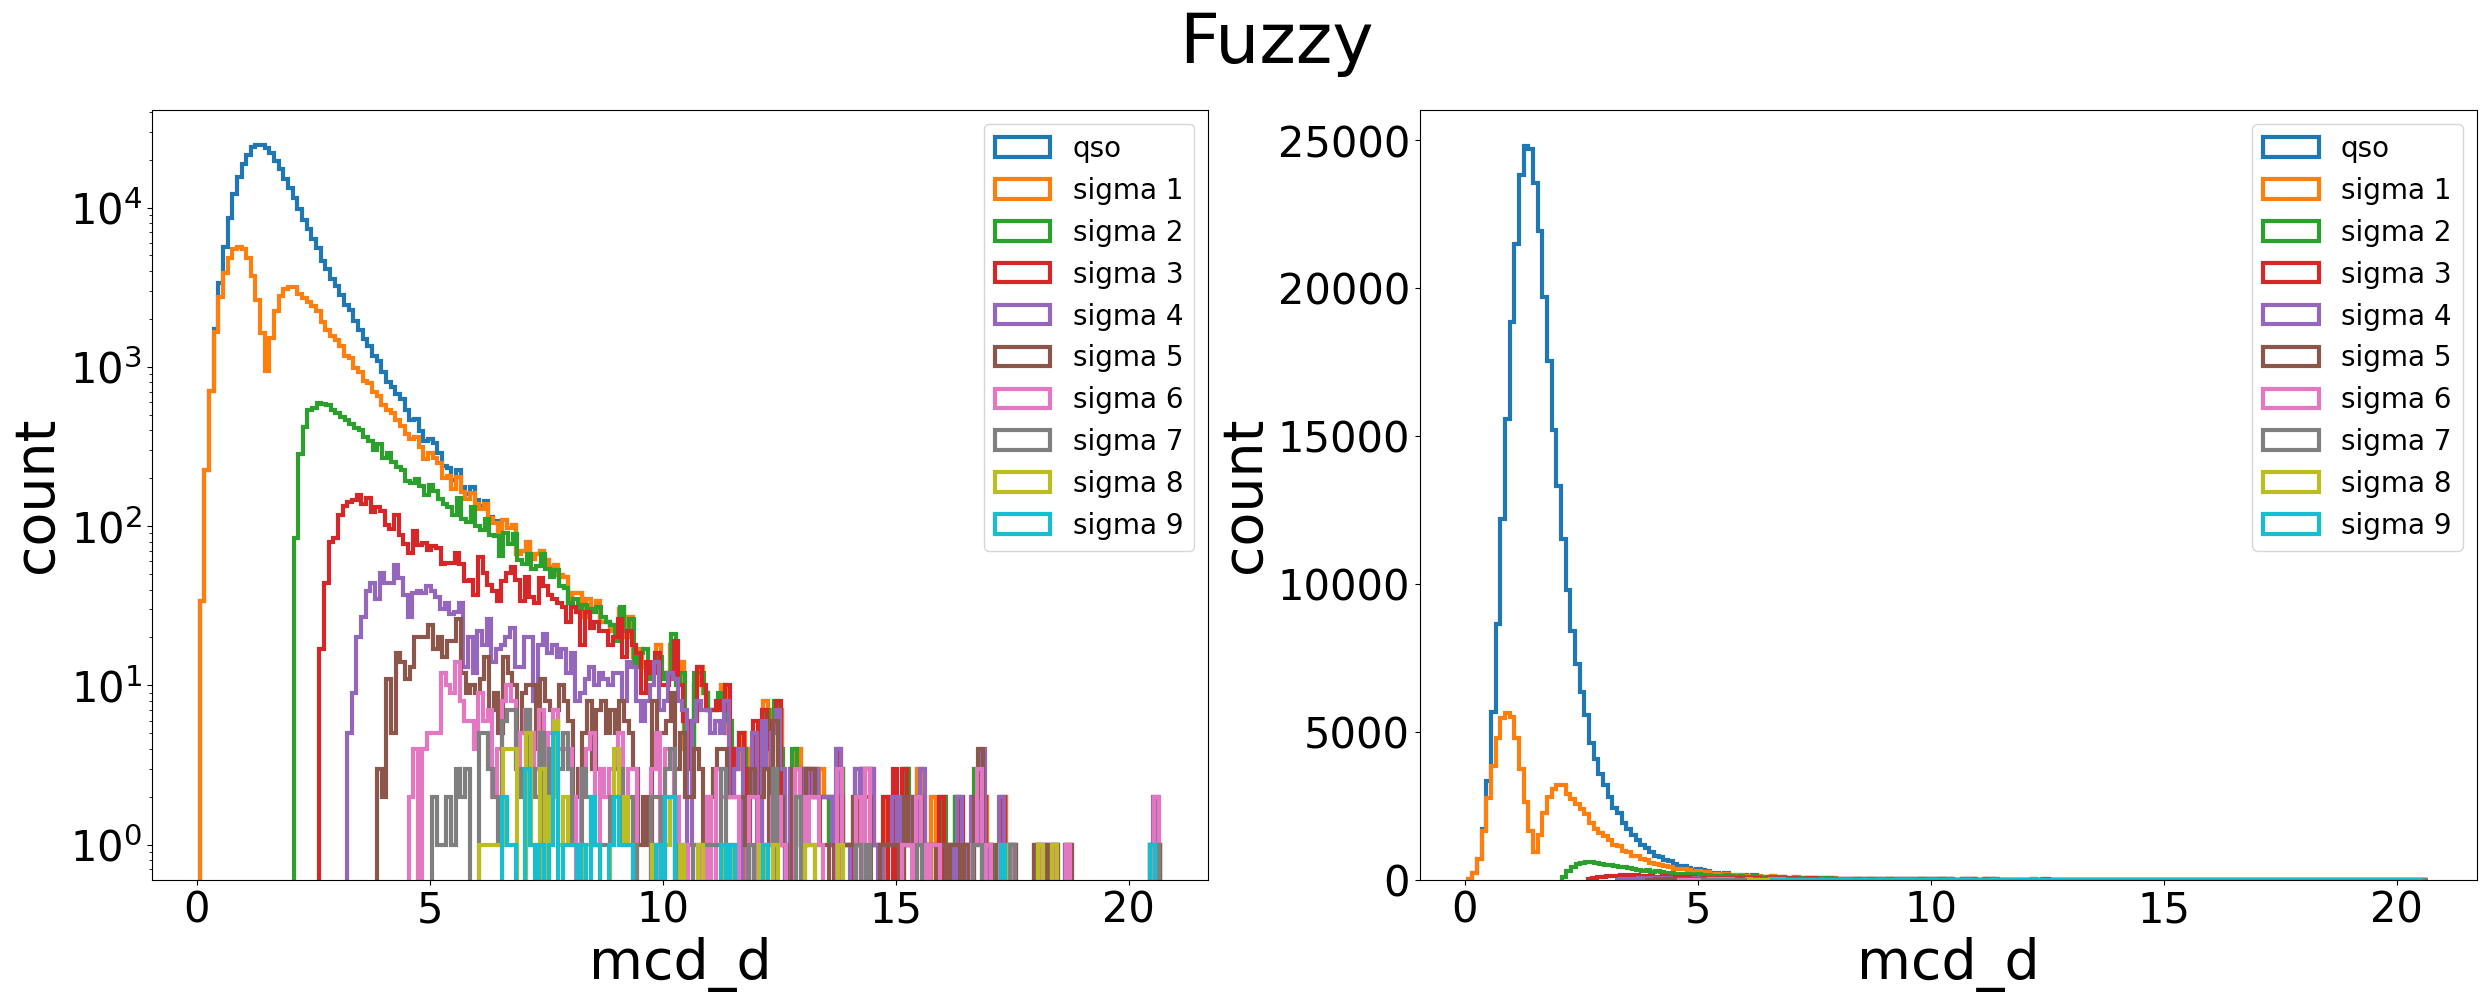

In [55]:
fig=plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
fig.suptitle("Fuzzy", fontsize=50)       

binwidth = 0.1

Histlog(ax1,data_mcd["mcd_d"],'mcd_d',"qso", 
        bins = bins_(data_mcd["mcd_d"],binwidth),
        histtype='step', fill=config.picture["hist"]["fill"], lw=3)
for i in range(1,10,1):
    Histlog(ax1,data_fuzz_cut_mass[i]["mcd_d"],'mcd_d',f"sigma {i}", 
            bins = bins_(data_fuzz_cut_mass[i]["mcd_d"],binwidth),
            histtype='step', fill=config.picture["hist"]["fill"], lw=3)    
ax1.legend(prop={'size': 20})

Hist(ax2,data_mcd["mcd_d"],'mcd_d',"qso", 
     bins = bins_(data_mcd["mcd_d"],binwidth),
     histtype='step', fill=config.picture["hist"]["fill"], lw=3)
for i in range(1,10,1):
    Hist(ax2,data_fuzz_cut_mass[i]["mcd_d"],'mcd_d',f"sigma {i}", 
        bins = bins_(data_fuzz_cut_mass[i]["mcd_d"],binwidth),
        histtype='step', fill=config.picture["hist"]["fill"], lw=3)    
ax2.legend(prop={'size': 20})

fig.set_size_inches(30,10)
#fig.savefig(f"{config.path_pic}/hist/{config.name_sample}_{class_name}_{col}_hist.png")
#fig.show()
plt.show()
#plt.close(fig)

<b>fuzzy_dist</b> & <b>mcd_d</b> gauss distribution | sigma step histogram on <b>fuzzy_err</b>

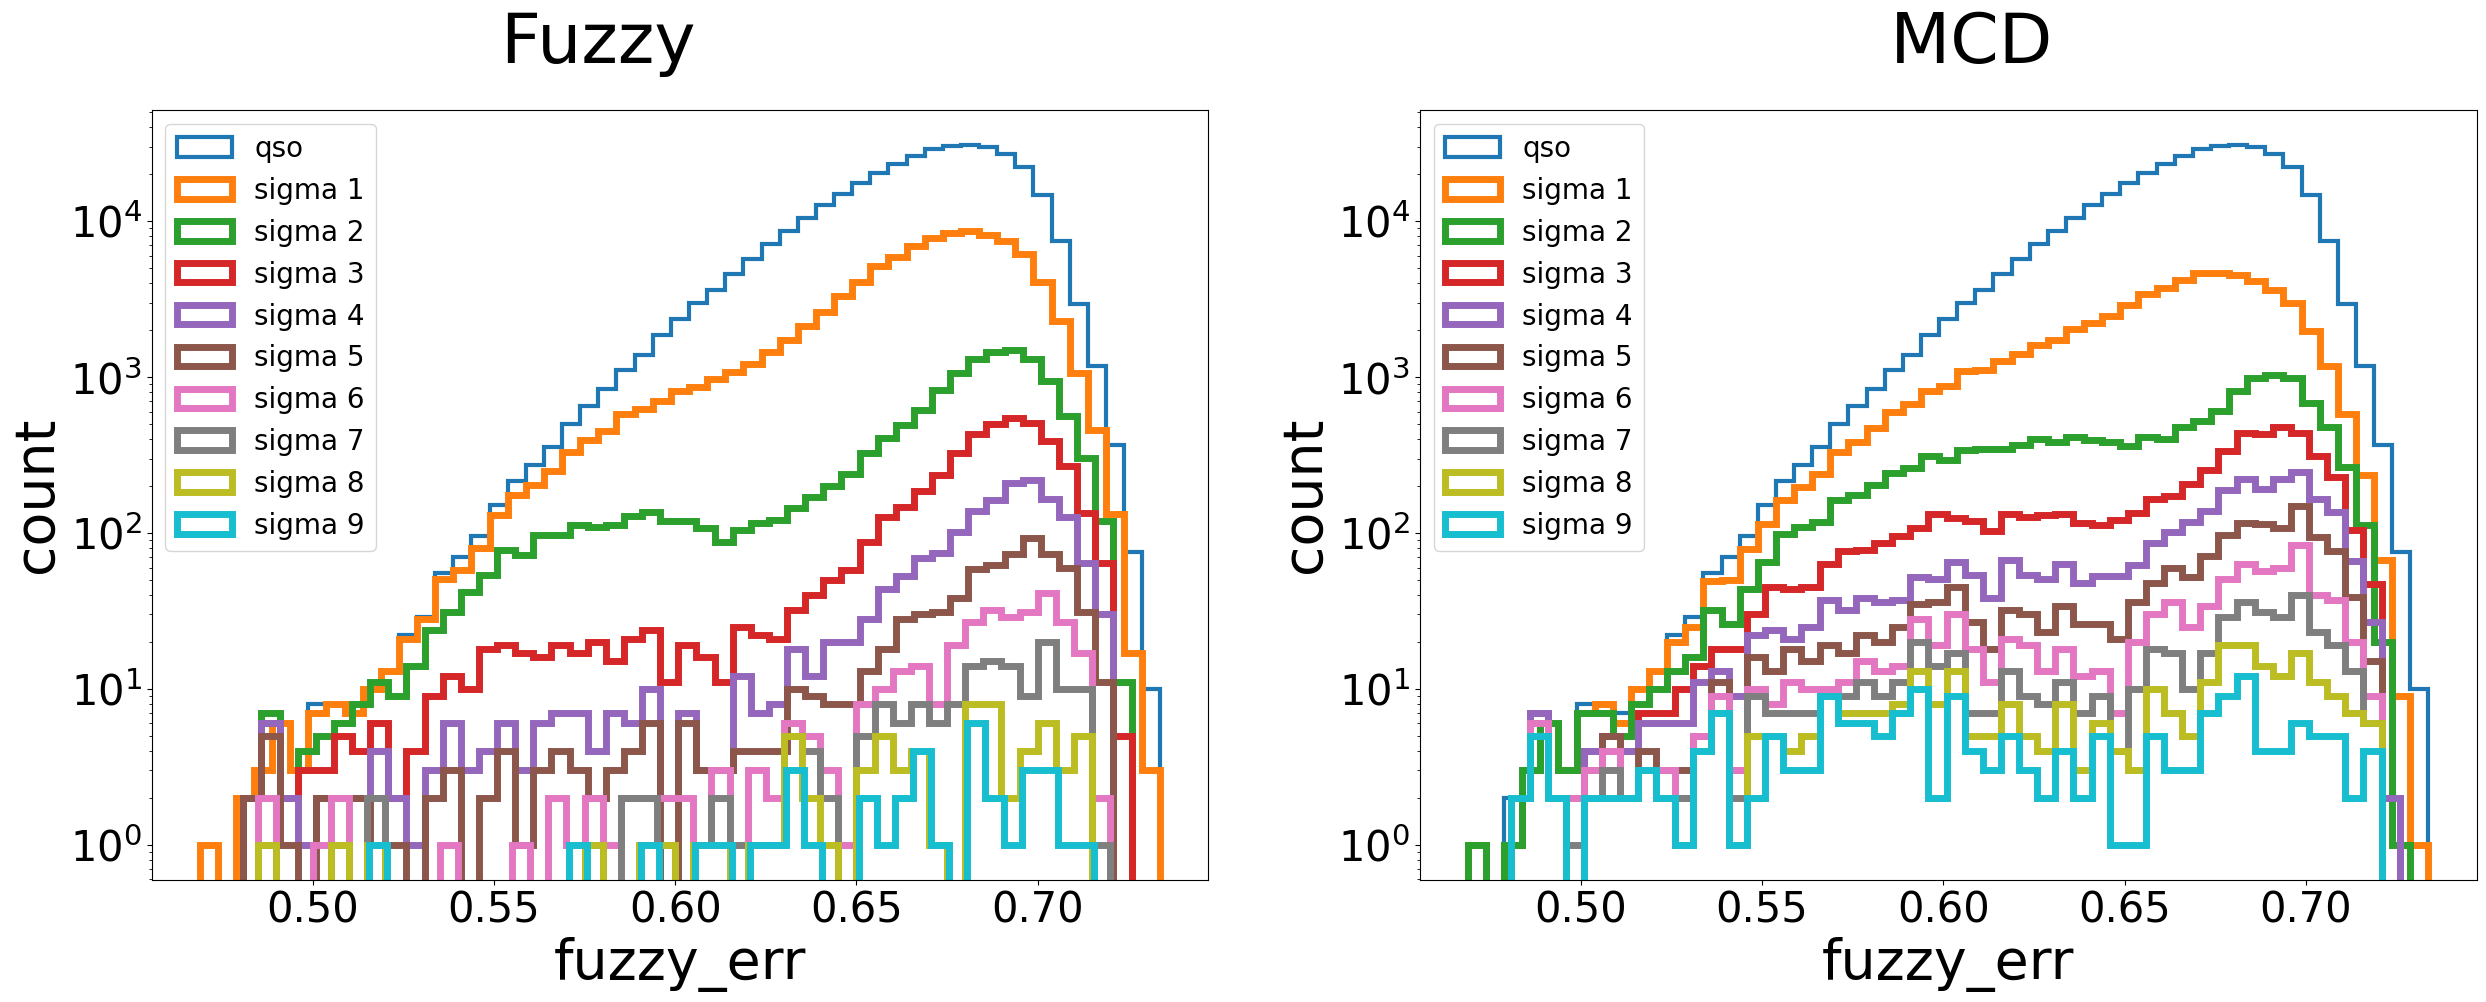

In [60]:
fig=plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
fig.suptitle("Fuzzy                                                      MCD", fontsize=50)       
#for i, name_class in enumerate(config.name_class):
    #if(not name_class == "star"):
binwidth = 0.005

Histlog(ax1,data_mcd["fuzzy_err"],'"fuzzy_err"',"qso", 
        bins = bins_(data_mcd["fuzzy_err"],binwidth),
        histtype='step', fill=config.picture["hist"]["fill"], lw=3)
for i in range(1,10,1):
    Histlog(ax1,data_fuzz_cut_mass[i]["fuzzy_err"],'fuzzy_err',f"sigma {i}", 
            bins_(data_fuzz_cut_mass[i]["fuzzy_err"],binwidth),
            histtype='step', fill=config.picture["hist"]["fill"], lw=5)    
ax1.legend(prop={'size': 20})

Histlog(ax2,data_mcd["fuzzy_err"],'fuzzy_err',"qso", 
        bins = bins_(data_mcd["fuzzy_err"],binwidth),
        histtype='step', fill=config.picture["hist"]["fill"], lw=3)
for i in range(1,10,1):
    Histlog(ax2,data_mcd_cut_mass[i]["fuzzy_err"],'fuzzy_err',f"sigma {i}", 
            bins_(data_mcd_cut_mass[i]["fuzzy_err"],binwidth),
            histtype='step', fill=config.picture["hist"]["fill"], lw=5)    
ax2.legend(prop={'size': 20})

fig.set_size_inches(30,10)
#fig.savefig(f"{config.path_pic}/hist/{config.name_sample}_{class_name}_{col}_hist.png")
#fig.show()
plt.show()
#plt.close(fig)

Basic statistic from sample

In [38]:
#data_statistic
if(config.statistic["metric"]):
    data.describe().transpose().to_csv(f'{config.path_stat}/{config.name_main_sample}_stat.log')

In [1]:
import pandas as pd
import numpy as np
import os

import json

class Config():

    def __init__(self,fconfig):
        config = json.load(fconfig)
        self.name_main_sample = config['name_sample']
        self.name_sample = config['name_sample'] + config['additional_name']
        self.general_path = config['general_path']
        self.data_path = config['data_path']
        self.prediction_path = config['prediction_path']
        self.test_path = config['test_path'] ############
        self.flags = config['flags']
        self.hyperparam = config['hyperparam']
        self.features = config['features']
        self.name_class = config['name_class']
        self.name_class_column = config["name_class_column"]
        self.base = config["base"]
        self.picture = config['picture']
        self.statistic = config['statistic']
        #
        self.path_ml_data = f'{self.general_path}/ml/data'
        self.path_ml = f'{self.general_path}/ml'
        self.path_sample = f'{self.general_path}/sample'
        self.path_pic = f'{self.general_path}/ml/picture'
        self.path_stat = f'{self.general_path}/statistic'
        #
        self.path_model = f"{self.path_ml}/model/mod_{self.name_sample}"
        self.path_weight = f"{self.path_ml}/model/weight_{self.name_sample}"
        self.path_eval = f"{self.path_ml}/eval/{self.name_sample}"
        self.path_predict = f"{self.path_ml}/prediction/{self.name_sample}"
        #
        columns = []
        columns_prob = []
        for col in self.name_class:
            columns.append(f"{col}_cls")
            columns_prob.append(f"{col}_cls_prob")
        self.name_class_cls = columns
        self.name_class_prob = columns_prob

<h1>Read config (dup)</h1>

In [158]:
fconfig = open('config_agn_sdss_c.json')
config_cbt = Config(fconfig)
fconfig.close()
del fconfig

fconfig = open('config_agn_sdss.json')
config_cbf = Config(fconfig)
fconfig.close()
del fconfig


<h1>Read data (dup)</h1>

In [156]:
from data_process import data_preparation

def select_data(config):
    #data = pd.DataFrame()
    #data preparation
    if(not config.flags['data_preprocessing']['work']):
        if(os.path.isfile(f'{config.path_ml_data}/{config.name_main_sample}_all.csv')):
            data = pd.read_csv(f'{config.path_ml_data}/{config.name_main_sample}_all.csv', header = 0, sep = ',')
        else:
            data = data_preparation(config.path_ml_data,config.path_sample,config.name_class,config)
    else:
        data = data_preparation(config.path_ml_data,config.path_sample,config.name_class,config)
    
    return data

In [122]:
data

RA        DEC         z     z_err   angDist  angDist.1   
0      251.827110  20.200372  0.115354  0.000028  0.030303   0.138046  \
1      141.549250  41.631594  1.138170  0.000443  0.121704   0.073535   
2       95.530869  -0.809528  0.000233  0.000005  0.049109   0.227537   
3      331.128910  21.820291 -0.000217  0.000011  0.041747   0.157691   
4      189.761280   7.107970  0.160179  0.000015  0.088381   0.254740   
...           ...        ...       ...       ...       ...        ...   
96331  125.883290  45.292969  0.171708  0.000007  0.092753   0.274260   
96332  251.608690  34.994652 -0.000244  0.000007  0.080912   0.083234   
96333  322.009740   0.019939  0.051971  0.000006  0.233083   0.217843   
96334  241.576570  54.930858 -0.000155  0.000007  0.230241   0.245534   
96335  167.389080  28.500960  0.074576  0.000012  0.167285   0.046991   

           PQSO      PGal       PSS  nW1  ...     mcd_d     mcd_g  fuzzy_err   
0      0.000000  0.039126  0.957413   12  ...  0.882374  0.275316   0.687209  \
1      0.008547  0.000171  0.989797   12  ...  1.680293  0.411247   0.651426   
2      0.000000  0.000000  0.999991   12  ...  2.379717  0.229896   0.707559   
3      0.000000  0.000000  0.999990   12  ...  1.395187  0.290248   0.639507   
4      0.000000  1.000000  0.000000   12  ...  1.081847  0.329161   0.682550   
...         ...       ...       ...  ...  ...       ...       ...        ...   
96331  0.000000  1.000000  0.000000   11  ...  1.348914  0.410013   0.674255   
96332  0.000000  0.000000  0.999977   12  ...  1.400993  0.290286   0.693111   
96333  0.000000  1.000000  0.000000   12  ...  1.918231  0.468507   0.661796   
96334  0.000000  0.000000  0.999979   13  ...  0.401803  0.218189   0.691557   
96335  0.000982  0.038839  0.960128   12  ...  1.040616  0.315354   0.619674   

       fuzzy_dist  qso_cls  agn_cls  sbg_cls  sfg_cls  gal_cls  star_cls  
0        0.818188        0        0        0        0        1         0  
1        0.741110        1        0        0        0        0         0  
2        0.576679        0        0        0        0        0         1  
3        0.909349        0        0        0        0        0         1  
4        0.767979        0        0        0        1        0         0  
...           ...      ...      ...      ...      ...      ...       ...  
96331    0.876414        0        0        0        1        0         0  
96332    0.793113        0        0        0        0        0         1  
96333    0.637165        0        0        0        1        0         0  
96334    0.944406        0        0        0        0        0         1  
96335    0.759409        0        0        0        1        0         0  

[96336 rows x 70 columns]

<h1>Machine Learning</h1>

In [148]:
from network import NN
from data_process import data_preparation, get_features

#network training
def network(data,config):
    #features from config
    #name from config
    print('Sample name: ', config.name_sample)
    print('Features: ', config.features["data"])
    
    #hyperparams from config
    batch_size = config.hyperparam['batch_size']
    num_ep = config.hyperparam['num_ep']
    optimizer = config.hyperparam['optimizer']
    loss = config.hyperparam['loss']
    validation_split = config.hyperparam['validation_split']
    
    #balanced class
    class_weights = None
    if(config.hyperparam["model_variable"]["balanced"]):
        from sklearn.utils import class_weight
        y = np.zeros(data.shape[0])
        cl = np.array(data[config.name_class_cls].values)
        #print(cl)
        for i in range(data.shape[0]):
            y[i] = np.argmax(cl[i,:])
        class_weights = dict(enumerate(class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(y),y = y)))
        print("class weights",class_weights)
        del y, cl

    print(data)

    print("Features mode list:\t",config.features["train"])
    features = get_features(config.features["train"],config)
    print("Features train values:\t",features)
    
    #sample_weight
    sample_weight = None
    if(config.hyperparam["model_variable"]["sample_weight"] in config.flags['data_preprocessing']['main_sample']['weight']['method']):
        #sample_weight = data[config.hyperparam["model_variable"]["sample_weight"]].values
        sample_weight = data[config.hyperparam["model_variable"]["sample_weight"]].values.T[0]
        print(sample_weight)

    try:
        data[features]
    except:
        raise Exception("data don't have initiated features, check config.features['train'] value and WARNINGs above")

    if(config.hyperparam["model_variable"]["work"]):
        NN(data[features],data[config.name_class_cls],data['z'],sample_weight,validation_split,batch_size,num_ep,optimizer,loss,class_weights,
        output_path_predict = config.path_predict,
        output_path_mod = config.path_model,
        output_path_weight = config.path_weight,
        path_save_eval = config.path_eval,
        config=config)

In [157]:
data_cbf = select_data(config_cbf)
data_cbt = select_data(config_cbt)

data_cbt.shape[0], data_cbf.shape[0]

(               RA        DEC         z     z_err   angDist  angDist.1   
 0      251.827110  20.200372  0.115354  0.000028  0.030303   0.138046  \
 1      141.549250  41.631594  1.138170  0.000443  0.121704   0.073535   
 2       95.530869  -0.809528  0.000233  0.000005  0.049109   0.227537   
 3      331.128910  21.820291 -0.000217  0.000011  0.041747   0.157691   
 4      189.761280   7.107970  0.160179  0.000015  0.088381   0.254740   
 ...           ...        ...       ...       ...       ...        ...   
 96331  125.883290  45.292969  0.171708  0.000007  0.092753   0.274260   
 96332  251.608690  34.994652 -0.000244  0.000007  0.080912   0.083234   
 96333  322.009740   0.019939  0.051971  0.000006  0.233083   0.217843   
 96334  241.576570  54.930858 -0.000155  0.000007  0.230241   0.245534   
 96335  167.389080  28.500960  0.074576  0.000012  0.167285   0.046991   
 
            PQSO      PGal       PSS  nW1  ...     mcd_d     mcd_g  fuzzy_err   
 0      0.000000  0.039126  0

In [159]:
network(data_cbf,config_cbf)

Sample name:  sdss_diploma_sample_dereddedcut_rangecut_flux_color_mcdcut_cbalancedfalse_wbalanced_e200_v02_arelu_erecall_ldropout
Features:  {'astrometry': ['angDist', 'PQSO', 'PGal', 'PSS'], 'flux': ['nW1', 'FW1pm', 'e_FW1pm', 'nW2', 'FW2pm', 'e_FW2pm', 'o_Gmag', 'FG', 'e_FG', 'o_BPmag', 'FBP', 'e_FBP', 'o_RPmag', 'FRP', 'e_FRP'], 'photometry': ['W1mproPM', 'e_W1mproPM', 'W2mproPM', 'e_W2mproPM', 'Gmag', 'e_Gmag', 'BPmag', 'e_BPmag', 'RPmag', 'e_RPmag']}
class weights {0: 0.5069758293997523, 1: 11.318292227204783, 2: 8.05632397925256, 3: 2.162741294361269, 4: 0.48256051706374076, 5: 0.7810146982980918}
                 RA        DEC         z     z_err   angDist  angDist.1   
0        239.177460  27.055966  0.090353  0.000027  0.086462   0.171325  \
1        169.268150   4.427474  1.170077  0.000150  0.032336   0.068488   
2         43.250305  -3.342976  0.244153  0.000030  0.200110   0.594563   
3        172.780700  45.426833  1.229971  0.000552  0.045566   0.092679   
4        150.1

/home/lrikozavr/miniconda3/envs/tf-cpu/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[-0.75288541 -0.49443537 -0.97258873 ... -0.63412704 -0.65268884
  -0.013099  ]
 [-0.78177684 -0.59260613 -0.98386738 ... -0.55214675 -0.7224196
  -0.28301785]
 [ 0.43515218 -0.11573451 -0.38797231 ... -0.00516418  0.22802337
   0.44492984]
 ...
 [-0.64905585 -0.31337115 -0.94405901 ... -0.55240435 -0.74645459
  -0.32549518]
 [-0.87339733 -0.84372244 -0.56105746 ... -0.21176337  0.06729105
   0.52412807]
 [-0.90452894 -0.94951486 -0.99624935 ... -0.60359489 -0.66316417
  -0.08594722]]
binary label:	 [0 1 0 ... 0 0 0]
raw scores:	 [ 415.63726165 1748.96559922 1433.57946811 ... 1027.10339608 -674.00339773
  582.6012115 ]
test data outlier label:	 [0 0 0 ... 0 0 0]
        var_FW1pm  var_FW2pm    var_FG   var_FBP   var_FRP  W1mproPM&W2mproPM   
0        0.044007   0.039464  0.194908  0.305975  0.287900           0.026678  \
1        0.066851   0.069732  0.124584  0.269904  0.211321           1.077247   
2        0.078700   0.079469  0.255789  0.351250  0.253482           0.237886   
3   

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0

gpu
model compiled
Epoch 1/200
639/639 [==============================] - 2s 3ms/step - loss: 0.7692 - tp: 591505.0000 - fp: 47367.0000 - tn: 4041478.0000 - fn: 226264.0000 - accuracy: 0.9442 - precision: 0.9259 - recall: 0.7233 - auc: 0.9755 - prc: 0.9161 - weighted_accuracy: 0.6644 - val_loss: 0.3579 - val_tp: 133027.0000 - val_fp: 6133.0000 - val_tn: 811637.0000 - val_fn: 30527.0000 - val_accuracy: 0.9626 - val_precision: 0.9559 - val_recall: 0.8134 - val_auc: 0.9881 - val_prc: 0.9570 - val_weighted_accuracy: 0.8850
Epoch 2/200
639/639 [==============================] - 1s 2ms/step - loss: 0.6044 - tp: 518527.0000 - fp: 36965.0000 - tn: 3234110.0000 - fn: 135688.0000 - accuracy: 0.9560 - precision: 0.9335 - recall: 0.7926 - auc: 0.9848 - prc: 0.9450 - weighted_accuracy: 0.7410 - val_loss: 0.2920 - val_tp: 142275.0000 - val_fp: 7531.0000 - val_tn: 810239.0000 - val_fn: 21279.0000 - val_accuracy: 0.9706 - val_precision: 0.9497 - val_recall: 0.8699 - val_auc: 0.9923 - val_prc: 0.9708 -

/home/lrikozavr/miniconda3/envs/tf-cpu/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[-0.75288541 -0.4563288  -0.97258873 ... -0.64533622 -0.65268884
  -0.00892046]
 [-0.78177684 -0.55569315 -0.98386738 ... -0.56338238 -0.7224196
  -0.27906309]
 [ 0.43515218 -0.07302357 -0.38797231 ... -0.01657636  0.22802337
   0.44948811]
 ...
 [-0.54494211 -0.33181509 -0.83023723 ... -0.55765797 -0.75401011
  -0.34570206]
 [-0.87339733 -0.80986261 -0.56105746 ... -0.22310887  0.06729105
   0.528752  ]
 [-0.90452894 -0.91694128 -0.99624935 ... -0.61481392 -0.66316417
  -0.08182907]]
binary label:	 [0 1 1 ... 0 0 0]
raw scores:	 [ 380.60910984 1605.28514113 1545.82167504 ... -911.38417544 -611.99881545
  545.81771232]
test data outlier label:	 [0 0 0 ... 0 0 0]
        var_FW1pm  var_FW2pm    var_FG   var_FBP   var_FRP  W1mproPM&W2mproPM   
272590   0.042452   0.057735  0.404561  0.233621  0.155339           0.245297  \
272591   0.056847   0.083510  0.280827  0.467274  0.132405           0.146605   
272592   0.058272   0.117444  0.027997  0.217268  0.059343           0.034949   
2725

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0

gpu
model compiled
Epoch 1/200
639/639 [==============================] - 2s 3ms/step - loss: 0.7883 - tp: 592235.0000 - fp: 55228.0000 - tn: 4033617.0000 - fn: 225534.0000 - accuracy: 0.9428 - precision: 0.9147 - recall: 0.7242 - auc: 0.9744 - prc: 0.9124 - weighted_accuracy: 0.6575 - val_loss: 0.3579 - val_tp: 133095.0000 - val_fp: 6564.0000 - val_tn: 811206.0000 - val_fn: 30459.0000 - val_accuracy: 0.9623 - val_precision: 0.9530 - val_recall: 0.8138 - val_auc: 0.9880 - val_prc: 0.9564 - val_weighted_accuracy: 0.8841
Epoch 2/200
639/639 [==============================] - 1s 2ms/step - loss: 0.6137 - tp: 516107.0000 - fp: 39549.0000 - tn: 3231526.0000 - fn: 138108.0000 - accuracy: 0.9547 - precision: 0.9288 - recall: 0.7889 - auc: 0.9841 - prc: 0.9423 - weighted_accuracy: 0.7362 - val_loss: 0.3293 - val_tp: 137886.0000 - val_fp: 7824.0000 - val_tn: 809946.0000 - val_fn: 25668.0000 - val_accuracy: 0.9659 - val_precision: 0.9463 - val_recall: 0.8431 - val_auc: 0.9898 - val_prc: 0.9626 -

/home/lrikozavr/miniconda3/envs/tf-cpu/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[-0.93137935 -0.86347021 -0.31456344 ...  0.45369447  0.30917901
  -0.18531836]
 [-0.94963373 -0.91662557 -0.26466103 ...  0.23329731  0.35939274
   0.28537155]
 [-0.88780202 -0.71972816 -0.98952934 ... -0.56320197 -0.7268664
  -0.22749495]
 ...
 [-0.57544729 -0.33181509 -0.77845124 ... -0.55765797 -0.75822813
  -0.29189791]
 [-0.90496733 -0.80986261 -0.42717424 ... -0.22310887  0.06486798
   0.56415358]
 [-0.93619987 -0.91694128 -0.99509545 ... -0.61481392 -0.66718365
  -0.03357804]]
binary label:	 [0 0 1 ... 0 0 0]
raw scores:	 [-351.85714942 -162.14362809 1906.6620783  ... -929.58265713 -650.38184022
  551.31602256]
test data outlier label:	 [0 1 0 ... 0 0 0]
        var_FW1pm  var_FW2pm    var_FG   var_FBP   var_FRP  W1mproPM&W2mproPM   
545180   0.058088   0.063384  0.176650  0.358629  0.163304           0.258623  \
545181   0.038773   0.030107  0.422081  0.101489  0.045325           0.080988   
545182   0.076366   0.148499  0.013208  0.045829  0.041054          -0.093654   
5451

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0

gpu
model compiled
Epoch 1/200
639/639 [==============================] - 2s 3ms/step - loss: 0.7955 - tp: 592810.0000 - fp: 51481.0000 - tn: 4037369.0000 - fn: 224960.0000 - accuracy: 0.9437 - precision: 0.9201 - recall: 0.7249 - auc: 0.9749 - prc: 0.9143 - weighted_accuracy: 0.6555 - val_loss: 0.3553 - val_tp: 135584.0000 - val_fp: 8284.0000 - val_tn: 809486.0000 - val_fn: 27970.0000 - val_accuracy: 0.9631 - val_precision: 0.9424 - val_recall: 0.8290 - val_auc: 0.9882 - val_prc: 0.9575 - val_weighted_accuracy: 0.8874
Epoch 2/200
639/639 [==============================] - 1s 2ms/step - loss: 0.6220 - tp: 515030.0000 - fp: 38638.0000 - tn: 3232442.0000 - fn: 139186.0000 - accuracy: 0.9547 - precision: 0.9302 - recall: 0.7872 - auc: 0.9841 - prc: 0.9426 - weighted_accuracy: 0.7318 - val_loss: 0.3822 - val_tp: 132116.0000 - val_fp: 9702.0000 - val_tn: 808068.0000 - val_fn: 31438.0000 - val_accuracy: 0.9581 - val_precision: 0.9316 - val_recall: 0.8078 - val_auc: 0.9855 - val_prc: 0.9478 -

/home/lrikozavr/miniconda3/envs/tf-cpu/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[-0.37141164 -0.6015469  -0.69958014 ...  0.08478514  0.14887174
   0.12287543]
 [-0.20497246 -0.47955193 -0.74552985 ... -0.36115869 -0.78328166
  -0.72439221]
 [-0.31661353 -0.39569348 -0.91162758 ... -0.62797042 -0.69388339
  -0.10487491]
 ...
 [-0.16404013 -0.3951003  -0.55259554 ... -0.07350283  0.12889244
   0.36330884]
 [-0.57544729 -0.47273762 -0.79717559 ... -0.56190694 -0.77990151
  -0.36947172]
 [-0.83396161 -0.87172846 -0.73256927 ... -0.46726231 -0.67928062
  -0.35887521]]
binary label:	 [0 0 0 ... 0 0 0]
raw scores:	 [-1146.77212332   822.22885519   917.67883848 ...  -580.77258933
  -976.40126816  -922.81020815]
test data outlier label:	 [1 0 1 ... 1 0 0]
         var_FW1pm  var_FW2pm    var_FG   var_FBP   var_FRP   
817770    0.077799   0.183331  0.014612  0.030066  0.028402  \
817771    0.072019   0.104230  0.255084  0.482277  0.404854   
817772    0.122529   0.277108  0.017773  0.065703  0.049971   
817773    0.108552   0.245474  0.035398  0.174884  0.127080   
817774

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0

gpu
model compiled
Epoch 1/200
852/852 [==============================] - 3s 2ms/step - loss: 0.7782 - tp: 751025.0000 - fp: 65520.0000 - tn: 5113685.0000 - fn: 284816.0000 - accuracy: 0.9436 - precision: 0.9198 - recall: 0.7250 - auc: 0.9752 - prc: 0.9148 - weighted_accuracy: 0.6652 - val_loss: 0.3526 - val_tp: 180330.0000 - val_fp: 11511.0000 - val_tn: 1078849.0000 - val_fn: 37742.0000 - val_accuracy: 0.9624 - val_precision: 0.9400 - val_recall: 0.8269 - val_auc: 0.9882 - val_prc: 0.9569 - val_weighted_accuracy: 0.8947
Epoch 2/200
852/852 [==============================] - 2s 2ms/step - loss: 0.6087 - tp: 692495.0000 - fp: 51608.0000 - tn: 4309827.0000 - fn: 179792.0000 - accuracy: 0.9558 - precision: 0.9306 - recall: 0.7939 - auc: 0.9846 - prc: 0.9438 - weighted_accuracy: 0.7403 - val_loss: 0.3354 - val_tp: 183387.0000 - val_fp: 13365.0000 - val_tn: 1076995.0000 - val_fn: 34685.0000 - val_accuracy: 0.9633 - val_precision: 0.9321 - val_recall: 0.8409 - val_auc: 0.9889 - val_prc: 0.95

/home/lrikozavr/miniconda3/envs/tf-cpu/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[-0.71420644 -0.39661207 -0.96313159 ... -0.57989471 -0.73110814
  -0.27658505]
 [-0.85548018 -0.83292287 -0.79170455 ... -0.59069986 -0.70796136
  -0.21730104]
 [-0.94642159 -0.95713854 -0.68219317 ...  0.01108554  0.1276262
   0.1837556 ]
 ...
 [-0.84921544 -0.88686886 -0.86305053 ... -0.65911492 -0.70822355
  -0.09780154]
 [-0.62980994 -0.45388579 -0.9501379  ... -0.5930837  -0.70258187
  -0.2037463 ]
 [-0.87394359 -0.92160269 -0.9074053  ... -0.54518451 -0.76101553
  -0.38956516]]
binary label:	 [1 0 0 ... 0 0 0]
raw scores:	 [ 1574.37306182 -1203.07697256 -1388.11016557 ...  -921.94050871
  1401.17373024  -450.47004017]
test data outlier label:	 [0 0 0 ... 1 0 0]
         var_FW1pm  var_FW2pm    var_FG   var_FBP   var_FRP   
0         0.044007   0.039464  0.194908  0.305975  0.287900  \
1         0.066851   0.069732  0.124584  0.269904  0.211321   
2         0.078700   0.079469  0.255789  0.351250  0.253482   
3         0.085302   0.080888  0.107218  0.415789  0.485028   
4      

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0

In [160]:
network(data_cbt,config_cbt)

Sample name:  sdss_diploma_sample_dereddedcut_rangecut_flux_color_mcdcut_cbalancedtrue_wbalanced_e200_v02_arelu_erecall_ldropout
Features:  {'astrometry': ['angDist', 'PQSO', 'PGal', 'PSS'], 'flux': ['nW1', 'FW1pm', 'e_FW1pm', 'nW2', 'FW2pm', 'e_FW2pm', 'o_Gmag', 'FG', 'e_FG', 'o_BPmag', 'FBP', 'e_FBP', 'o_RPmag', 'FRP', 'e_FRP'], 'photometry': ['W1mproPM', 'e_W1mproPM', 'W2mproPM', 'e_W2mproPM', 'Gmag', 'e_Gmag', 'BPmag', 'e_BPmag', 'RPmag', 'e_RPmag']}
class weights {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}
               RA        DEC         z     z_err   angDist  angDist.1   
0      251.827110  20.200372  0.115354  0.000028  0.030303   0.138046  \
1      141.549250  41.631594  1.138170  0.000443  0.121704   0.073535   
2       95.530869  -0.809528  0.000233  0.000005  0.049109   0.227537   
3      331.128910  21.820291 -0.000217  0.000011  0.041747   0.157691   
4      189.761280   7.107970  0.160179  0.000015  0.088381   0.254740   
...           ...        ...       ...  

/home/lrikozavr/miniconda3/envs/tf-cpu/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[-0.9127314  -0.84445176 -0.58374719 ...  0.41966536  0.35633346
  -0.16822412]
 [-0.9226956  -0.96205811 -0.91287947 ... -0.64660724 -0.65655375
  -0.0428165 ]
 [-0.91220356 -0.89758407 -0.6647116  ...  0.18390434  0.04862085
  -0.28910526]
 ...
 [-0.92041225 -0.94558443 -0.63716411 ... -0.07994036  0.02459187
   0.14399914]
 [-0.77947111 -0.80770658 -0.89186083 ... -0.57642173 -0.75484405
  -0.34376753]
 [-0.93493946 -0.96209846 -0.46962773 ... -0.06121795  0.09909093
   0.2424264 ]]
binary label:	 [0 0 0 ... 0 0 0]
raw scores:	 [-1337.39610518   -11.86272989 -1953.67461756 ... -1713.53201683
  -358.32956594 -1249.79774679]
test data outlier label:	 [0 0 1 ... 0 0 0]
       var_FW1pm  var_FW2pm    var_FG   var_FBP   var_FRP  W1mproPM&W2mproPM   
0       0.045719   0.047891  0.226247  0.135516  0.035438           0.100273  \
1       0.089271   0.114475  0.164939  0.581808  0.460549           0.724074   
2       0.054127   0.074765  0.008073  0.009386  0.009858          -0.179254   
3

/home/lrikozavr/miniconda3/envs/tf-cpu/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[-0.92615937 -0.83929392 -0.66869447 ...  0.41966536  0.37637461
  -0.11690376]
 [-0.93619352 -0.94714143 -0.93060751 ... -0.64660724 -0.651479
   0.01624147]
 [-0.91590453 -0.80852645 -0.25613807 ...  0.23962346  0.33218647
   0.14573084]
 ...
 [-0.93389414 -0.93203472 -0.71120197 ... -0.07994036  0.03973122
   0.21458359]
 [-0.5336564  -0.50894687 -0.7397683  ... -0.0992104   0.03377518
   0.24041668]
 [-0.94852334 -0.94717843 -0.57788182 ... -0.06121795  0.11533107
   0.31908379]]
binary label:	 [0 0 0 ... 0 0 0]
raw scores:	 [-1324.39988014  -136.48015445 -1403.07935072 ... -1715.32427926
 -2042.4180081  -1196.0873839 ]
test data outlier label:	 [0 0 0 ... 1 0 0]
       var_FW1pm  var_FW2pm    var_FG   var_FBP   var_FRP  W1mproPM&W2mproPM   
24084   0.059710   0.056395  0.146360  0.115200  0.151924           0.233641  \
24085   0.199732   0.236432  0.171262  0.537759  0.253430           0.902644   
24086   0.111113   0.154488  0.144864  0.778792  0.626316           0.855645   
240

/home/lrikozavr/miniconda3/envs/tf-cpu/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[-0.80096864 -0.78970183 -0.90669605 ... -0.54689887 -0.76179245
  -0.35621947]
 [-0.91676948 -0.94714143 -0.93060751 ... -0.6355765  -0.66423182
  -0.00215934]
 [-0.89568296 -0.80852645 -0.25613807 ...  0.27831687  0.30960354
   0.12975208]
 ...
 [-0.52842725 -0.52472319 -0.49574296 ... -0.04292272  0.16621619
   0.4633627 ]
 [-0.49840929 -0.50894687 -0.7397683  ... -0.07109329  0.01417438
   0.22620897]
 [-0.92958395 -0.94717843 -0.57788182 ... -0.03191495  0.09491525
   0.30634752]]
binary label:	 [0 0 0 ... 0 0 0]
raw scores:	 [ -607.19467991  -114.12183967 -1378.29074161 ...  -933.28900052
 -2015.15610444 -1241.40780897]
test data outlier label:	 [0 1 0 ... 0 0 0]
       var_FW1pm  var_FW2pm    var_FG   var_FBP   var_FRP  W1mproPM&W2mproPM   
48168   0.067316   0.107021  0.113062  0.424237  0.417868           0.318386  \
48169   0.054942   0.094386  0.008874  0.028805  0.030310          -0.103464   
48170   0.041056   0.037669  0.235527  0.219383  0.258956           0.158455   
4

/home/lrikozavr/miniconda3/envs/tf-cpu/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[-0.76602254 -0.78970183 -0.90669605 ... -0.56586232 -0.76179245
  -0.35621947]
 [-0.29470531 -0.42410781 -0.96776146 ... -0.63489121 -0.72708195
  -0.15574959]
 [-0.87736689 -0.80852645 -0.25613807 ...  0.23706623  0.30960354
   0.12975208]
 ...
 [-0.4456281  -0.52472319 -0.49574296 ... -0.07549742  0.16621619
   0.4633627 ]
 [-0.41033956 -0.50894687 -0.7397683  ... -0.10290716  0.01417438
   0.22620897]
 [-0.82180334 -0.85604749 -0.68557933 ...  0.42372444  0.42249825
  -0.01739198]]
binary label:	 [0 1 0 ... 0 0 0]
raw scores:	 [ -697.37234476  1806.18351736 -1471.73648826 ...  -940.18778496
 -2057.51318831 -1340.85957886]
test data outlier label:	 [0 0 0 ... 0 1 0]
       var_FW1pm  var_FW2pm    var_FG   var_FBP   var_FRP  W1mproPM&W2mproPM   
72252   0.043301   0.046188  0.451783  0.672767  0.346620           0.154867  \
72253   0.042743   0.034765  0.260632  0.096769  0.041161           0.027183   
72254   0.064304   0.079179  0.151557  0.120960  0.147420           0.050711   
7

/home/lrikozavr/miniconda3/envs/tf-cpu/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[-0.87326015 -0.89625868 -0.77379723 ... -0.50943048 -0.72691272
  -0.41099402]
 [-0.90492246 -0.9177989  -0.48535106 ...  0.05774595  0.25155691
   0.34213622]
 [-0.60020297 -0.63165386 -0.57524444 ... -0.53316862 -0.70358642
  -0.31973129]
 ...
 [-0.34490178 -0.30726643 -0.95992979 ... -0.59933398 -0.75291405
  -0.28377489]
 [-0.9118661  -0.94807278 -0.81573126 ...  0.05230749  0.23722432
   0.32545857]
 [-0.93415492 -0.97224593 -0.69572106 ...  0.41970539  0.63302513
   0.35865061]]
binary label:	 [0 0 0 ... 1 0 0]
raw scores:	 [ -615.883653   -1038.72477746   -40.11708716 ...  2442.36122412
 -1494.64903396   706.54894267]
test data outlier label:	 [0 0 1 ... 0 1 0]
       var_FW1pm  var_FW2pm    var_FG   var_FBP   var_FRP  W1mproPM&W2mproPM   
0       0.045719   0.047891  0.226247  0.135516  0.035438           0.100273  \
1       0.089271   0.114475  0.164939  0.581808  0.460549           0.724074   
2       0.054127   0.074765  0.008073  0.009386  0.009858          -0.179254   
3

In [124]:
config.hyperparam["model_variable"]["early_stopping"]["monitor"]

'val_recall'

In [125]:
config.name_sample

'sdss_diploma_sample_dereddedcut_rangecut_flux_color_mcdcut_cbalancedtrue_wbalanced_e200_v02_arelu_erecall_ldropout'

<h1>Metric statistic<h1>

In [13]:
#statistic
from statistic import metric_statistic
if(config.statistic["metric"]):
    metric_statistic(config)

make metrics stat
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero
mcc division by zero


In [ ]:
print(data)

In [12]:
from graphic import picture_confusion_matrix, picture_roc_prc, picture_hist, TSNE_pic, contam_dist_pic, multigridplot, picture_correlation_matrix


In [37]:
import seaborn as sns

def colnamemb(col_value):
    new_col_value = []
    for col in col_value:
        new_name = ""
        for ind, ccol in enumerate(col.split("&")):
            if(ind == 1):
                new_name += "&"
            ccol = ccol.split("mag")[0]
            if(len(ccol.split("_")) == 1):
                new_name += ccol.split("mpro")[0]
            else:
                new_name += ccol.split("_")[1].split("pm")[0]
        new_col_value.append(new_name)
    return new_col_value

def picture_correlation_matrix(data,name,config):
    #print(colnamemb(data.columns.values))
    data = pd.DataFrame(data.values, columns=colnamemb(data.columns.values))
    corr = data.corr()
    
    fig = plt.figure(figsize=(10,10))
    graph = sns.heatmap(corr,
                cmap='RdBu',
                annot=True,
                annot_kws = {'size': 8})
    #plt.yticks(rotation=60)
    plt.xticks(rotation=25)
    #plt.setp(graph.ax_heatmap.get_xticklabels(), rotation=60)
    fig.savefig(f'{config.path_pic}/{config.name_sample}_{name}_correlation_matrix.png')
    plt.close(fig)

picture_correlation_matrix(data[get_features(config.features["train"],config)],"mags",config)

['var', 'color']


In [37]:
TSNE_pic(data,config)

picture by tSNE
['var', 'color']
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 96336 samples in 0.142s...
[t-SNE] Computed neighbors for 96336 samples in 7.761s...
[t-SNE] Computed conditional probabilities for sample 1000 / 96336
[t-SNE] Computed conditional probabilities for sample 2000 / 96336
[t-SNE] Computed conditional probabilities for sample 3000 / 96336
[t-SNE] Computed conditional probabilities for sample 4000 / 96336
[t-SNE] Computed conditional probabilities for sample 5000 / 96336
[t-SNE] Computed conditional probabilities for sample 6000 / 96336
[t-SNE] Computed conditional probabilities for sample 7000 / 96336
[t-SNE] Computed conditional probabilities for sample 8000 / 96336
[t-SNE] Computed conditional probabilities for sample 9000 / 96336
[t-SNE] Computed conditional probabilities for sample 10000 / 96336
[t-SNE] Computed conditional probabilities for sample 11000 / 96336
[t-SNE] Computed conditional probabilities for sample 12000 / 96336
[t-SNE] Computed

In [ ]:
contam_dist_pic(data,config)

['var', 'color']
picture Multigrid plot: start
Features  qso_cls
Progress: |██████████████████████████████████████████████████| 100.00% 
Features  agn_cls
Progress: |██████--------------------------------------------| 12.38% 

KeyboardInterrupt: 

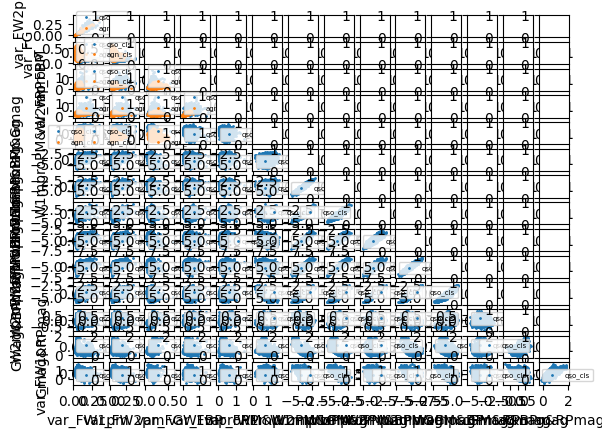

In [24]:
from data_process import get_features
multigridplot(data,get_features(config.features["train"],config),config)

In [127]:
fconfig = open('config_agn_sdss.json')
config = Config(fconfig)
fconfig.close()
del fconfig

In [21]:
picture_roc_prc(config)

/home/lrikozavr/github/extragalactic_object_locate_with_ml/export/graphic.py:612: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(f'{config.path_pic}/roc_prc/{config.name_sample}_class_kfold_summary_roc_prc.png')


picture ROC&PRC done


In [52]:
from sklearn.metrics import confusion_matrix
from network import make_custom_index

def picture_confusion_matrix(config):
    
  def plot_cm(ax,data,name):
    
    y = np.argmax(data[config.name_class_cls], axis=1).tolist()
    y_prob = np.argmax(data[config.name_class_prob], axis=1).tolist()

    cm = confusion_matrix(y, y_prob)

    new_cm = np.zeros((len(config.name_class_cls),len(config.name_class_cls)))
    for i in range(len(config.name_class_cls)):
        sum = cm[i,:].sum()
        #print(sum)
        for j in range(len(config.name_class_cls)):
            new_cm[i,j] = round(cm[i,j] / float(sum),5)*100
    new_cm = pd.DataFrame(new_cm, columns=config.name_class_cls, index=config.name_class_cls)
    #print(new_cm)
    sns.heatmap(new_cm, ax=ax, annot=True, fmt=".2f")
    ax.set_title(name)
    ax.set_ylabel('Actual label')
    ax.set_xlabel('Predicted label')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
  
  fig, axs = plt.subplots(1,2)
  fig.set_size_inches(12,6)
  
  name = make_custom_index("2",config.hyperparam["model_variable"]["neuron_count"])
  data = pd.read_csv(f'{config.path_eval}_custom_sm_{name}_prob.csv', header=0, sep=",")
  plot_cm(axs[1],data,"2nd kfold")
  #
  name = make_custom_index("00",config.hyperparam["model_variable"]["neuron_count"])
  data = pd.read_csv(f'{config.path_eval}_custom_sm_{name}_prob.csv', header=0, sep=",")
  plot_cm(axs[0],data,"main")

  fig.savefig(f'{config.path_pic}/{config.name_sample}_Confusion_matrix.png')
  plt.close(fig)
  

  print("picture Confusion Matrix done")

picture_confusion_matrix(config)

picture Confusion Matrix done


In [23]:
picture_hist(data,config)

picture Hist done


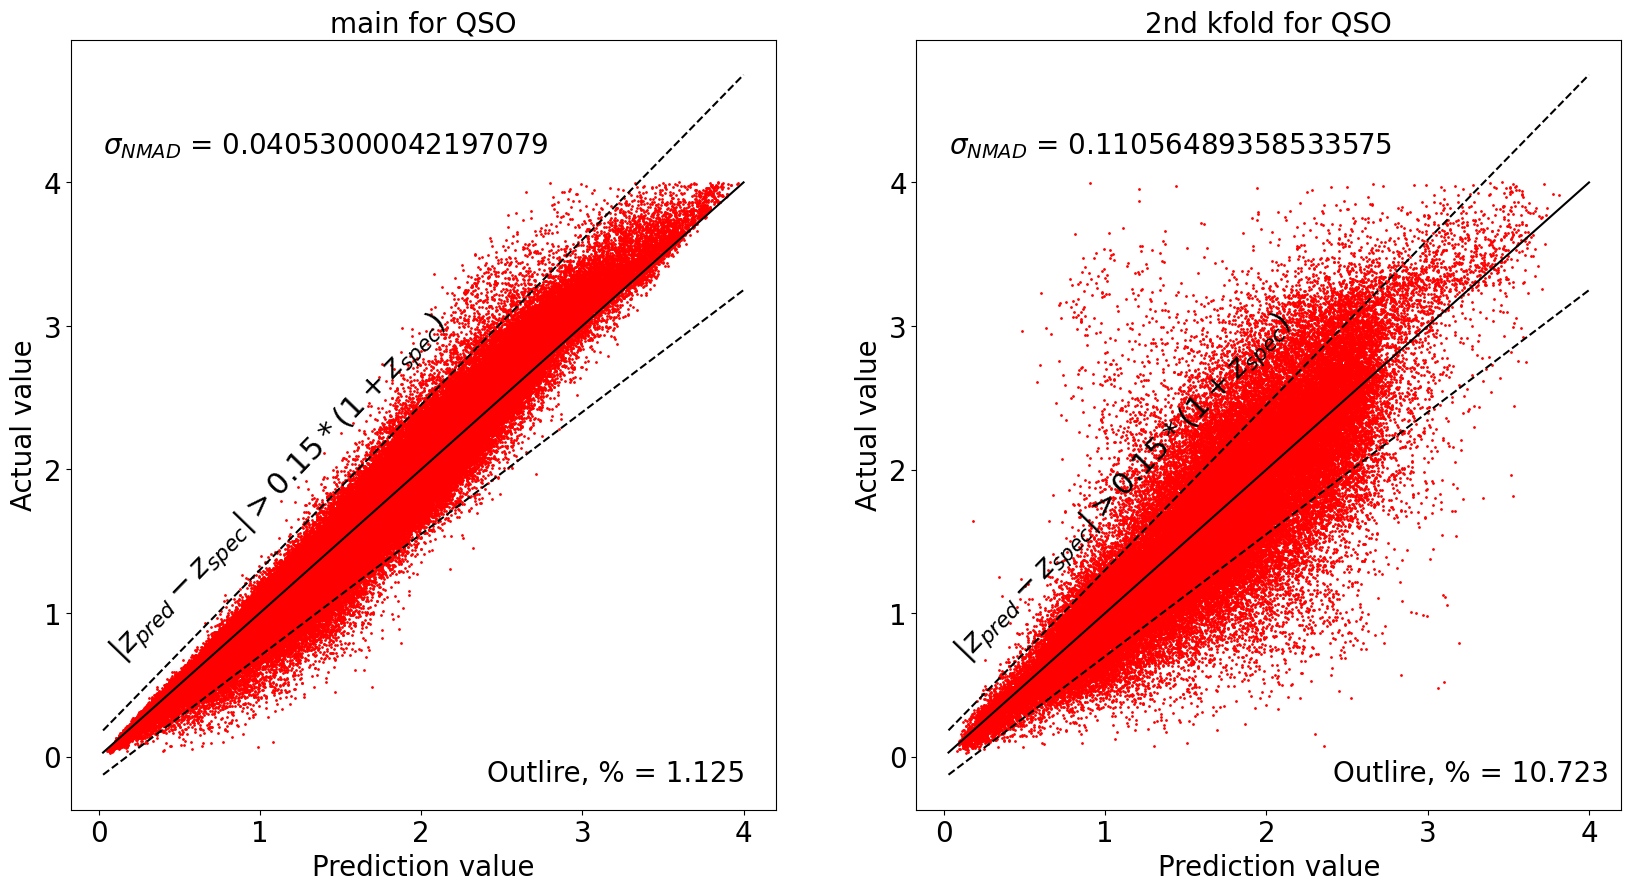

In [166]:
def redshift_estimation(config):

    def redshift_estimation_picture(ax,data,title):
        bins = 100
        data['sigma'] = abs(data['redshift_pred']-data['actual_redshift'])/(1+data["actual_redshift"])
        #https://www.aanda.org/articles/aa/full_html/2018/11/aa30763-17/aa30763-17.html#R29
        sigma_NMAD = 1.48 * data['sigma'].median(axis=0)

        min = data['actual_redshift'].min()
        max = data['actual_redshift'].max()
        #line 
        redshift_line = lambda x,sign: x + sign*0.15*(1+x)
        line_base_array = np.linspace(min,max,num=bins)
        line_value_dw_array = redshift_line(line_base_array,-1)
        line_value_up_array = redshift_line(line_base_array,1)


        ax.scatter(data['redshift_pred'],data['actual_redshift'], color='r', s=1)

        ax.plot(line_base_array, line_value_dw_array, color = 'black', linestyle="dashed")
        ax.plot(line_base_array, line_value_up_array, color = 'black', linestyle="dashed")

        ax.plot(line_base_array, line_base_array, color="black")
        
        ax.text(line_base_array[0],line_value_up_array[3] + line_value_up_array[bins//2]*0.15 ,r"$|z_{pred}-z_{spec}| > 0.15*(1 + z_{spec})$", fontsize=22, weight='bold', rotation=180*np.arctan((line_value_up_array[-1]-line_value_up_array[0])/(max-min))/np.pi - 3)
        l = r"$\sigma_{NMAD}$"
        ax.text(min,max+(max-min)*0.05,f"{l} = {sigma_NMAD}", fontsize = 20)

        count_outlire = data[(data['redshift_pred'] > redshift_line(data['actual_redshift'],1)) | (data['redshift_pred'] < redshift_line(data['actual_redshift'],-1))].shape[0]
        persent = round((count_outlire/data.shape[0])*100,3)
        ax.text((max-min)*1.2/2 + min,min-(max-min)*0.05,f"Outlire, % = {persent}", fontsize = 20)

        ax.set_title(title, fontsize=20)
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=20)

        ax.set_xlabel("Prediction value", fontsize = 20)
        ax.set_ylabel("Actual value", fontsize = 20)

    fig, ax = plt.subplots(1,2)

    fig.set_size_inches(20,10)
    
    title = ['main', '2nd kfold']

    for i, index in enumerate(['00','2']):
        name = make_custom_index(index,config.hyperparam["model_variable"]["neuron_count"])
        class_name = 'qso_cls' #config.name_class_cls:
        try:
            data = pd.read_csv(f"{config.path_eval}_{name}_{class_name}_redshift.csv", header=0, sep=",")
        except:
            raise Exception(f"redshift estimation is not defined\nplease check config.hyperparam['redshift']['work']\n{config.path_predict}_{name}_redshift.csv")
        redshift_estimation_picture(ax[i], data, f"{title[i]} for QSO")

    fig.savefig(f"{config.path_pic}/{config.name_sample}_bound_redshift.png")
    plt.show()
    plt.close(fig)

redshift_estimation(config)

<Figure size 640x480 with 0 Axes>

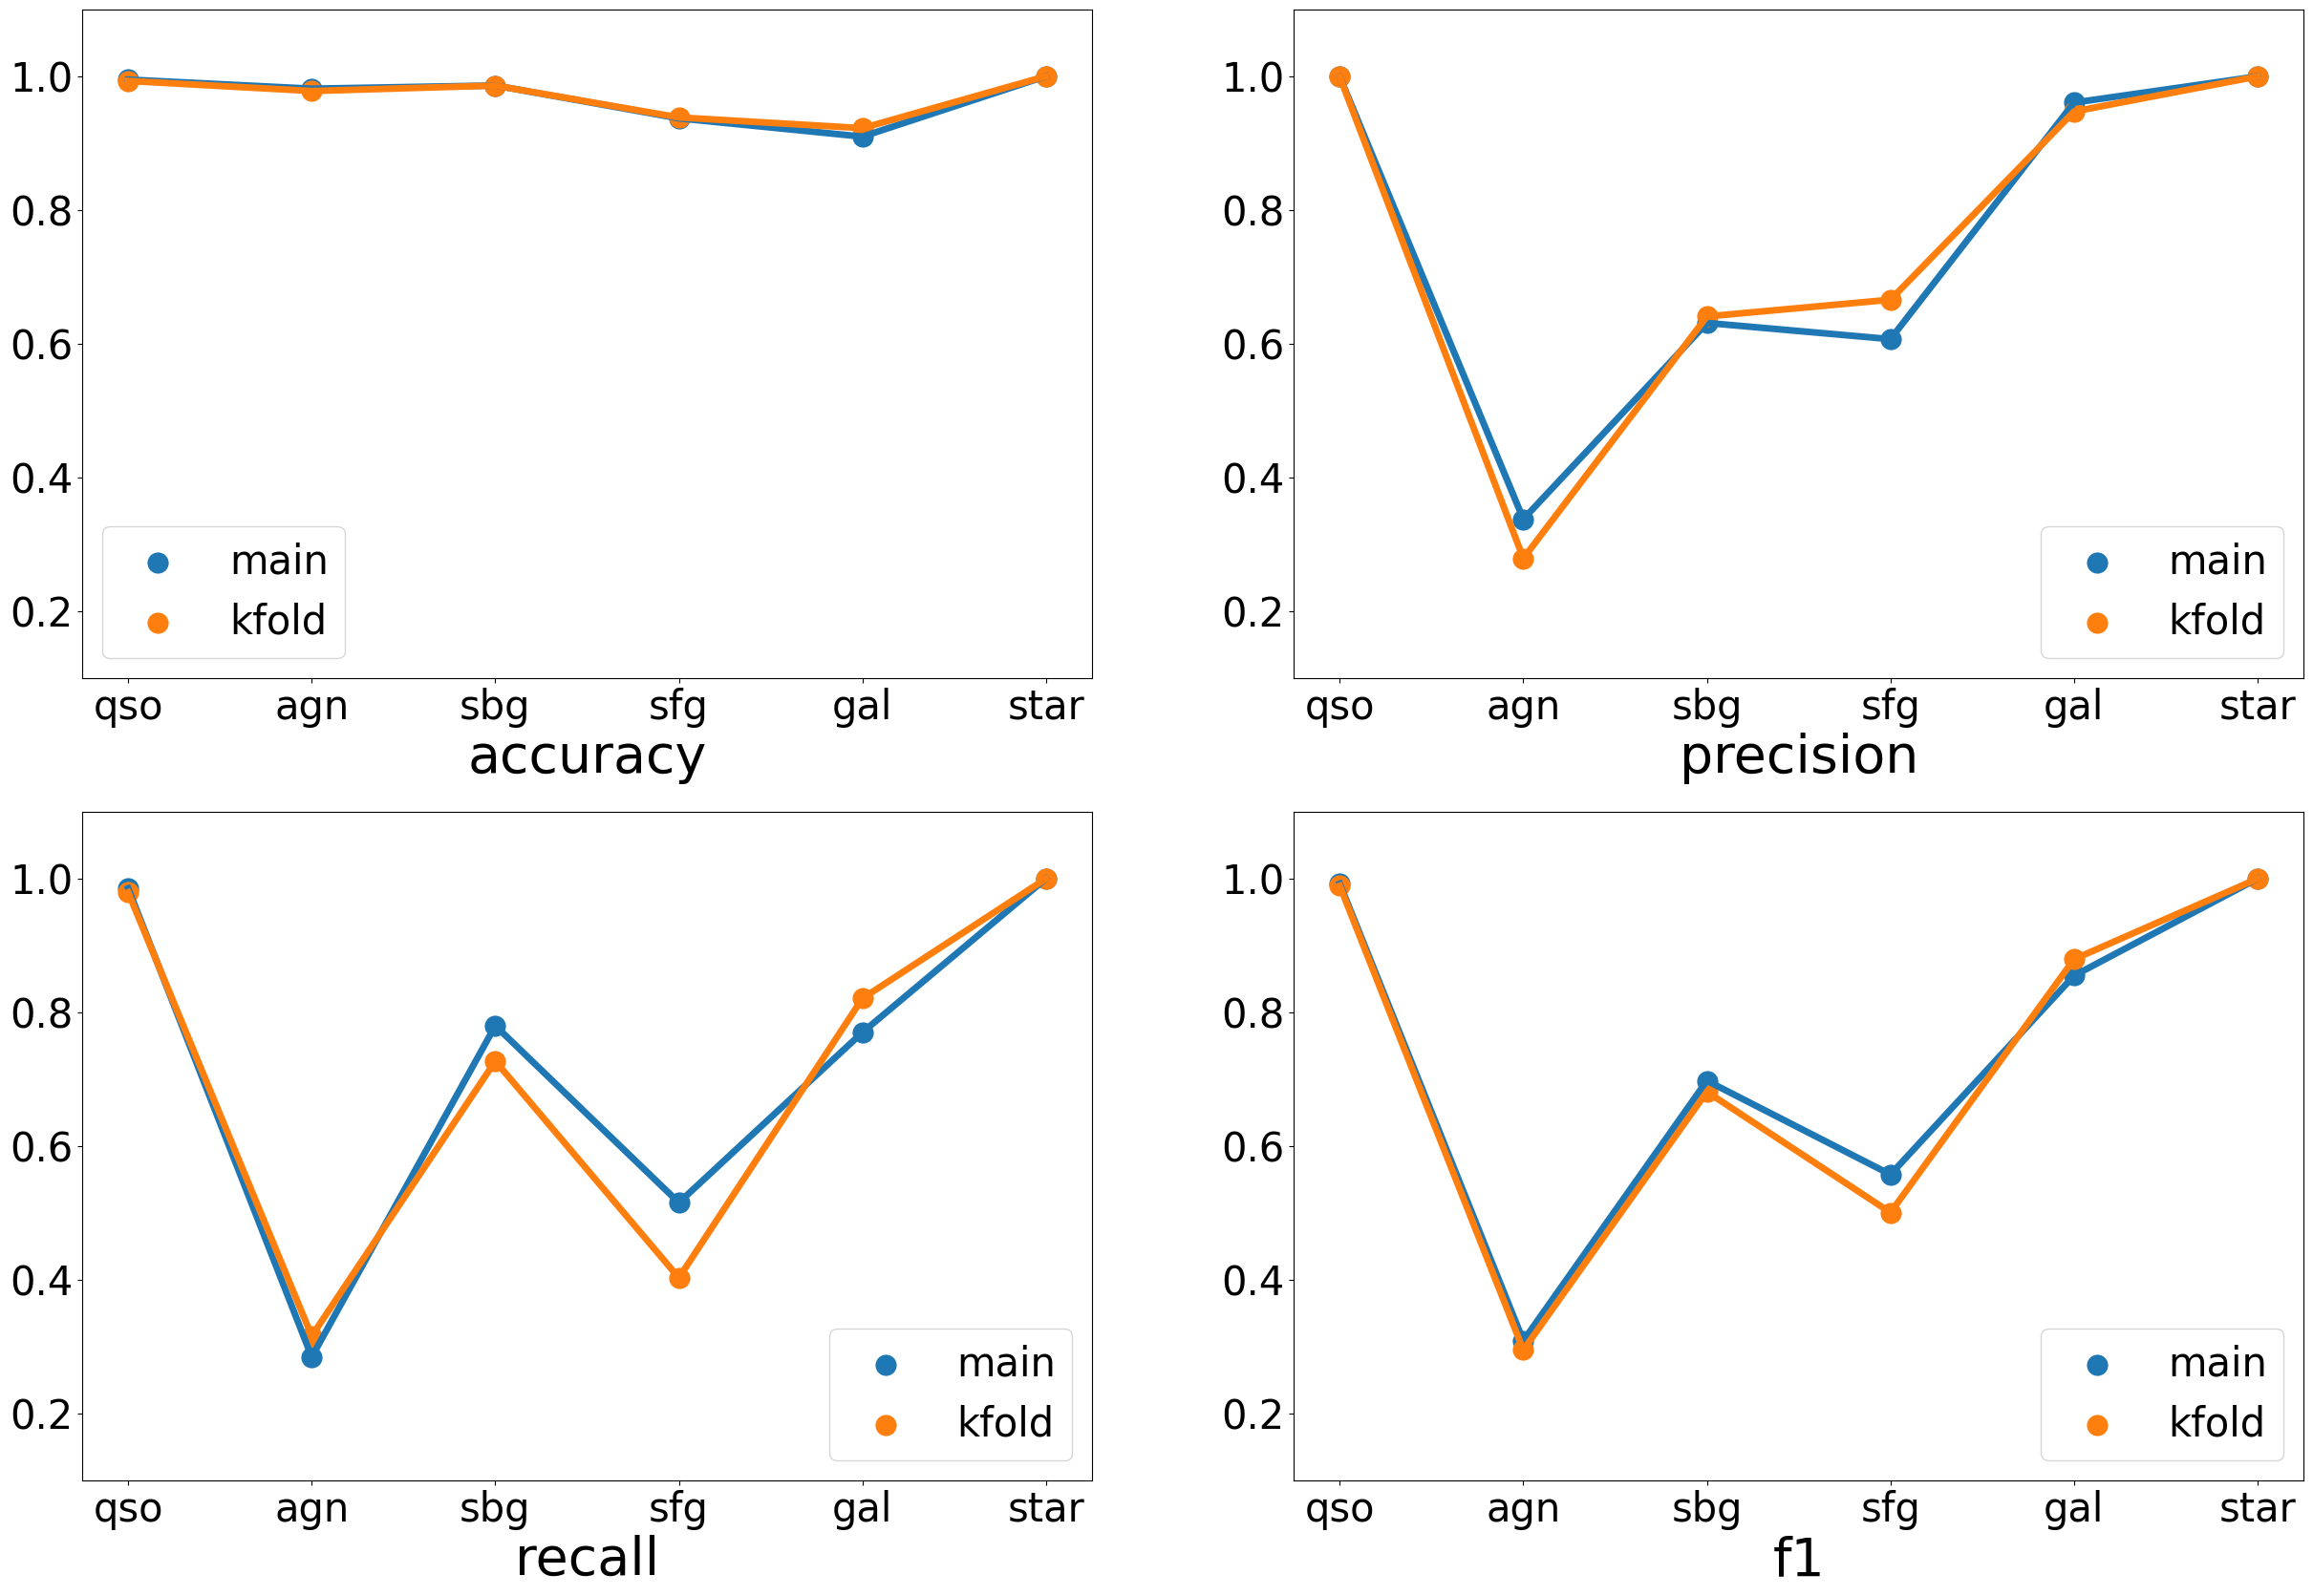

qso       agn       sbg       sfg       gal      star
accuracy   0.989556  0.979647  0.985142  0.940684  0.924773   0.99993
precision  0.999573  0.305441  0.617837  0.689815  0.946904  0.999743
recall     0.968551  0.295139  0.718817  0.407475  0.829251  0.999931
f1         0.983817  0.300202  0.664513  0.512321  0.884181  0.999837
bacc       0.984175  0.642531  0.854763  0.696152  0.902311  0.999931
k           0.97611  0.289878   0.65696  0.482959  0.828838  0.999793
mcc        0.976374  0.289922  0.658929  0.501999  0.832839  0.999793
roc        0.984175  0.642531  0.854763  0.696152  0.902311  0.999931

In [87]:
from matplotlib import pyplot as plt
'''
one_ml_cycle_kfold = pd.DataFrame(columns=config.name_class,index=['Accuracy','Purity','Completness','F1','FPR','TNR','bACC','K','MCC','BinaryBS'])
one_ml_cycle_main = pd.DataFrame(columns=config.name_class,index=['Accuracy','Purity','Completness','F1','FPR','TNR','bACC','K','MCC','BinaryBS'])

    
for i, name in enumerate(config.name_class):
    kfold_temp = pd.read_csv(f"{config.path_stat}/{config.name_sample}_{name}_kfold_summary_metric_statistic.csv", header=0, sep=",")
    one_ml_cycle_kfold.loc[:,name] = kfold_temp["mean"]
    main_temp = pd.read_csv(f"{config.path_stat}/{config.name_sample}_{name}_main_metric.csv")
    one_ml_cycle_main.loc[:,name] = main_temp.loc[0,:]
'''
index = ['accuracy','precision','recall','f1','bacc','k','MCC','BinaryBS']

fig=plt.figure()
fig, axs = plt.subplots(2,3)

for i in range(2):
    for j in range(3):

        axs[i,j].scatter([config.name_class[i] for i in range(6)],one_ml_cycle_main.loc[index[i*3+j],:],lw=10, label="main")
        axs[i,j].plot([config.name_class[i] for i in range(6)],one_ml_cycle_main.loc[index[i*3+j],:],lw=5,)
        axs[i,j].scatter([config.name_class[i] for i in range(6)],one_ml_cycle_all_kfold.loc[index[i*3+j],:],lw=10, label="kfold")
        axs[i,j].plot([config.name_class[i] for i in range(6)],one_ml_cycle_all_kfold.loc[index[i*3+j],:],lw=5)
        axs[i,j].tick_params(axis='x', labelsize=30)
        axs[i,j].tick_params(axis='y', labelsize=30)
        axs[i,j].set_xlabel(index[i*3+j],fontsize=40)
        axs[i,j].legend(prop={'size': 30})
        axs[i,j].set_ylim([0.1,1.1])

fig.set_size_inches(30,20)
plt.show()

one_ml_cycle_kfold

In [53]:
def metric_sklearn(y_actual, y_prediction: pd.DataFrame, threshold = 0.5):

    thr = lambda x: 1 if x >= threshold else 0

    from sklearn import metrics as m

    Y = y_prediction.apply(thr)

    skmetrics = lambda x,y: pd.DataFrame(np.array([m.accuracy_score(x,y),
                                        m.precision_score(x,y),
                                        m.recall_score(x,y),
                                        m.f1_score(x,y),
                                        m.balanced_accuracy_score(x,y),
                                        m.cohen_kappa_score(x,y),
                                        m.matthews_corrcoef(x,y)
                                        ,m.roc_auc_score(x,y)
                                        ]).reshape((1,8)),
                                        columns=['accuracy','precision','recall','f1',
                                                    'bacc','k','mcc','roc'], 
                                        index=[0])

    fpr, tpr, thresholds = m.roc_curve(y_actual,y_prediction)
    roc_curve_df = pd.DataFrame({"fpr": fpr, "tpr": tpr,
									"thresholds": thresholds})

    precision, recall, thresholds = m.precision_recall_curve(y_actual,y_prediction)
    pr_curve_df = pd.DataFrame({"precision": precision, "recall": recall, 
                                    "thresholds": np.append(thresholds, 1)})

    return skmetrics(y_actual,Y), roc_curve_df, pr_curve_df

def metric_(y_actual, y_prediction: pd.DataFrame, threshold = 0.5):
    thr = lambda x: 1 if x >= 0.5 else 0
    
    Y = y_prediction.apply(thr)
    
    result = pd.DataFrame(columns=['tp','fp','tn','fn'],index=[0])

    result.loc[0,'tp'] = Y[(1 == y_actual) & (Y == 1)].shape[0]
    result.loc[0,'fp'] = Y[(0 == y_actual) & (Y == 1)].shape[0]
    result.loc[0,'tn'] = Y[(0 == y_actual) & (Y == 0)].shape[0]
    result.loc[0,'fn'] = Y[(1 == y_actual) & (Y == 0)].shape[0]

    return result

In [129]:
def kfold_metrics(config):
    from network import make_custom_index
    mass_cycle_kfold = []

    for i in range(config.hyperparam["model_variable"]["kfold"]):
        one_ml_cycle_kfold = pd.DataFrame(columns=config.name_class,index=['accuracy','precision','recall','f1','bacc','k','mcc','roc'])

        name = make_custom_index(i,config.hyperparam["model_variable"]["neuron_count"])
        data = pd.read_csv(f"{config.path_eval}_custom_sm_{name}_prob.csv", header=0, sep=",")
        for n, name in enumerate(config.name_class):
            stat, roc_curve, pr_curve = metric_sklearn( data.loc[:,config.name_class_cls[n]],
                                                        data.loc[:,config.name_class_prob[n]])
            #stat.to_csv(f"{config.path_stat}/{config.name_sample}_{name}_main_metric.csv")
            one_ml_cycle_kfold.loc[:,name] = stat.loc[0, :]

        mass_cycle_kfold.append(one_ml_cycle_kfold)
    #
    one_ml_cycle_all_kfold = pd.DataFrame(columns=config.name_class,
                                      index=pd.MultiIndex.from_product([['accuracy','precision','recall','f1','bacc','k','mcc','roc'],
                                                                        ['mean','std','min','max']]))

    for index in mass_cycle_kfold[0].index.values:
        for column in mass_cycle_kfold[0].columns.values:
            temp_mass = np.zeros(config.hyperparam["model_variable"]["kfold"])
            for i in range(config.hyperparam["model_variable"]["kfold"]):
                temp_mass[i] = mass_cycle_kfold[i].loc[index,column]
            one_ml_cycle_all_kfold.loc[index,column] = np.array([np.mean(temp_mass),np.std(temp_mass,ddof=0),np.min(temp_mass),np.max(temp_mass)])

    return one_ml_cycle_all_kfold

def main_metrics(config):
    from network import make_custom_index

    one_ml_cycle_main = pd.DataFrame(columns=config.name_class,index=['accuracy','precision','recall','f1','bacc','k','mcc','roc'])
    one_ml_cycle_main_metr = pd.DataFrame(columns=config.name_class,index=['tp','fp','tn','fn'])

    name = make_custom_index('00',config.hyperparam["model_variable"]["neuron_count"])
    data = pd.read_csv(f"{config.path_eval}_custom_sm_{name}_prob.csv", header=0, sep=",")
    #print(data.shape[0])
    for n, name in enumerate(config.name_class):
        stat, roc_curve, pr_curve = metric_sklearn( data.loc[:,config.name_class_cls[n]],
                                                    data.loc[:,config.name_class_prob[n]])
        #stat.to_csv(f"{config.path_stat}/{config.name_sample}_{name}_main_metric.csv")
        one_ml_cycle_main.loc[:,name] = stat.loc[0, :]

        one_ml_cycle_main_metr.loc[:,name] = metric_( data.loc[:,config.name_class_cls[n]],
                                                data.loc[:,config.name_class_prob[n]])

        roc_curve.to_csv(f"{config.path_stat}/{config.name_sample}_{name}_main_roc_curve.csv")
        pr_curve.to_csv(f"{config.path_stat}/{config.name_sample}_{name}_main_pr_curve.csv")


    one_ml_cycle_main.to_csv(f"{config.path_stat}/{config.name_sample}_main_metric.csv")
    return one_ml_cycle_main, one_ml_cycle_main_metr

In [52]:
kfold_metrics()

qso       agn       sbg       sfg       gal      star
accuracy  mean  0.992863  0.977766  0.985912  0.938242  0.922202  0.999877
          std   0.002895  0.001428  0.000518  0.001526  0.004183  0.000036
          min   0.989556  0.975795  0.985142  0.936476  0.915947  0.999828
          max   0.995913  0.979647  0.986566  0.940684     0.927   0.99993
precision mean  0.999077  0.278747  0.640599  0.665622  0.947123  0.999591
          std   0.000407  0.019347  0.014579  0.020214  0.003606  0.000171
          min   0.998623   0.25967  0.617837  0.634191  0.943136  0.999395
          max   0.999573  0.305441  0.658155  0.689815  0.952916  0.999778
recall    mean  0.979187  0.315612  0.726754  0.402656  0.820606  0.999833
          std   0.009246  0.021776  0.015365  0.036471  0.015617  0.000117
          min   0.968551  0.292576  0.705956  0.368873  0.795245  0.999659
          max   0.988913  0.337914  0.745356  0.460361  0.836645  0.999948
f1        mean  0.989008   0.29467  0.680898  0.500295  0.879229  0.999712
          std   0.004519  0.003466  0.013528  0.023911  0.007892  0.000087
          min   0.983817  0.290743  0.664513   0.47454   0.86697  0.999593
          max   0.993745  0.300202  0.699047  0.533473  0.887765  0.999837
bacc      mean   0.98937   0.65164  0.859069  0.692811  0.898199  0.999861
          std   0.004523  0.010013   0.00773  0.016906  0.006915  0.000056
          min   0.984175  0.640761  0.848824  0.676604  0.887301  0.999799
          max   0.994124  0.661695  0.868539  0.719075  0.905627  0.999931
k         mean  0.983725  0.283476  0.673725  0.469604  0.822292  0.999634
          std   0.006647  0.003822  0.013779  0.023445  0.010501   0.00011
          min    0.97611  0.279783   0.65696  0.443672  0.806263  0.999484
          max    0.99071  0.289878  0.692203  0.501079  0.833973  0.999793
mcc       mean  0.983859  0.284716  0.675161  0.487235  0.826982  0.999634
          std    0.00654  0.003589  0.013731  0.018323  0.009173   0.00011
          min   0.976374  0.279789  0.658929  0.465602   0.81331  0.999484
          max   0.990736  0.289922  0.693605  0.508466    0.8374  0.999793
roc       mean   0.98937   0.65164  0.859069  0.692811  0.898199  0.999861
          std   0.004523  0.010013   0.00773  0.016906  0.006915  0.000056
          min   0.984175  0.640761  0.848824  0.676604  0.887301  0.999799
          max   0.994124  0.661695  0.868539  0.719075  0.905627  0.999931

In [50]:
idx = pd.IndexSlice
one_ml_cycle_all_kfold.loc[idx['roc','mean'],'qso']

0.9893704790448881

In [141]:
def picture_metrics(one_ml_cycle_main_mass,one_ml_cycle_all_kfold_mass,picture_label):
    from matplotlib import pyplot as plt
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    def pic(axs,i,j,l,one_ml_cycle_main,one_ml_cycle_all_kfold):

        axs[i,j].scatter(index_mass,one_ml_cycle_main.loc[index[i*3+j],:],lw=10, label=f"main_{picture_label[l]}", color = colors[l*2])
        axs[i,j].plot(index_mass,one_ml_cycle_main.loc[index[i*3+j],:],lw=5, color = colors[l*2])
        #axs[i,j].plot(index_mass,one_ml_cycle_all_kfold.loc[idx[index[i*3+j],'mean'],:], lw=5)
        axs[i,j].errorbar(index_mass,one_ml_cycle_all_kfold.loc[idx[index[i*3+j],'mean'],:],
                        yerr=[one_ml_cycle_all_kfold.loc[idx[index[i*3+j],'mean'],:].values - one_ml_cycle_all_kfold.loc[idx[index[i*3+j],'min'],:].values,
                                one_ml_cycle_all_kfold.loc[idx[index[i*3+j],'max'],:].values - one_ml_cycle_all_kfold.loc[idx[index[i*3+j],'mean'],:].values], 
                        fmt='o', markersize=12, elinewidth=5, capsize=10, capthick=5, label=f"kfold_{picture_label[l]}", color = colors[l*2+1])

    index = ['precision','recall','f1','bacc','k','mcc','roc']
    idx = pd.IndexSlice

    fig=plt.figure()
    fig, axs = plt.subplots(2,3)

    index_mass = [config.name_class[i] for i in range(6)]
    for i in range(2):
        for j in range(3):
            #
            for l in range(len(one_ml_cycle_main_mass)):
                pic(axs,i,j,l,one_ml_cycle_main_mass[l],one_ml_cycle_all_kfold_mass[l])
            #
            axs[i,j].tick_params(axis='x', labelsize=30)
            axs[i,j].tick_params(axis='y', labelsize=30)
            axs[i,j].set_xlabel(index[i*3+j],fontsize=40)
            axs[i,j].legend(prop={'size': 20})
            axs[i,j].set_ylim([0.1,1.1])

    fig.set_size_inches(30,20)
    plt.show()

In [161]:
one_ml_cycle_all_kfold_cbt = kfold_metrics(config_cbt)
one_ml_cycle_all_kfold_cbf = kfold_metrics(config_cbf)


In [162]:
one_ml_cycle_main_cbt, one_ml_cycle_main_metr_cbt = main_metrics(config_cbt)
one_ml_cycle_main_cbf, one_ml_cycle_main_metr_cbf = main_metrics(config_cbf)

In [82]:
one_ml_cycle_all_kfold.loc[idx['f1','max'],:].values

array([0.993744595307885, 0.3002018163471242, 0.6990466798159105,
       0.5334728609588852, 0.8877645983857595, 0.9998373245888166],
      dtype=object)

In [163]:
one_ml_cycle_main_mass = [one_ml_cycle_main_cbf,one_ml_cycle_main_cbt]
one_ml_cycle_all_kfold_mass = [one_ml_cycle_all_kfold_cbf,one_ml_cycle_all_kfold_cbt]

In [164]:
picture_label = ["cbf","cbt"]

<Figure size 640x480 with 0 Axes>

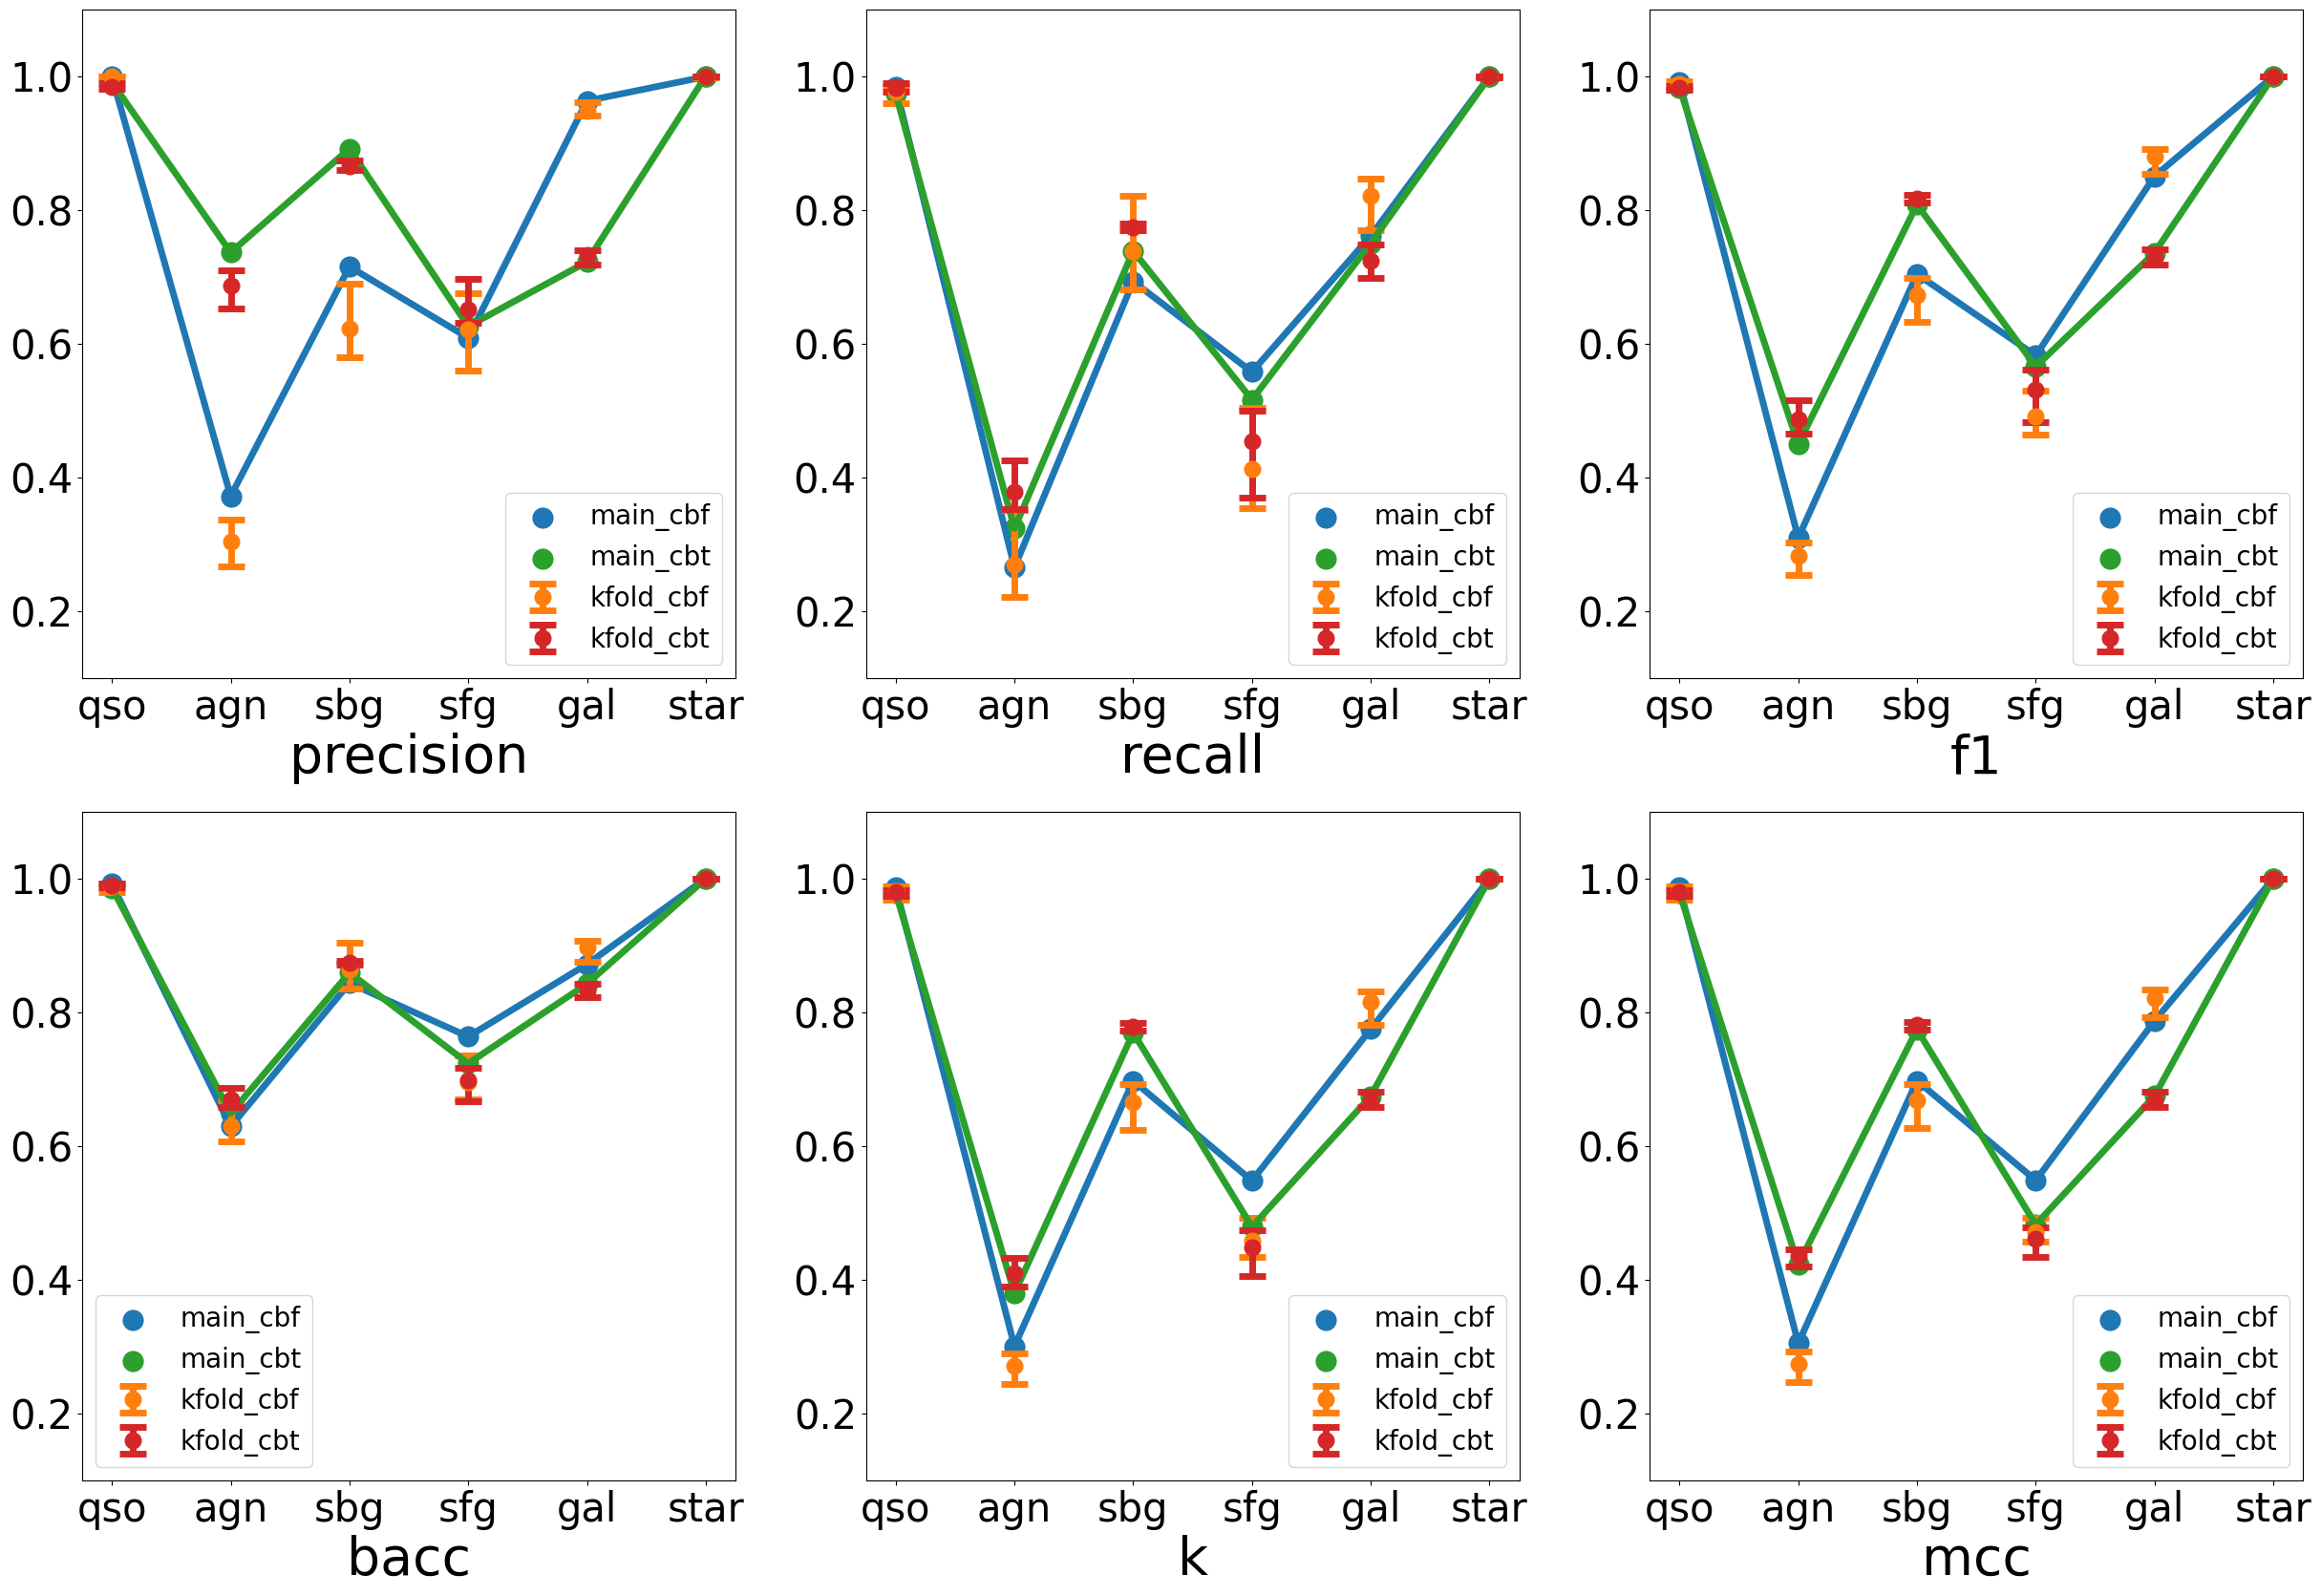

In [165]:
picture_metrics(one_ml_cycle_main_mass,one_ml_cycle_all_kfold_mass,picture_label)

In [6]:
one_ml_cycle_all_kfold.transpose().astype(float).round(4)

accuracy  precision  recall      f1    bacc       k     mcc     roc
qso     0.9929     0.9991  0.9792  0.9890  0.9894  0.9837  0.9839  0.9894
agn     0.9778     0.2787  0.3156  0.2947  0.6516  0.2835  0.2847  0.6516
sbg     0.9859     0.6406  0.7268  0.6809  0.8591  0.6737  0.6752  0.8591
sfg     0.9382     0.6656  0.4027  0.5003  0.6928  0.4696  0.4872  0.6928
gal     0.9222     0.9471  0.8206  0.8792  0.8982  0.8223  0.8270  0.8982
star    0.9999     0.9996  0.9998  0.9997  0.9999  0.9996  0.9996  0.9999

In [71]:
one_ml_cycle_main.transpose().astype(float).round(4)

accuracy  precision  recall      f1    bacc       k     mcc     roc
qso     0.9948     0.9991  0.9853  0.9921  0.9924  0.9883  0.9883  0.9924
agn     0.9812     0.3374  0.2843  0.3086  0.6380  0.2991  0.3003  0.6380
sbg     0.9860     0.6309  0.7798  0.6975  0.8851  0.6904  0.6944  0.8851
sfg     0.9369     0.6067  0.5151  0.5571  0.7436  0.5234  0.5255  0.7436
gal     0.9095     0.9604  0.7698  0.8546  0.8765  0.7901  0.8003  0.8765
star    0.9999     0.9997  0.9999  0.9998  0.9999  0.9997  0.9997  0.9999

In [72]:
one_ml_cycle_main_metr

qso      agn      sbg     sfg     gal    star
tp  353166     4564    17589   43283  289898  232662
fp     334     8962    10292   28064   11943      77
tn  731573  1065341  1057510  978269  701828  857602
fn    5286    11492     4968   40743   86690      18